<center><font size=5>ECE720X50 - Mini Project 2 - Q1</font></center>
<center><b> Group Member: Zhaoyi Wang, Jiyuan Zhao and Yafei Sun </b></center>
<center> Group Contect Info: zhaoyi5@ualberta.ca </center>
   
This notebook provides a skeleton for the code you need to submit for Question 1. Using this notebook should guide you through the question and ensure that you're staying on the right track, but it's not necessary that use it to complete the assignment.


First, let's start with some imports. These are all the imports that are needed to complete this question. If you prefer to use different libraries/methods, feel free to add to or replace these imports as you see fit. It's not required that you use these specific packages.

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now, let's load the training data and see what we're dealing with.

In [3]:
training_data = pd.read_csv('../Database/wine_training.csv')
print(training_data.shape)
training_data.head()

(1280, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.47         0.46             2.2      0.114   
1            7.4              0.74         0.07             1.7      0.086   
2           14.3              0.31         0.74             1.8      0.075   
3            7.5              0.51         0.02             1.7      0.084   
4            9.1              0.52         0.33             1.3      0.070   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  7.0                  20.0  0.99647  3.32       0.63   
1                 15.0                  48.0  0.99502  3.12       0.48   
2                  6.0                  15.0  1.00080  2.86       0.79   
3                 13.0                  31.0  0.99538  3.36       0.54   
4                  9.0                  30.0  0.99780  3.24       0.60   

   alcohol  quality  
0     10.5        5  
1     10.0        5  
2      8.4        6  
3     10.5        6  
4      9.3        5

There are 1280 samples with 11 continuous features ('fixed acidity' through to 'alcohol') which you will use to predict the 'quality'.

Load the testing data analogously.

In [4]:
testing_data = pd.read_csv('../Database/wine_testing.csv')
testing_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.1             0.530         0.08             1.9      0.077   
1            6.2             0.390         0.43             2.0      0.071   
2            9.3             0.430         0.44             1.9      0.085   
3            7.0             0.735         0.05             2.0      0.081   
4           10.7             0.900         0.34             6.6      0.112   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   24                    45  0.99528  3.60       0.68   
1                   14                    24  0.99428  3.45       0.87   
2                    9                    22  0.99708  3.28       0.55   
3                   13                    54  0.99660  3.39       0.57   
4                   23                    99  1.00289  3.22       0.68   

   alcohol  
0     10.3  
1     11.2  
2      9.5  
3      9.8  
4      9.3

There are 320 testing samples with the same 11 features. You will use these features to predict the wine quality.

# Data Pre-processing

Now is a good time to get a feel for the data. The best way to do this is performs some exploratory data analysis. This involves calulating various statistics on the data and generating plots with the aim of learning as much about the data as possible. The idea is that if you are familiar with the data, it will be easier to analyze results, troubleshoot errors, choose model parameters, etc. Start by calculating the mean and standard deviation of each feature and move on to histograms, correlations, and whatever else you would like to know about the data. Some question you may want to answer before moving forward:
* are there any missing values?
* are there any outliers which could hurt our model?
* can we remove any features becuse they don't add any information?

In general, there is no one right way to do exploratory data analysis. The point is to make sure you are familiar with the data.

## Basic Data Exploration

In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1280 non-null   float64
 1   volatile acidity      1280 non-null   float64
 2   citric acid           1280 non-null   float64
 3   residual sugar        1280 non-null   float64
 4   chlorides             1280 non-null   float64
 5   free sulfur dioxide   1280 non-null   float64
 6   total sulfur dioxide  1280 non-null   float64
 7   density               1280 non-null   float64
 8   pH                    1280 non-null   float64
 9   sulphates             1280 non-null   float64
 10  alcohol               1280 non-null   float64
 11  quality               1280 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 120.1 KB


In [6]:
training_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1280.000000       1280.000000  1280.000000     1280.000000   
mean        8.272109          0.527457     0.267461        2.504883   
std         1.713921          0.175386     0.193971        1.381727   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.600000          1.330000     1.000000       15.400000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1280.000000          1280.000000           1280.000000  1280.000000   
mean      0.087516            16.061719             46.974219     0.996714   
std       0.046164            10.636437             33.404522     0.001857   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.080000            14.000000             38.000000     0.996710   
75%       0.090000            22.000000             63.000000     0.997800   
max       0.610000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1280.000000  1280.000000  1280.000000  1280.000000  
mean      3.314109     0.658586    10.415247     5.620312  
std       0.155614     0.171517     1.056314     0.808222  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.320000     0.620000    10.100000     6.000000  
75%       3.410000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.000000     8.000000

## Handle Missing/NA Value

In [7]:
training_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
training_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Handle Duplicate Records

In [9]:
duplicate = training_data.duplicated()
print(duplicate.sum())
training_data[duplicate]

161


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
45              8.9             0.480         0.53             4.0      0.101   
122             6.7             0.460         0.24             1.7      0.077   
151            11.9             0.390         0.69             2.8      0.095   
253             7.8             0.600         0.26             2.0      0.080   
272             6.9             0.740         0.03             2.3      0.054   
...             ...               ...          ...             ...        ...   
1270            7.1             0.430         0.17             1.8      0.082   
1272            6.6             0.630         0.00             4.3      0.093   
1275            6.6             0.855         0.02             2.4      0.062   
1277            9.8             0.660         0.39             3.2      0.083   
1278           12.7             0.600         0.49             2.8      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
45                    3.0                  10.0  0.99586  3.21       0.59   
122                  18.0                  34.0  0.99480  3.39       0.60   
151                  17.0                  35.0  0.99940  3.10       0.61   
253                  31.0                 131.0  0.99622  3.21       0.52   
272                   7.0                  16.0  0.99508  3.45       0.63   
...                   ...                   ...      ...   ...        ...   
1270                 27.0                  51.0  0.99634  3.49       0.64   
1272                 51.0                  77.5  0.99558  3.20       0.45   
1275                 15.0                  23.0  0.99627  3.54       0.60   
1277                 21.0                  59.0  0.99890  3.37       0.71   
1278                  5.0                  19.0  0.99940  3.14       0.57   

      alcohol  quality  
45       12.1        7  
122      10.6        6  
151      10.8        6  
253       9.9        5  
272      11.5        6  
...       ...      ...  
1270     10.4        5  
1272      9.5        5  
1275     11.0        6  
1277     11.5        7  
1278     11.4        5  

[161 rows x 12 columns]

In [10]:
training_data.drop_duplicates(inplace=True)
duplicate = training_data.duplicated()

if duplicate.sum() == 0:
    print('No Duplicate Value')

No Duplicate Value


In [11]:
training_data.shape

(1119, 12)

## Handle Outlier

In [12]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

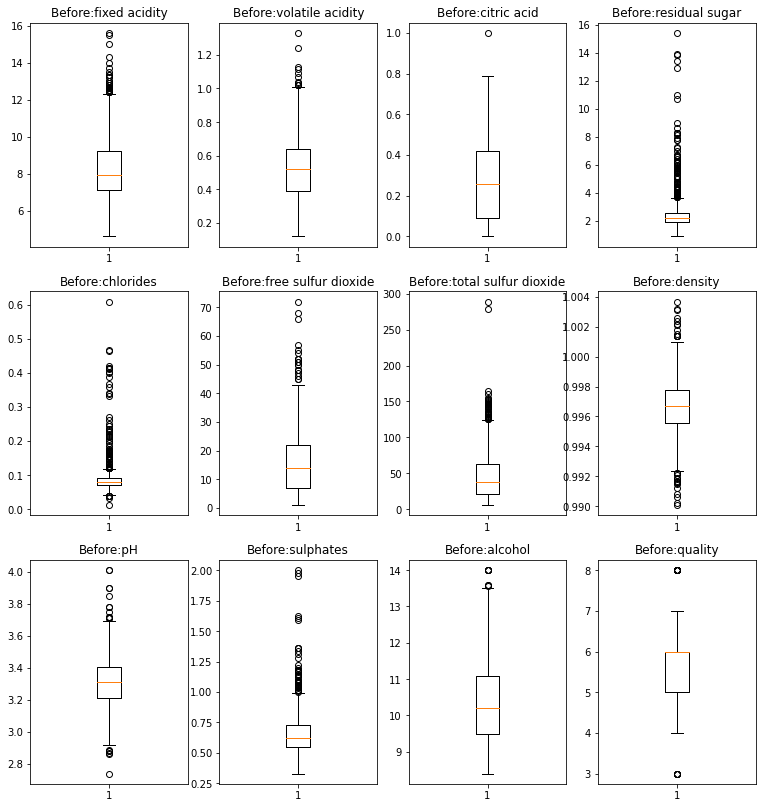

In [13]:
plt.figure(figsize=(13, 14))

for col in range(len(training_data.columns)):
    ax = plt.subplot(3, 4, col + 1)
    plt.boxplot(training_data.iloc[:, col])
    title = 'Before:' + training_data.columns[col]
    plt.title(title)

In [14]:
# Delete Outliers
for col in range(len(training_data.columns)):
    low_range, up_range = remove_outlier(training_data.iloc[:, col])
    training_data.iloc[:,
                       col] = np.where(training_data.iloc[:, col] > up_range,
                                       up_range, training_data.iloc[:, col])
    training_data.iloc[:,
                       col] = np.where(training_data.iloc[:, col] < low_range,
                                       low_range, training_data.iloc[:, col])

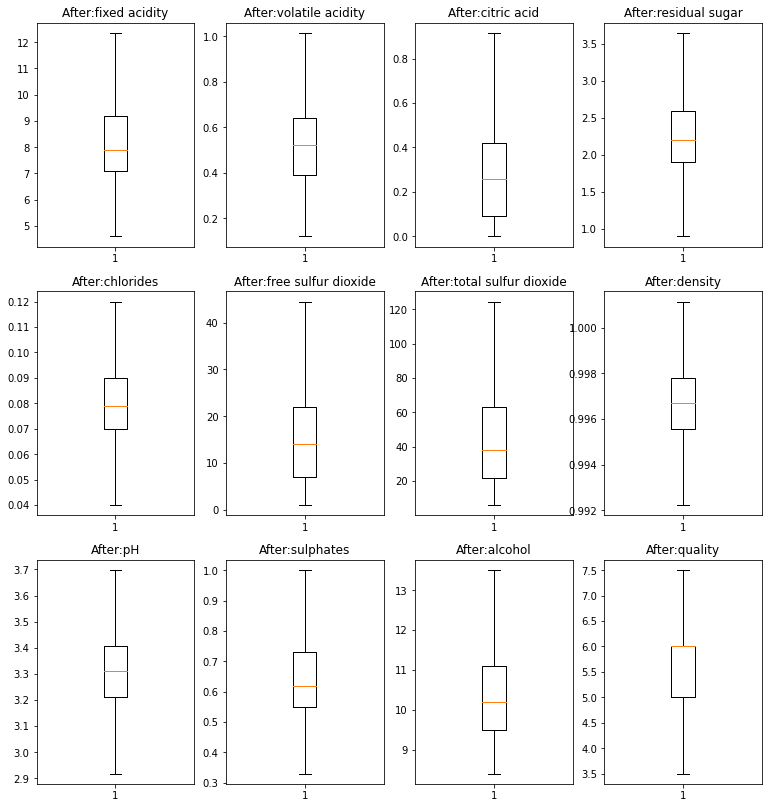

In [15]:
plt.figure(figsize=(13, 14))

for col in range(len(training_data.columns)):
    ax = plt.subplot(3, 4, col + 1)
    plt.boxplot(training_data.iloc[:, col])
    title = 'After:' + training_data.columns[col]
    plt.title(title)

## Define X and Y for training

In [16]:
training_data = training_data.reset_index(drop=True)

X_train = training_data.drop(['quality'], axis=1)
Y_train = training_data.loc[:, 'quality']
print(X_train.shape)
print(Y_train.shape)

(1119, 11)
(1119,)


## Relationship Between Features

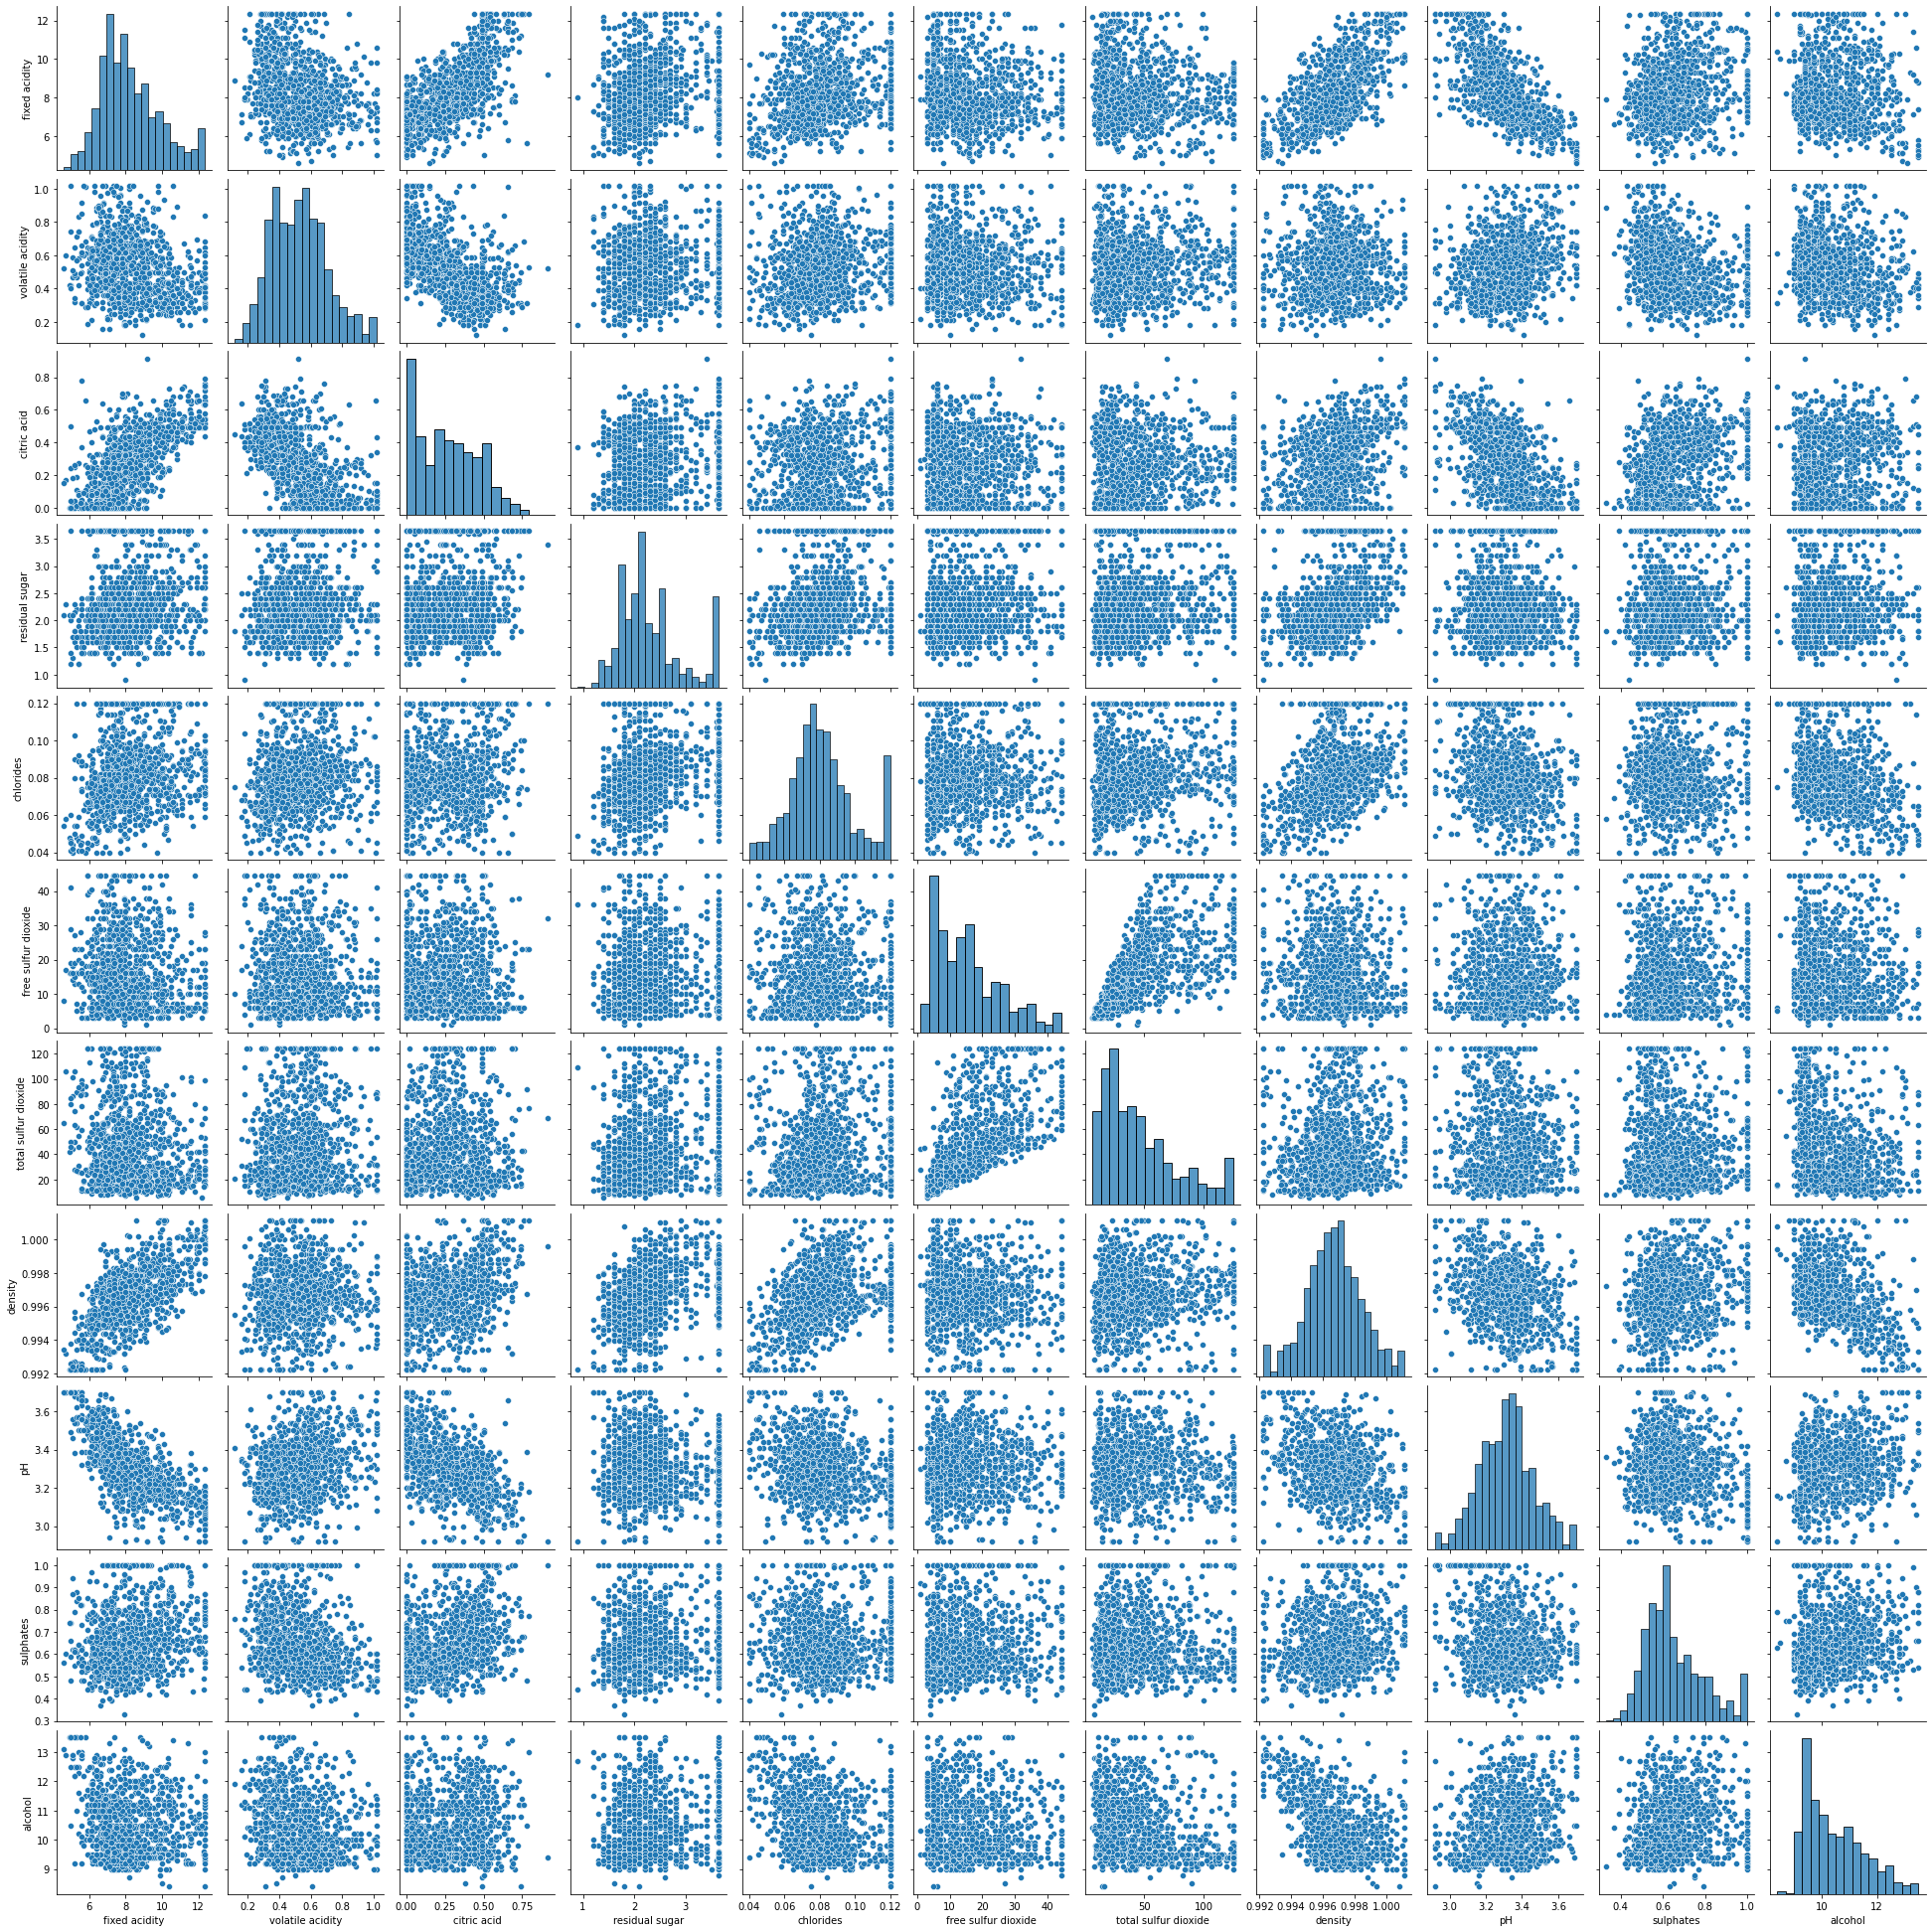

In [17]:
sns.pairplot(X_train)

Having done some exploratory data analysis, it may be a good idea to preprocess the data. This can be done in many ways and, again, there is no one way which is right. As a minimum, it's a good idea to standardize the features. You can do this using the StandardScaler class in sklearn.

A more powerful and sophisticated method is Principal Component Analysis (PCA) which is discussed in the 09-Unsupervised-Learning-Part2 notebook on eclass.

## Principal Component Analysis (PCA)

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
pca = PCA(n_components=len(X_train.columns))
X_train_pca = pca.fit_transform(StandardScaler().fit_transform(X_train))

var_ratio = pca.explained_variance_ratio_
print('Primary Component Variance Ratio:', var_ratio)

Primary Component Variance Ratio: [0.28779217 0.18657674 0.14620428 0.09971019 0.07996179 0.0598718
 0.05069592 0.0358828  0.03029879 0.01766576 0.00533975]


Text(0, 0.5, 'Ratio')

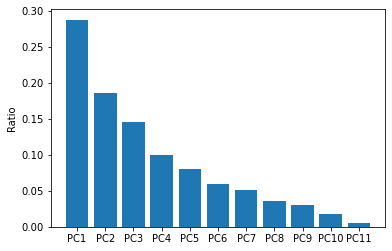

In [20]:
plt.bar([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], var_ratio)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [
    'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
    'PC11'
])
plt.ylabel('Ratio')

We decide to use 'n_components=3' here (Primary Component Variance Ratio > 0.1).

In [21]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(StandardScaler().fit_transform(X_train))

var_ratio = pca.explained_variance_ratio_
print('Primary Component Variance Ratio:', var_ratio)
print('X_train after PCA:', X_train_pca.shape)

Primary Component Variance Ratio: [0.28779217 0.18657674 0.14620428]
X_train after PCA: (1119, 3)


In [22]:
X_train_pca = pd.DataFrame(X_train_pca)
Y_train = pd.DataFrame(Y_train)

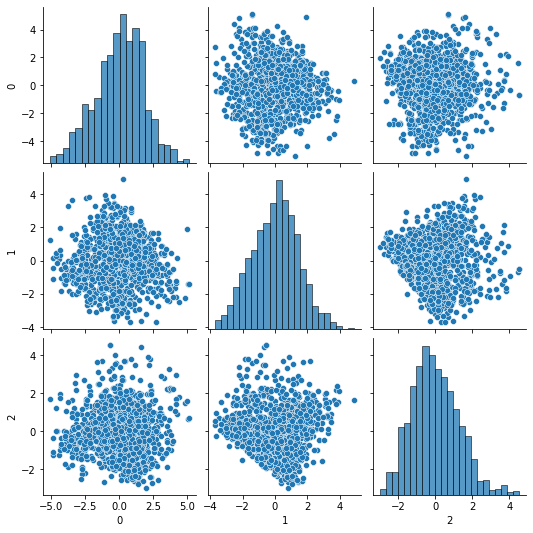

In [23]:
sns.pairplot(pd.DataFrame(X_train_pca))

# Part 1: Regression

Now that the input features have been preprocessed, you can build the feedforward neural network model for regression. There are several ways to do this in Keras but the easiest way is to use the Sequential class with Dense layers. Below is a skeleton of the code to help you get started. Experiment with different number of layers, layer sizes, activation functions, etc. Remember, if you're ever unsure about how a piece of code works, the documentation is your best friend: https://keras.io/api/

One important question you should answer before building the model is how many outputs should the neural network have given that the task is regression. If the output of the network does not match the training outputs, you will run into errors.

Using the Sequential API is sufficient for his question but if you're interested in creating more complicated models, look into Keras' Functional API. The rest of this notebook is written using the Sequential API.

Note: this code is not set up for automated hyperparameter exploration. If you wish to do this, you will need to make some changes such as wrapping model building, training, and evaluation inside for loops which search the hyperparameter space.

In [24]:
import tensorflow as tf
np.random.seed(123)
tf.random.set_seed(123)

In [25]:
from keras.models import Sequential
from keras import layers, wrappers
from keras.layers import Dense, Activation

from sklearn.model_selection import KFold

Once the model is built, you have to compile it. This step is important becasue it defines how the model will learn its parameters and make predictions. As before, you are given a code skeleton to fill out.

## Build the model

In [26]:
def build_model(n_hidden, n_neurons):
    model = Sequential()
    model.add(Dense(n_neurons,activation='relu'))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons), activation="relu")
    model.add(Dense(1))
    model.compile(loss="mean_squared_error", optimizer='adam')
    return model

## Hyperparameter tuning
<b> Here we use 10-fold cross validation </b>

In [27]:
keras_reg = wrappers.scikit_learn.KerasRegressor(build_model)

In [28]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": [20,25,30,35]
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, cv=10)
rnd_search_cv.fit(X_train_pca, Y_train, epochs=800)

Epoch 1/800
32/32 [==============================] - 1s 1ms/step - loss: 27.1971
Epoch 2/800
32/32 [==============================] - 0s 886us/step - loss: 23.0334
Epoch 3/800
32/32 [==============================] - 0s 997us/step - loss: 19.1346
Epoch 4/800
32/32 [==============================] - 0s 943us/step - loss: 15.5633
Epoch 5/800
32/32 [==============================] - 0s 877us/step - loss: 12.9005
Epoch 6/800
32/32 [==============================] - 0s 960us/step - loss: 9.5554
Epoch 7/800
32/32 [==============================] - 0s 1ms/step - loss: 7.7222
Epoch 8/800
32/32 [==============================] - 0s 997us/step - loss: 5.9210
Epoch 9/800
32/32 [==============================] - 0s 950us/step - loss: 4.6550
Epoch 10/800
32/32 [==============================] - 0s 986us/step - loss: 3.8209
Epoch 11/800
32/32 [==============================] - 0s 912us/step - loss: 2.9498
Epoch 12/800
32/32 [==============================] - 0s 992us/step - loss: 2.7237
Epoch 13/800

32/32 [==============================] - 0s 741us/step - loss: 0.4166
Epoch 198/800
32/32 [==============================] - 0s 772us/step - loss: 0.4137
Epoch 199/800
32/32 [==============================] - 0s 822us/step - loss: 0.4084
Epoch 200/800
32/32 [==============================] - 0s 736us/step - loss: 0.3852
Epoch 201/800
32/32 [==============================] - 0s 729us/step - loss: 0.4032
Epoch 202/800
32/32 [==============================] - 0s 736us/step - loss: 0.3880
Epoch 203/800
32/32 [==============================] - 0s 863us/step - loss: 0.4186
Epoch 204/800
32/32 [==============================] - 0s 827us/step - loss: 0.3988
Epoch 205/800
32/32 [==============================] - 0s 915us/step - loss: 0.4024
Epoch 206/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3862
Epoch 207/800
32/32 [==============================] - 0s 922us/step - loss: 0.4287
Epoch 208/800
32/32 [==============================] - 0s 954us/step - loss: 0.4151
Epoch 20

32/32 [==============================] - 0s 804us/step - loss: 0.4073
Epoch 296/800
32/32 [==============================] - 0s 873us/step - loss: 0.3890
Epoch 297/800
32/32 [==============================] - 0s 867us/step - loss: 0.3999
Epoch 298/800
32/32 [==============================] - 0s 792us/step - loss: 0.4132
Epoch 299/800
32/32 [==============================] - 0s 862us/step - loss: 0.4039
Epoch 300/800
32/32 [==============================] - 0s 895us/step - loss: 0.4017
Epoch 301/800
32/32 [==============================] - 0s 812us/step - loss: 0.4064
Epoch 302/800
32/32 [==============================] - 0s 860us/step - loss: 0.3924
Epoch 303/800
32/32 [==============================] - 0s 972us/step - loss: 0.4030
Epoch 304/800
32/32 [==============================] - 0s 903us/step - loss: 0.4181
Epoch 305/800
32/32 [==============================] - 0s 945us/step - loss: 0.4015
Epoch 306/800
32/32 [==============================] - 0s 966us/step - loss: 0.3838
Epoch 

32/32 [==============================] - 0s 898us/step - loss: 0.4113
Epoch 490/800
32/32 [==============================] - 0s 921us/step - loss: 0.4173
Epoch 491/800
32/32 [==============================] - 0s 905us/step - loss: 0.4231
Epoch 492/800
32/32 [==============================] - 0s 805us/step - loss: 0.4052
Epoch 493/800
32/32 [==============================] - 0s 803us/step - loss: 0.4036
Epoch 494/800
32/32 [==============================] - 0s 823us/step - loss: 0.3722
Epoch 495/800
32/32 [==============================] - 0s 857us/step - loss: 0.3925
Epoch 496/800
32/32 [==============================] - 0s 836us/step - loss: 0.4070
Epoch 497/800
32/32 [==============================] - 0s 854us/step - loss: 0.4072
Epoch 498/800
32/32 [==============================] - 0s 909us/step - loss: 0.4056
Epoch 499/800
32/32 [==============================] - 0s 891us/step - loss: 0.4000
Epoch 500/800
32/32 [==============================] - 0s 896us/step - loss: 0.3905
Epoch 

32/32 [==============================] - 0s 847us/step - loss: 0.4126
Epoch 684/800
32/32 [==============================] - 0s 837us/step - loss: 0.3815
Epoch 685/800
32/32 [==============================] - 0s 776us/step - loss: 0.3853
Epoch 686/800
32/32 [==============================] - 0s 822us/step - loss: 0.3939
Epoch 687/800
32/32 [==============================] - 0s 897us/step - loss: 0.3864
Epoch 688/800
32/32 [==============================] - 0s 876us/step - loss: 0.3904
Epoch 689/800
32/32 [==============================] - 0s 940us/step - loss: 0.3887
Epoch 690/800
32/32 [==============================] - 0s 968us/step - loss: 0.3827
Epoch 691/800
32/32 [==============================] - 0s 906us/step - loss: 0.3843
Epoch 692/800
32/32 [==============================] - 0s 926us/step - loss: 0.3952
Epoch 693/800
32/32 [==============================] - 0s 818us/step - loss: 0.3728
Epoch 694/800
32/32 [==============================] - 0s 889us/step - loss: 0.3877
Epoch 

32/32 [==============================] - 0s 868us/step - loss: 0.4733
Epoch 78/800
32/32 [==============================] - 0s 945us/step - loss: 0.4527
Epoch 79/800
32/32 [==============================] - 0s 852us/step - loss: 0.4601
Epoch 80/800
32/32 [==============================] - 0s 901us/step - loss: 0.4197
Epoch 81/800
32/32 [==============================] - 0s 904us/step - loss: 0.4579
Epoch 82/800
32/32 [==============================] - 0s 878us/step - loss: 0.4232
Epoch 83/800
32/32 [==============================] - 0s 872us/step - loss: 0.4262
Epoch 84/800
32/32 [==============================] - 0s 911us/step - loss: 0.4319
Epoch 85/800
32/32 [==============================] - 0s 917us/step - loss: 0.4215
Epoch 86/800
32/32 [==============================] - 0s 964us/step - loss: 0.4063
Epoch 87/800
32/32 [==============================] - 0s 910us/step - loss: 0.4371
Epoch 88/800
32/32 [==============================] - 0s 902us/step - loss: 0.4018
Epoch 89/800
32/3

Epoch 175/800
32/32 [==============================] - 0s 867us/step - loss: 0.3934
Epoch 176/800
32/32 [==============================] - 0s 822us/step - loss: 0.3873
Epoch 177/800
32/32 [==============================] - 0s 805us/step - loss: 0.4057
Epoch 178/800
32/32 [==============================] - 0s 842us/step - loss: 0.4155
Epoch 179/800
32/32 [==============================] - 0s 840us/step - loss: 0.4081
Epoch 180/800
32/32 [==============================] - 0s 798us/step - loss: 0.3907
Epoch 181/800
32/32 [==============================] - 0s 836us/step - loss: 0.4057
Epoch 182/800
32/32 [==============================] - 0s 772us/step - loss: 0.4177
Epoch 183/800
32/32 [==============================] - 0s 779us/step - loss: 0.3977
Epoch 184/800
32/32 [==============================] - 0s 868us/step - loss: 0.4070
Epoch 185/800
32/32 [==============================] - 0s 914us/step - loss: 0.4152
Epoch 186/800
32/32 [==============================] - 0s 834us/step - loss:

32/32 [==============================] - 0s 933us/step - loss: 0.3902
Epoch 370/800
32/32 [==============================] - 0s 948us/step - loss: 0.3993
Epoch 371/800
32/32 [==============================] - 0s 890us/step - loss: 0.3941
Epoch 372/800
32/32 [==============================] - 0s 941us/step - loss: 0.3922
Epoch 373/800
32/32 [==============================] - 0s 914us/step - loss: 0.3876
Epoch 374/800
32/32 [==============================] - 0s 875us/step - loss: 0.3884
Epoch 375/800
32/32 [==============================] - 0s 872us/step - loss: 0.4009
Epoch 376/800
32/32 [==============================] - 0s 898us/step - loss: 0.4020
Epoch 377/800
32/32 [==============================] - 0s 900us/step - loss: 0.3757
Epoch 378/800
32/32 [==============================] - 0s 886us/step - loss: 0.4049
Epoch 379/800
32/32 [==============================] - 0s 854us/step - loss: 0.3815
Epoch 380/800
32/32 [==============================] - 0s 928us/step - loss: 0.3818
Epoch 

32/32 [==============================] - 0s 869us/step - loss: 0.4024
Epoch 564/800
32/32 [==============================] - 0s 901us/step - loss: 0.4211
Epoch 565/800
32/32 [==============================] - 0s 921us/step - loss: 0.3891
Epoch 566/800
32/32 [==============================] - 0s 840us/step - loss: 0.3568
Epoch 567/800
32/32 [==============================] - 0s 873us/step - loss: 0.3981
Epoch 568/800
32/32 [==============================] - 0s 834us/step - loss: 0.3852
Epoch 569/800
32/32 [==============================] - 0s 795us/step - loss: 0.3946
Epoch 570/800
32/32 [==============================] - 0s 914us/step - loss: 0.3874
Epoch 571/800
32/32 [==============================] - 0s 902us/step - loss: 0.3959
Epoch 572/800
32/32 [==============================] - 0s 931us/step - loss: 0.3984
Epoch 573/800
32/32 [==============================] - 0s 964us/step - loss: 0.3729
Epoch 574/800
32/32 [==============================] - 0s 902us/step - loss: 0.3886
Epoch 

32/32 [==============================] - 0s 926us/step - loss: 0.3699
Epoch 758/800
32/32 [==============================] - 0s 927us/step - loss: 0.4070
Epoch 759/800
32/32 [==============================] - 0s 868us/step - loss: 0.3811
Epoch 760/800
32/32 [==============================] - 0s 867us/step - loss: 0.4007
Epoch 761/800
32/32 [==============================] - 0s 928us/step - loss: 0.4333
Epoch 762/800
32/32 [==============================] - 0s 898us/step - loss: 0.3697
Epoch 763/800
32/32 [==============================] - 0s 866us/step - loss: 0.3915
Epoch 764/800
32/32 [==============================] - 0s 835us/step - loss: 0.4128
Epoch 765/800
32/32 [==============================] - 0s 907us/step - loss: 0.3960
Epoch 766/800
32/32 [==============================] - 0s 946us/step - loss: 0.3874
Epoch 767/800
32/32 [==============================] - 0s 878us/step - loss: 0.3914
Epoch 768/800
32/32 [==============================] - 0s 889us/step - loss: 0.4111
Epoch 

32/32 [==============================] - 0s 870us/step - loss: 0.4158
Epoch 153/800
32/32 [==============================] - 0s 845us/step - loss: 0.4121
Epoch 154/800
32/32 [==============================] - 0s 901us/step - loss: 0.3858
Epoch 155/800
32/32 [==============================] - 0s 820us/step - loss: 0.4160
Epoch 156/800
32/32 [==============================] - 0s 803us/step - loss: 0.4245
Epoch 157/800
32/32 [==============================] - 0s 786us/step - loss: 0.4280
Epoch 158/800
32/32 [==============================] - 0s 833us/step - loss: 0.4076
Epoch 159/800
32/32 [==============================] - 0s 821us/step - loss: 0.4227
Epoch 160/800
32/32 [==============================] - 0s 788us/step - loss: 0.3744
Epoch 161/800
32/32 [==============================] - 0s 857us/step - loss: 0.3923
Epoch 162/800
32/32 [==============================] - 0s 931us/step - loss: 0.3980
Epoch 163/800
32/32 [==============================] - 0s 944us/step - loss: 0.4237
Epoch 

32/32 [==============================] - 0s 836us/step - loss: 0.4196
Epoch 347/800
32/32 [==============================] - 0s 864us/step - loss: 0.3965
Epoch 348/800
32/32 [==============================] - 0s 723us/step - loss: 0.3763
Epoch 349/800
32/32 [==============================] - 0s 803us/step - loss: 0.3734
Epoch 350/800
32/32 [==============================] - 0s 797us/step - loss: 0.3942
Epoch 351/800
32/32 [==============================] - 0s 761us/step - loss: 0.3751
Epoch 352/800
32/32 [==============================] - 0s 901us/step - loss: 0.3634
Epoch 353/800
32/32 [==============================] - 0s 842us/step - loss: 0.4056
Epoch 354/800
32/32 [==============================] - 0s 787us/step - loss: 0.3879
Epoch 355/800
32/32 [==============================] - 0s 841us/step - loss: 0.3717
Epoch 356/800
32/32 [==============================] - 0s 756us/step - loss: 0.4069
Epoch 357/800
32/32 [==============================] - 0s 808us/step - loss: 0.3898
Epoch 

32/32 [==============================] - 0s 836us/step - loss: 0.3793
Epoch 541/800
32/32 [==============================] - 0s 922us/step - loss: 0.3838
Epoch 542/800
32/32 [==============================] - 0s 951us/step - loss: 0.3950
Epoch 543/800
32/32 [==============================] - 0s 926us/step - loss: 0.4041
Epoch 544/800
32/32 [==============================] - 0s 883us/step - loss: 0.3546
Epoch 545/800
32/32 [==============================] - 0s 854us/step - loss: 0.3745
Epoch 546/800
32/32 [==============================] - 0s 935us/step - loss: 0.4062
Epoch 547/800
32/32 [==============================] - 0s 889us/step - loss: 0.3946
Epoch 548/800
32/32 [==============================] - 0s 918us/step - loss: 0.3563
Epoch 549/800
32/32 [==============================] - 0s 934us/step - loss: 0.3855
Epoch 550/800
32/32 [==============================] - 0s 845us/step - loss: 0.3930
Epoch 551/800
32/32 [==============================] - 0s 983us/step - loss: 0.3990
Epoch 

32/32 [==============================] - 0s 836us/step - loss: 0.3630
Epoch 735/800
32/32 [==============================] - 0s 998us/step - loss: 0.4214
Epoch 736/800
32/32 [==============================] - 0s 970us/step - loss: 0.3798
Epoch 737/800
32/32 [==============================] - 0s 804us/step - loss: 0.4051
Epoch 738/800
32/32 [==============================] - 0s 890us/step - loss: 0.3447
Epoch 739/800
32/32 [==============================] - 0s 905us/step - loss: 0.3853
Epoch 740/800
32/32 [==============================] - 0s 941us/step - loss: 0.3838
Epoch 741/800
32/32 [==============================] - 0s 954us/step - loss: 0.3819
Epoch 742/800
32/32 [==============================] - 0s 989us/step - loss: 0.3958
Epoch 743/800
32/32 [==============================] - 0s 915us/step - loss: 0.3820
Epoch 744/800
32/32 [==============================] - 0s 962us/step - loss: 0.3913
Epoch 745/800
32/32 [==============================] - 0s 846us/step - loss: 0.3956
Epoch 

32/32 [==============================] - 0s 786us/step - loss: 0.4178
Epoch 130/800
32/32 [==============================] - 0s 874us/step - loss: 0.4176
Epoch 131/800
32/32 [==============================] - 0s 854us/step - loss: 0.4022
Epoch 132/800
32/32 [==============================] - 0s 838us/step - loss: 0.3909
Epoch 133/800
32/32 [==============================] - 0s 852us/step - loss: 0.3995
Epoch 134/800
32/32 [==============================] - 0s 740us/step - loss: 0.4277
Epoch 135/800
32/32 [==============================] - 0s 889us/step - loss: 0.4224
Epoch 136/800
32/32 [==============================] - 0s 865us/step - loss: 0.4062
Epoch 137/800
32/32 [==============================] - 0s 805us/step - loss: 0.4273
Epoch 138/800
32/32 [==============================] - 0s 808us/step - loss: 0.4123
Epoch 139/800
32/32 [==============================] - 0s 798us/step - loss: 0.3895
Epoch 140/800
32/32 [==============================] - 0s 845us/step - loss: 0.3977
Epoch 

32/32 [==============================] - 0s 801us/step - loss: 0.3974
Epoch 324/800
32/32 [==============================] - 0s 921us/step - loss: 0.3985
Epoch 325/800
32/32 [==============================] - 0s 974us/step - loss: 0.3978
Epoch 326/800
32/32 [==============================] - 0s 775us/step - loss: 0.3872
Epoch 327/800
32/32 [==============================] - 0s 892us/step - loss: 0.4021
Epoch 328/800
32/32 [==============================] - 0s 873us/step - loss: 0.4152
Epoch 329/800
32/32 [==============================] - 0s 891us/step - loss: 0.3966
Epoch 330/800
32/32 [==============================] - 0s 885us/step - loss: 0.3970
Epoch 331/800
32/32 [==============================] - 0s 862us/step - loss: 0.4231
Epoch 332/800
32/32 [==============================] - 0s 901us/step - loss: 0.3784
Epoch 333/800
32/32 [==============================] - 0s 852us/step - loss: 0.3998
Epoch 334/800
32/32 [==============================] - 0s 868us/step - loss: 0.4345
Epoch 

32/32 [==============================] - 0s 930us/step - loss: 0.4078
Epoch 518/800
32/32 [==============================] - 0s 927us/step - loss: 0.4109
Epoch 519/800
32/32 [==============================] - 0s 869us/step - loss: 0.3880
Epoch 520/800
32/32 [==============================] - 0s 873us/step - loss: 0.3852
Epoch 521/800
32/32 [==============================] - 0s 892us/step - loss: 0.4007
Epoch 522/800
32/32 [==============================] - 0s 884us/step - loss: 0.3679
Epoch 523/800
32/32 [==============================] - 0s 876us/step - loss: 0.4076
Epoch 524/800
32/32 [==============================] - 0s 928us/step - loss: 0.4075
Epoch 525/800
32/32 [==============================] - 0s 944us/step - loss: 0.3688
Epoch 526/800
32/32 [==============================] - 0s 929us/step - loss: 0.3720
Epoch 527/800
32/32 [==============================] - 0s 949us/step - loss: 0.3877
Epoch 528/800
32/32 [==============================] - 0s 888us/step - loss: 0.3918
Epoch 

32/32 [==============================] - 0s 897us/step - loss: 0.3931
Epoch 712/800
32/32 [==============================] - 0s 853us/step - loss: 0.3743
Epoch 713/800
32/32 [==============================] - 0s 892us/step - loss: 0.4047
Epoch 714/800
32/32 [==============================] - 0s 899us/step - loss: 0.4035
Epoch 715/800
32/32 [==============================] - 0s 802us/step - loss: 0.4161
Epoch 716/800
32/32 [==============================] - 0s 841us/step - loss: 0.3820
Epoch 717/800
32/32 [==============================] - 0s 894us/step - loss: 0.4435
Epoch 718/800
32/32 [==============================] - 0s 872us/step - loss: 0.3736
Epoch 719/800
32/32 [==============================] - 0s 776us/step - loss: 0.3690
Epoch 720/800
32/32 [==============================] - 0s 916us/step - loss: 0.3974
Epoch 721/800
32/32 [==============================] - 0s 904us/step - loss: 0.3976
Epoch 722/800
32/32 [==============================] - 0s 890us/step - loss: 0.3801
Epoch 

32/32 [==============================] - 0s 843us/step - loss: 4.5462
Epoch 9/800
32/32 [==============================] - 0s 836us/step - loss: 3.6891
Epoch 10/800
32/32 [==============================] - 0s 774us/step - loss: 3.1579
Epoch 11/800
32/32 [==============================] - 0s 772us/step - loss: 2.6414
Epoch 12/800
32/32 [==============================] - 0s 839us/step - loss: 2.4893
Epoch 13/800
32/32 [==============================] - 0s 773us/step - loss: 2.3302
Epoch 14/800
32/32 [==============================] - 0s 826us/step - loss: 2.1565
Epoch 15/800
32/32 [==============================] - 0s 857us/step - loss: 2.0854
Epoch 16/800
32/32 [==============================] - 0s 772us/step - loss: 1.8999
Epoch 17/800
32/32 [==============================] - 0s 837us/step - loss: 1.8348
Epoch 18/800
32/32 [==============================] - 0s 754us/step - loss: 1.9000
Epoch 19/800
32/32 [==============================] - 0s 835us/step - loss: 1.7795
Epoch 20/800
32/32

32/32 [==============================] - 0s 806us/step - loss: 0.4157
Epoch 204/800
32/32 [==============================] - 0s 913us/step - loss: 0.3974
Epoch 205/800
32/32 [==============================] - 0s 867us/step - loss: 0.3933
Epoch 206/800
32/32 [==============================] - 0s 920us/step - loss: 0.3874
Epoch 207/800
32/32 [==============================] - 0s 877us/step - loss: 0.3948
Epoch 208/800
32/32 [==============================] - 0s 812us/step - loss: 0.4148
Epoch 209/800
32/32 [==============================] - 0s 914us/step - loss: 0.4180
Epoch 210/800
32/32 [==============================] - 0s 894us/step - loss: 0.3832
Epoch 211/800
32/32 [==============================] - 0s 879us/step - loss: 0.3996
Epoch 212/800
32/32 [==============================] - 0s 820us/step - loss: 0.4240
Epoch 213/800
32/32 [==============================] - 0s 875us/step - loss: 0.3963
Epoch 214/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3727
Epoch 21

32/32 [==============================] - 0s 901us/step - loss: 0.3958
Epoch 398/800
32/32 [==============================] - 0s 868us/step - loss: 0.3785
Epoch 399/800
32/32 [==============================] - 0s 837us/step - loss: 0.3947
Epoch 400/800
32/32 [==============================] - 0s 777us/step - loss: 0.4071
Epoch 401/800
32/32 [==============================] - 0s 820us/step - loss: 0.4018
Epoch 402/800
32/32 [==============================] - 0s 805us/step - loss: 0.3995
Epoch 403/800
32/32 [==============================] - 0s 934us/step - loss: 0.3812
Epoch 404/800
32/32 [==============================] - 0s 884us/step - loss: 0.3908
Epoch 405/800
32/32 [==============================] - 0s 793us/step - loss: 0.3986
Epoch 406/800
32/32 [==============================] - 0s 914us/step - loss: 0.3944
Epoch 407/800
32/32 [==============================] - 0s 786us/step - loss: 0.3839
Epoch 408/800
32/32 [==============================] - 0s 881us/step - loss: 0.3659
Epoch 

32/32 [==============================] - 0s 797us/step - loss: 0.3959
Epoch 592/800
32/32 [==============================] - 0s 798us/step - loss: 0.3665
Epoch 593/800
32/32 [==============================] - 0s 806us/step - loss: 0.4034
Epoch 594/800
32/32 [==============================] - 0s 812us/step - loss: 0.4051
Epoch 595/800
32/32 [==============================] - 0s 772us/step - loss: 0.3802
Epoch 596/800
32/32 [==============================] - 0s 708us/step - loss: 0.3889
Epoch 597/800
32/32 [==============================] - 0s 740us/step - loss: 0.3888
Epoch 598/800
32/32 [==============================] - 0s 764us/step - loss: 0.3728
Epoch 599/800
32/32 [==============================] - 0s 804us/step - loss: 0.3999
Epoch 600/800
32/32 [==============================] - 0s 708us/step - loss: 0.3918
Epoch 601/800
32/32 [==============================] - 0s 824us/step - loss: 0.3988
Epoch 602/800
32/32 [==============================] - 0s 836us/step - loss: 0.3996
Epoch 

32/32 [==============================] - 0s 942us/step - loss: 0.3870
Epoch 786/800
32/32 [==============================] - 0s 902us/step - loss: 0.3736
Epoch 787/800
32/32 [==============================] - 0s 850us/step - loss: 0.3709
Epoch 788/800
32/32 [==============================] - 0s 833us/step - loss: 0.4113
Epoch 789/800
32/32 [==============================] - 0s 824us/step - loss: 0.3637
Epoch 790/800
32/32 [==============================] - 0s 805us/step - loss: 0.3751
Epoch 791/800
32/32 [==============================] - 0s 888us/step - loss: 0.3995
Epoch 792/800
32/32 [==============================] - 0s 836us/step - loss: 0.3935
Epoch 793/800
32/32 [==============================] - 0s 921us/step - loss: 0.3921
Epoch 794/800
32/32 [==============================] - 0s 956us/step - loss: 0.3974
Epoch 795/800
32/32 [==============================] - 0s 741us/step - loss: 0.3888
Epoch 796/800
32/32 [==============================] - 0s 902us/step - loss: 0.4000
Epoch 

32/32 [==============================] - 0s 873us/step - loss: 0.4128
Epoch 181/800
32/32 [==============================] - 0s 926us/step - loss: 0.4036
Epoch 182/800
32/32 [==============================] - 0s 908us/step - loss: 0.3959
Epoch 183/800
32/32 [==============================] - 0s 748us/step - loss: 0.4009
Epoch 184/800
32/32 [==============================] - 0s 838us/step - loss: 0.4259
Epoch 185/800
32/32 [==============================] - 0s 782us/step - loss: 0.4071
Epoch 186/800
32/32 [==============================] - 0s 869us/step - loss: 0.3985
Epoch 187/800
32/32 [==============================] - 0s 784us/step - loss: 0.4116
Epoch 188/800
32/32 [==============================] - 0s 899us/step - loss: 0.4304
Epoch 189/800
32/32 [==============================] - 0s 856us/step - loss: 0.4255
Epoch 190/800
32/32 [==============================] - 0s 869us/step - loss: 0.3881
Epoch 191/800
32/32 [==============================] - 0s 855us/step - loss: 0.4386
Epoch 

32/32 [==============================] - 0s 901us/step - loss: 0.3961
Epoch 375/800
32/32 [==============================] - 0s 868us/step - loss: 0.3896
Epoch 376/800
32/32 [==============================] - 0s 863us/step - loss: 0.3849
Epoch 377/800
32/32 [==============================] - 0s 892us/step - loss: 0.3704
Epoch 378/800
32/32 [==============================] - 0s 847us/step - loss: 0.4085
Epoch 379/800
32/32 [==============================] - 0s 845us/step - loss: 0.4012
Epoch 380/800
32/32 [==============================] - 0s 911us/step - loss: 0.3691
Epoch 381/800
32/32 [==============================] - 0s 836us/step - loss: 0.3737
Epoch 382/800
32/32 [==============================] - 0s 890us/step - loss: 0.3716
Epoch 383/800
32/32 [==============================] - 0s 900us/step - loss: 0.4110
Epoch 384/800
32/32 [==============================] - 0s 901us/step - loss: 0.3946
Epoch 385/800
32/32 [==============================] - 0s 854us/step - loss: 0.3744
Epoch 

32/32 [==============================] - 0s 804us/step - loss: 0.3893
Epoch 569/800
32/32 [==============================] - 0s 825us/step - loss: 0.3920
Epoch 570/800
32/32 [==============================] - 0s 825us/step - loss: 0.3920
Epoch 571/800
32/32 [==============================] - 0s 804us/step - loss: 0.4162
Epoch 572/800
32/32 [==============================] - 0s 792us/step - loss: 0.4006
Epoch 573/800
32/32 [==============================] - 0s 862us/step - loss: 0.3827
Epoch 574/800
32/32 [==============================] - 0s 825us/step - loss: 0.3976
Epoch 575/800
32/32 [==============================] - 0s 714us/step - loss: 0.4129
Epoch 576/800
32/32 [==============================] - 0s 826us/step - loss: 0.4151
Epoch 577/800
32/32 [==============================] - 0s 830us/step - loss: 0.3949
Epoch 578/800
32/32 [==============================] - 0s 836us/step - loss: 0.3469
Epoch 579/800
32/32 [==============================] - 0s 772us/step - loss: 0.3944
Epoch 

32/32 [==============================] - 0s 670us/step - loss: 0.3880
Epoch 763/800
32/32 [==============================] - 0s 901us/step - loss: 0.3848
Epoch 764/800
32/32 [==============================] - 0s 837us/step - loss: 0.4107
Epoch 765/800
32/32 [==============================] - 0s 900us/step - loss: 0.4127
Epoch 766/800
32/32 [==============================] - 0s 749us/step - loss: 0.3974
Epoch 767/800
32/32 [==============================] - 0s 844us/step - loss: 0.4173
Epoch 768/800
32/32 [==============================] - 0s 804us/step - loss: 0.4300
Epoch 769/800
32/32 [==============================] - 0s 789us/step - loss: 0.3902
Epoch 770/800
32/32 [==============================] - 0s 798us/step - loss: 0.4076
Epoch 771/800
32/32 [==============================] - 0s 772us/step - loss: 0.4220
Epoch 772/800
32/32 [==============================] - 0s 829us/step - loss: 0.3862
Epoch 773/800
32/32 [==============================] - 0s 811us/step - loss: 0.4103
Epoch 

32/32 [==============================] - 0s 804us/step - loss: 0.4038
Epoch 158/800
32/32 [==============================] - 0s 708us/step - loss: 0.4292
Epoch 159/800
32/32 [==============================] - 0s 676us/step - loss: 0.4161
Epoch 160/800
32/32 [==============================] - 0s 688us/step - loss: 0.3773
Epoch 161/800
32/32 [==============================] - 0s 740us/step - loss: 0.4216
Epoch 162/800
32/32 [==============================] - 0s 816us/step - loss: 0.3978
Epoch 163/800
32/32 [==============================] - 0s 772us/step - loss: 0.4253
Epoch 164/800
32/32 [==============================] - 0s 814us/step - loss: 0.4350
Epoch 165/800
32/32 [==============================] - 0s 804us/step - loss: 0.4352
Epoch 166/800
32/32 [==============================] - 0s 758us/step - loss: 0.4033
Epoch 167/800
32/32 [==============================] - 0s 869us/step - loss: 0.4347
Epoch 168/800
32/32 [==============================] - 0s 834us/step - loss: 0.4021
Epoch 

32/32 [==============================] - 0s 836us/step - loss: 0.3983
Epoch 352/800
32/32 [==============================] - 0s 740us/step - loss: 0.3854
Epoch 353/800
32/32 [==============================] - 0s 804us/step - loss: 0.3892
Epoch 354/800
32/32 [==============================] - 0s 803us/step - loss: 0.3994
Epoch 355/800
32/32 [==============================] - 0s 804us/step - loss: 0.3805
Epoch 356/800
32/32 [==============================] - 0s 904us/step - loss: 0.3858
Epoch 357/800
32/32 [==============================] - 0s 836us/step - loss: 0.4165
Epoch 358/800
32/32 [==============================] - 0s 883us/step - loss: 0.4079
Epoch 359/800
32/32 [==============================] - 0s 931us/step - loss: 0.4161
Epoch 360/800
32/32 [==============================] - 0s 902us/step - loss: 0.4100
Epoch 361/800
32/32 [==============================] - 0s 926us/step - loss: 0.3889
Epoch 362/800
32/32 [==============================] - 0s 945us/step - loss: 0.3962
Epoch 

32/32 [==============================] - 0s 875us/step - loss: 0.3866
Epoch 546/800
32/32 [==============================] - 0s 703us/step - loss: 0.4106
Epoch 547/800
32/32 [==============================] - 0s 900us/step - loss: 0.4315
Epoch 548/800
32/32 [==============================] - 0s 873us/step - loss: 0.3686
Epoch 549/800
32/32 [==============================] - 0s 819us/step - loss: 0.4008
Epoch 550/800
32/32 [==============================] - 0s 901us/step - loss: 0.3881
Epoch 551/800
32/32 [==============================] - 0s 869us/step - loss: 0.3876
Epoch 552/800
32/32 [==============================] - 0s 818us/step - loss: 0.3939
Epoch 553/800
32/32 [==============================] - 0s 791us/step - loss: 0.3986
Epoch 554/800
32/32 [==============================] - 0s 840us/step - loss: 0.3968
Epoch 555/800
32/32 [==============================] - 0s 880us/step - loss: 0.3796
Epoch 556/800
32/32 [==============================] - 0s 895us/step - loss: 0.3910
Epoch 

32/32 [==============================] - 0s 770us/step - loss: 0.4051
Epoch 740/800
32/32 [==============================] - 0s 675us/step - loss: 0.3839
Epoch 741/800
32/32 [==============================] - 0s 708us/step - loss: 0.4200
Epoch 742/800
32/32 [==============================] - 0s 740us/step - loss: 0.3921
Epoch 743/800
32/32 [==============================] - 0s 741us/step - loss: 0.3901
Epoch 744/800
32/32 [==============================] - 0s 722us/step - loss: 0.4131
Epoch 745/800
32/32 [==============================] - 0s 764us/step - loss: 0.4081
Epoch 746/800
32/32 [==============================] - 0s 740us/step - loss: 0.3879
Epoch 747/800
32/32 [==============================] - 0s 740us/step - loss: 0.3728
Epoch 748/800
32/32 [==============================] - 0s 732us/step - loss: 0.3850
Epoch 749/800
32/32 [==============================] - 0s 788us/step - loss: 0.3719
Epoch 750/800
32/32 [==============================] - 0s 720us/step - loss: 0.3892
Epoch 

32/32 [==============================] - 0s 864us/step - loss: 0.9582
Epoch 37/800
32/32 [==============================] - 0s 836us/step - loss: 0.9922
Epoch 38/800
32/32 [==============================] - 0s 869us/step - loss: 0.9203
Epoch 39/800
32/32 [==============================] - 0s 798us/step - loss: 0.7868
Epoch 40/800
32/32 [==============================] - 0s 772us/step - loss: 0.8194
Epoch 41/800
32/32 [==============================] - 0s 836us/step - loss: 0.7718
Epoch 42/800
32/32 [==============================] - 0s 793us/step - loss: 0.7570
Epoch 43/800
32/32 [==============================] - 0s 870us/step - loss: 0.7450
Epoch 44/800
32/32 [==============================] - 0s 869us/step - loss: 0.7029
Epoch 45/800
32/32 [==============================] - 0s 850us/step - loss: 0.6861
Epoch 46/800
32/32 [==============================] - 0s 869us/step - loss: 0.6761
Epoch 47/800
32/32 [==============================] - 0s 805us/step - loss: 0.6291
Epoch 48/800
32/3

32/32 [==============================] - 0s 740us/step - loss: 0.4034
Epoch 232/800
32/32 [==============================] - 0s 961us/step - loss: 0.3731
Epoch 233/800
32/32 [==============================] - 0s 893us/step - loss: 0.4131
Epoch 234/800
32/32 [==============================] - 0s 900us/step - loss: 0.3963
Epoch 235/800
32/32 [==============================] - 0s 910us/step - loss: 0.4071
Epoch 236/800
32/32 [==============================] - 0s 839us/step - loss: 0.3977
Epoch 237/800
32/32 [==============================] - 0s 874us/step - loss: 0.3946
Epoch 238/800
32/32 [==============================] - 0s 902us/step - loss: 0.3580
Epoch 239/800
32/32 [==============================] - 0s 956us/step - loss: 0.4027
Epoch 240/800
32/32 [==============================] - 0s 856us/step - loss: 0.3839
Epoch 241/800
32/32 [==============================] - 0s 856us/step - loss: 0.3984
Epoch 242/800
32/32 [==============================] - 0s 806us/step - loss: 0.3882
Epoch 

32/32 [==============================] - 0s 771us/step - loss: 0.3709
Epoch 426/800
32/32 [==============================] - 0s 772us/step - loss: 0.3806
Epoch 427/800
32/32 [==============================] - 0s 800us/step - loss: 0.4008
Epoch 428/800
32/32 [==============================] - 0s 804us/step - loss: 0.3977
Epoch 429/800
32/32 [==============================] - 0s 864us/step - loss: 0.3525
Epoch 430/800
32/32 [==============================] - 0s 850us/step - loss: 0.3945
Epoch 431/800
32/32 [==============================] - 0s 908us/step - loss: 0.3911
Epoch 432/800
32/32 [==============================] - 0s 893us/step - loss: 0.4073
Epoch 433/800
32/32 [==============================] - 0s 901us/step - loss: 0.4328
Epoch 434/800
32/32 [==============================] - 0s 936us/step - loss: 0.3756
Epoch 435/800
32/32 [==============================] - 0s 932us/step - loss: 0.4144
Epoch 436/800
32/32 [==============================] - 0s 878us/step - loss: 0.3755
Epoch 

32/32 [==============================] - 0s 869us/step - loss: 0.3923
Epoch 620/800
32/32 [==============================] - 0s 838us/step - loss: 0.3614
Epoch 621/800
32/32 [==============================] - 0s 740us/step - loss: 0.3981
Epoch 622/800
32/32 [==============================] - 0s 835us/step - loss: 0.3865
Epoch 623/800
32/32 [==============================] - 0s 838us/step - loss: 0.3882
Epoch 624/800
32/32 [==============================] - 0s 766us/step - loss: 0.3935
Epoch 625/800
32/32 [==============================] - 0s 826us/step - loss: 0.4083
Epoch 626/800
32/32 [==============================] - 0s 769us/step - loss: 0.3978
Epoch 627/800
32/32 [==============================] - 0s 835us/step - loss: 0.3833
Epoch 628/800
32/32 [==============================] - 0s 841us/step - loss: 0.3878
Epoch 629/800
32/32 [==============================] - 0s 841us/step - loss: 0.3738
Epoch 630/800
32/32 [==============================] - 0s 796us/step - loss: 0.3790
Epoch 

32/32 [==============================] - 0s 772us/step - loss: 2.4986
Epoch 14/800
32/32 [==============================] - 0s 804us/step - loss: 2.2823
Epoch 15/800
32/32 [==============================] - 0s 838us/step - loss: 2.1011
Epoch 16/800
32/32 [==============================] - 0s 804us/step - loss: 2.1550
Epoch 17/800
32/32 [==============================] - 0s 837us/step - loss: 1.9500
Epoch 18/800
32/32 [==============================] - 0s 806us/step - loss: 1.8777
Epoch 19/800
32/32 [==============================] - 0s 804us/step - loss: 1.9869
Epoch 20/800
32/32 [==============================] - 0s 822us/step - loss: 1.8080
Epoch 21/800
32/32 [==============================] - 0s 804us/step - loss: 1.8653
Epoch 22/800
32/32 [==============================] - 0s 804us/step - loss: 1.7333
Epoch 23/800
32/32 [==============================] - 0s 805us/step - loss: 1.7340
Epoch 24/800
32/32 [==============================] - 0s 760us/step - loss: 1.6020
Epoch 25/800
32/3

32/32 [==============================] - 0s 732us/step - loss: 0.3897
Epoch 209/800
32/32 [==============================] - 0s 804us/step - loss: 0.3807
Epoch 210/800
32/32 [==============================] - 0s 900us/step - loss: 0.4038
Epoch 211/800
32/32 [==============================] - 0s 874us/step - loss: 0.3823
Epoch 212/800
32/32 [==============================] - 0s 771us/step - loss: 0.4071
Epoch 213/800
32/32 [==============================] - 0s 841us/step - loss: 0.3815
Epoch 214/800
32/32 [==============================] - 0s 923us/step - loss: 0.3848
Epoch 215/800
32/32 [==============================] - 0s 890us/step - loss: 0.4051
Epoch 216/800
32/32 [==============================] - 0s 787us/step - loss: 0.3866
Epoch 217/800
32/32 [==============================] - 0s 865us/step - loss: 0.3696
Epoch 218/800
32/32 [==============================] - 0s 870us/step - loss: 0.4065
Epoch 219/800
32/32 [==============================] - 0s 868us/step - loss: 0.3689
Epoch 

32/32 [==============================] - 0s 868us/step - loss: 0.3940
Epoch 403/800
32/32 [==============================] - 0s 734us/step - loss: 0.3808
Epoch 404/800
32/32 [==============================] - 0s 772us/step - loss: 0.3663
Epoch 405/800
32/32 [==============================] - 0s 790us/step - loss: 0.4082
Epoch 406/800
32/32 [==============================] - 0s 850us/step - loss: 0.3976
Epoch 407/800
32/32 [==============================] - 0s 837us/step - loss: 0.3940
Epoch 408/800
32/32 [==============================] - 0s 867us/step - loss: 0.3558
Epoch 409/800
32/32 [==============================] - 0s 880us/step - loss: 0.4094
Epoch 410/800
32/32 [==============================] - 0s 899us/step - loss: 0.4059
Epoch 411/800
32/32 [==============================] - 0s 881us/step - loss: 0.3771
Epoch 412/800
32/32 [==============================] - 0s 910us/step - loss: 0.3858
Epoch 413/800
32/32 [==============================] - 0s 934us/step - loss: 0.4022
Epoch 

32/32 [==============================] - 0s 933us/step - loss: 0.3502
Epoch 597/800
32/32 [==============================] - 0s 679us/step - loss: 0.3705
Epoch 598/800
32/32 [==============================] - 0s 871us/step - loss: 0.3816
Epoch 599/800
32/32 [==============================] - 0s 727us/step - loss: 0.4058
Epoch 600/800
32/32 [==============================] - 0s 817us/step - loss: 0.3722
Epoch 601/800
32/32 [==============================] - 0s 794us/step - loss: 0.3776
Epoch 602/800
32/32 [==============================] - 0s 798us/step - loss: 0.3915
Epoch 603/800
32/32 [==============================] - 0s 840us/step - loss: 0.3846
Epoch 604/800
32/32 [==============================] - 0s 794us/step - loss: 0.3752
Epoch 605/800
32/32 [==============================] - 0s 821us/step - loss: 0.3721
Epoch 606/800
32/32 [==============================] - 0s 772us/step - loss: 0.3887
Epoch 607/800
32/32 [==============================] - 0s 844us/step - loss: 0.3543
Epoch 

32/32 [==============================] - 0s 869us/step - loss: 0.3727
Epoch 791/800
32/32 [==============================] - 0s 676us/step - loss: 0.4168
Epoch 792/800
32/32 [==============================] - 0s 772us/step - loss: 0.3723
Epoch 793/800
32/32 [==============================] - 0s 789us/step - loss: 0.3881
Epoch 794/800
32/32 [==============================] - 0s 749us/step - loss: 0.3881
Epoch 795/800
32/32 [==============================] - 0s 772us/step - loss: 0.3649
Epoch 796/800
32/32 [==============================] - 0s 709us/step - loss: 0.3942
Epoch 797/800
32/32 [==============================] - 0s 854us/step - loss: 0.3744
Epoch 798/800
32/32 [==============================] - 0s 822us/step - loss: 0.3896
Epoch 799/800
32/32 [==============================] - 0s 805us/step - loss: 0.4028
Epoch 800/800
4/4 [==============================] - 0s 6ms/step - loss: 0.4761
Epoch 1/800
32/32 [==============================] - 0s 1ms/step - loss: 25.2625
Epoch 2/800
3

32/32 [==============================] - 0s 901us/step - loss: 0.4476
Epoch 89/800
32/32 [==============================] - 0s 901us/step - loss: 0.4104
Epoch 90/800
32/32 [==============================] - 0s 772us/step - loss: 0.4371
Epoch 91/800
32/32 [==============================] - 0s 804us/step - loss: 0.3968
Epoch 92/800
32/32 [==============================] - 0s 861us/step - loss: 0.3939
Epoch 93/800
32/32 [==============================] - 0s 782us/step - loss: 0.4283
Epoch 94/800
32/32 [==============================] - 0s 740us/step - loss: 0.4368
Epoch 95/800
32/32 [==============================] - 0s 828us/step - loss: 0.4446
Epoch 96/800
32/32 [==============================] - 0s 834us/step - loss: 0.4119
Epoch 97/800
32/32 [==============================] - 0s 837us/step - loss: 0.4266
Epoch 98/800
32/32 [==============================] - 0s 804us/step - loss: 0.4371
Epoch 99/800
32/32 [==============================] - 0s 772us/step - loss: 0.4413
Epoch 100/800
32/

32/32 [==============================] - 0s 772us/step - loss: 0.3842
Epoch 283/800
32/32 [==============================] - 0s 869us/step - loss: 0.3905
Epoch 284/800
32/32 [==============================] - 0s 836us/step - loss: 0.4152
Epoch 285/800
32/32 [==============================] - 0s 854us/step - loss: 0.4111
Epoch 286/800
32/32 [==============================] - 0s 758us/step - loss: 0.3908
Epoch 287/800
32/32 [==============================] - 0s 770us/step - loss: 0.3884
Epoch 288/800
32/32 [==============================] - 0s 836us/step - loss: 0.4204
Epoch 289/800
32/32 [==============================] - 0s 796us/step - loss: 0.4138
Epoch 290/800
32/32 [==============================] - 0s 822us/step - loss: 0.3956
Epoch 291/800
32/32 [==============================] - 0s 801us/step - loss: 0.4287
Epoch 292/800
32/32 [==============================] - 0s 908us/step - loss: 0.4101
Epoch 293/800
32/32 [==============================] - 0s 837us/step - loss: 0.4417
Epoch 

32/32 [==============================] - 0s 844us/step - loss: 0.3927
Epoch 477/800
32/32 [==============================] - 0s 934us/step - loss: 0.3891
Epoch 478/800
32/32 [==============================] - 0s 899us/step - loss: 0.4341
Epoch 479/800
32/32 [==============================] - 0s 864us/step - loss: 0.4054
Epoch 480/800
32/32 [==============================] - 0s 846us/step - loss: 0.3969
Epoch 481/800
32/32 [==============================] - 0s 816us/step - loss: 0.3765
Epoch 482/800
32/32 [==============================] - 0s 954us/step - loss: 0.4096
Epoch 483/800
32/32 [==============================] - 0s 769us/step - loss: 0.4184
Epoch 484/800
32/32 [==============================] - 0s 922us/step - loss: 0.3743
Epoch 485/800
32/32 [==============================] - 0s 952us/step - loss: 0.3820
Epoch 486/800
32/32 [==============================] - 0s 946us/step - loss: 0.3901
Epoch 487/800
32/32 [==============================] - 0s 966us/step - loss: 0.4062
Epoch 

32/32 [==============================] - 0s 836us/step - loss: 0.4157
Epoch 672/800
32/32 [==============================] - 0s 901us/step - loss: 0.4011
Epoch 673/800
32/32 [==============================] - 0s 726us/step - loss: 0.3937
Epoch 674/800
32/32 [==============================] - 0s 740us/step - loss: 0.3912
Epoch 675/800
32/32 [==============================] - 0s 772us/step - loss: 0.4203
Epoch 676/800
32/32 [==============================] - 0s 759us/step - loss: 0.4238
Epoch 677/800
32/32 [==============================] - 0s 834us/step - loss: 0.3847
Epoch 678/800
32/32 [==============================] - 0s 772us/step - loss: 0.3935
Epoch 679/800
32/32 [==============================] - 0s 831us/step - loss: 0.4030
Epoch 680/800
32/32 [==============================] - 0s 900us/step - loss: 0.4252
Epoch 681/800
32/32 [==============================] - 0s 869us/step - loss: 0.3710
Epoch 682/800
32/32 [==============================] - 0s 813us/step - loss: 0.4010
Epoch 

32/32 [==============================] - 0s 965us/step - loss: 0.4597
Epoch 67/800
32/32 [==============================] - 0s 933us/step - loss: 0.4395
Epoch 68/800
32/32 [==============================] - 0s 807us/step - loss: 0.4206
Epoch 69/800
32/32 [==============================] - 0s 934us/step - loss: 0.4133
Epoch 70/800
32/32 [==============================] - 0s 920us/step - loss: 0.4173
Epoch 71/800
32/32 [==============================] - 0s 962us/step - loss: 0.4501
Epoch 72/800
32/32 [==============================] - 0s 895us/step - loss: 0.4049
Epoch 73/800
32/32 [==============================] - 0s 901us/step - loss: 0.4270
Epoch 74/800
32/32 [==============================] - 0s 868us/step - loss: 0.4167
Epoch 75/800
32/32 [==============================] - 0s 872us/step - loss: 0.3967
Epoch 76/800
32/32 [==============================] - 0s 970us/step - loss: 0.4125
Epoch 77/800
32/32 [==============================] - 0s 773us/step - loss: 0.4508
Epoch 78/800
32/3

32/32 [==============================] - 0s 901us/step - loss: 0.4431
Epoch 262/800
32/32 [==============================] - 0s 875us/step - loss: 0.3856
Epoch 263/800
32/32 [==============================] - 0s 918us/step - loss: 0.3857
Epoch 264/800
32/32 [==============================] - 0s 804us/step - loss: 0.3832
Epoch 265/800
32/32 [==============================] - 0s 918us/step - loss: 0.3915
Epoch 266/800
32/32 [==============================] - 0s 847us/step - loss: 0.3895
Epoch 267/800
32/32 [==============================] - 0s 869us/step - loss: 0.3973
Epoch 268/800
32/32 [==============================] - 0s 836us/step - loss: 0.4041
Epoch 269/800
32/32 [==============================] - 0s 927us/step - loss: 0.3784
Epoch 270/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4249
Epoch 271/800
32/32 [==============================] - 0s 930us/step - loss: 0.4060
Epoch 272/800
32/32 [==============================] - 0s 967us/step - loss: 0.4193
Epoch 27

32/32 [==============================] - 0s 933us/step - loss: 0.4029
Epoch 458/800
32/32 [==============================] - 0s 965us/step - loss: 0.3873
Epoch 459/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3921
Epoch 460/800
32/32 [==============================] - 0s 965us/step - loss: 0.3932
Epoch 461/800
32/32 [==============================] - 0s 997us/step - loss: 0.4112
Epoch 462/800
32/32 [==============================] - 0s 965us/step - loss: 0.4015
Epoch 463/800
32/32 [==============================] - 0s 901us/step - loss: 0.4090
Epoch 464/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3665
Epoch 465/800
32/32 [==============================] - 0s 997us/step - loss: 0.3984
Epoch 466/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3742
Epoch 467/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3695
Epoch 468/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3622
Epoch 469/800
32

Epoch 555/800
32/32 [==============================] - 0s 901us/step - loss: 0.3884
Epoch 556/800
32/32 [==============================] - 0s 852us/step - loss: 0.3762
Epoch 557/800
32/32 [==============================] - 0s 820us/step - loss: 0.3766
Epoch 558/800
32/32 [==============================] - 0s 936us/step - loss: 0.3770
Epoch 559/800
32/32 [==============================] - 0s 984us/step - loss: 0.3799
Epoch 560/800
32/32 [==============================] - 0s 952us/step - loss: 0.4091
Epoch 561/800
32/32 [==============================] - 0s 755us/step - loss: 0.3503
Epoch 562/800
32/32 [==============================] - 0s 804us/step - loss: 0.4360
Epoch 563/800
32/32 [==============================] - 0s 940us/step - loss: 0.3903
Epoch 564/800
32/32 [==============================] - 0s 909us/step - loss: 0.4064
Epoch 565/800
32/32 [==============================] - 0s 927us/step - loss: 0.3934
Epoch 566/800
32/32 [==============================] - 0s 762us/step - loss:

32/32 [==============================] - 0s 933us/step - loss: 0.3848
Epoch 750/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3763
Epoch 751/800
32/32 [==============================] - 0s 934us/step - loss: 0.3763
Epoch 752/800
32/32 [==============================] - 0s 804us/step - loss: 0.3707
Epoch 753/800
32/32 [==============================] - 0s 740us/step - loss: 0.3657
Epoch 754/800
32/32 [==============================] - 0s 809us/step - loss: 0.3805
Epoch 755/800
32/32 [==============================] - 0s 740us/step - loss: 0.3727
Epoch 756/800
32/32 [==============================] - 0s 804us/step - loss: 0.3790
Epoch 757/800
32/32 [==============================] - 0s 857us/step - loss: 0.3656
Epoch 758/800
32/32 [==============================] - 0s 912us/step - loss: 0.4111
Epoch 759/800
32/32 [==============================] - 0s 825us/step - loss: 0.3753
Epoch 760/800
32/32 [==============================] - 0s 965us/step - loss: 0.3923
Epoch 76

32/32 [==============================] - 0s 901us/step - loss: 0.4064
Epoch 146/800
32/32 [==============================] - 0s 933us/step - loss: 0.3751
Epoch 147/800
32/32 [==============================] - 0s 965us/step - loss: 0.4078
Epoch 148/800
32/32 [==============================] - 0s 933us/step - loss: 0.3938
Epoch 149/800
32/32 [==============================] - 0s 836us/step - loss: 0.4072
Epoch 150/800
32/32 [==============================] - 0s 933us/step - loss: 0.3829
Epoch 151/800
32/32 [==============================] - 0s 965us/step - loss: 0.3931
Epoch 152/800
32/32 [==============================] - 0s 933us/step - loss: 0.4276
Epoch 153/800
32/32 [==============================] - 0s 933us/step - loss: 0.4039
Epoch 154/800
32/32 [==============================] - 0s 965us/step - loss: 0.3692
Epoch 155/800
32/32 [==============================] - 0s 901us/step - loss: 0.4147
Epoch 156/800
32/32 [==============================] - 0s 869us/step - loss: 0.4117
Epoch 

32/32 [==============================] - 0s 772us/step - loss: 0.3830
Epoch 340/800
32/32 [==============================] - 0s 740us/step - loss: 0.3963
Epoch 341/800
32/32 [==============================] - 0s 740us/step - loss: 0.3736
Epoch 342/800
32/32 [==============================] - 0s 772us/step - loss: 0.3819
Epoch 343/800
32/32 [==============================] - 0s 731us/step - loss: 0.3902
Epoch 344/800
32/32 [==============================] - 0s 773us/step - loss: 0.3860
Epoch 345/800
32/32 [==============================] - 0s 714us/step - loss: 0.3618
Epoch 346/800
32/32 [==============================] - 0s 773us/step - loss: 0.4071
Epoch 347/800
32/32 [==============================] - 0s 741us/step - loss: 0.3936
Epoch 348/800
32/32 [==============================] - 0s 869us/step - loss: 0.3925
Epoch 349/800
32/32 [==============================] - 0s 836us/step - loss: 0.3588
Epoch 350/800
32/32 [==============================] - 0s 772us/step - loss: 0.3956
Epoch 

Epoch 437/800
32/32 [==============================] - 0s 740us/step - loss: 0.4034
Epoch 438/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3719
Epoch 439/800
32/32 [==============================] - 0s 869us/step - loss: 0.4178
Epoch 440/800
32/32 [==============================] - 0s 836us/step - loss: 0.3905
Epoch 441/800
32/32 [==============================] - 0s 869us/step - loss: 0.4171
Epoch 442/800
32/32 [==============================] - 0s 933us/step - loss: 0.4121
Epoch 443/800
32/32 [==============================] - 0s 901us/step - loss: 0.3978
Epoch 444/800
32/32 [==============================] - 0s 869us/step - loss: 0.3529
Epoch 445/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3592
Epoch 446/800
32/32 [==============================] - 0s 901us/step - loss: 0.3459
Epoch 447/800
32/32 [==============================] - 0s 869us/step - loss: 0.3524
Epoch 448/800
32/32 [==============================] - 0s 837us/step - loss: 0.3

32/32 [==============================] - 0s 836us/step - loss: 0.4044
Epoch 536/800
32/32 [==============================] - 0s 837us/step - loss: 0.3682
Epoch 537/800
32/32 [==============================] - 0s 868us/step - loss: 0.3756
Epoch 538/800
32/32 [==============================] - 0s 869us/step - loss: 0.3852
Epoch 539/800
32/32 [==============================] - 0s 869us/step - loss: 0.3694
Epoch 540/800
32/32 [==============================] - 0s 836us/step - loss: 0.3794
Epoch 541/800
32/32 [==============================] - 0s 772us/step - loss: 0.3785
Epoch 542/800
32/32 [==============================] - 0s 869us/step - loss: 0.3978
Epoch 543/800
32/32 [==============================] - 0s 837us/step - loss: 0.3943
Epoch 544/800
32/32 [==============================] - 0s 933us/step - loss: 0.3709
Epoch 545/800
32/32 [==============================] - 0s 933us/step - loss: 0.3793
Epoch 546/800
32/32 [==============================] - 0s 901us/step - loss: 0.4014
Epoch 

32/32 [==============================] - 0s 900us/step - loss: 0.3863
Epoch 634/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4048
Epoch 635/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3892
Epoch 636/800
32/32 [==============================] - 0s 900us/step - loss: 0.3621
Epoch 637/800
32/32 [==============================] - 0s 965us/step - loss: 0.3842
Epoch 638/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3690
Epoch 639/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3716
Epoch 640/800
32/32 [==============================] - 0s 997us/step - loss: 0.3767
Epoch 641/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3854
Epoch 642/800
32/32 [==============================] - 0s 997us/step - loss: 0.3702
Epoch 643/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3873
Epoch 644/800
32/32 [==============================] - 0s 901us/step - loss: 0.3748
Epoch 645/800
32/3

Epoch 731/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3830
Epoch 732/800
32/32 [==============================] - 0s 933us/step - loss: 0.3915
Epoch 733/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3899
Epoch 734/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3518
Epoch 735/800
32/32 [==============================] - 0s 997us/step - loss: 0.4178
Epoch 736/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3757
Epoch 737/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3928
Epoch 738/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3435
Epoch 739/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3843
Epoch 740/800
32/32 [==============================] - 0s 997us/step - loss: 0.3791
Epoch 741/800
32/32 [==============================] - 0s 805us/step - loss: 0.3763
Epoch 742/800
32/32 [==============================] - 0s 869us/step - loss: 0.4026
Epoch 

32/32 [==============================] - 0s 836us/step - loss: 0.3950
Epoch 128/800
32/32 [==============================] - 0s 933us/step - loss: 0.4061
Epoch 129/800
32/32 [==============================] - 0s 836us/step - loss: 0.4162
Epoch 130/800
32/32 [==============================] - 0s 836us/step - loss: 0.4067
Epoch 131/800
32/32 [==============================] - 0s 901us/step - loss: 0.3805
Epoch 132/800
32/32 [==============================] - 0s 740us/step - loss: 0.3932
Epoch 133/800
32/32 [==============================] - 0s 643us/step - loss: 0.3971
Epoch 134/800
32/32 [==============================] - 0s 643us/step - loss: 0.4327
Epoch 135/800
32/32 [==============================] - 0s 643us/step - loss: 0.3955
Epoch 136/800
32/32 [==============================] - 0s 708us/step - loss: 0.3975
Epoch 137/800
32/32 [==============================] - 0s 708us/step - loss: 0.4274
Epoch 138/800
32/32 [==============================] - 0s 804us/step - loss: 0.3990
Epoch 

Epoch 322/800
32/32 [==============================] - 0s 965us/step - loss: 0.3459
Epoch 323/800
32/32 [==============================] - 0s 836us/step - loss: 0.3849
Epoch 324/800
32/32 [==============================] - 0s 836us/step - loss: 0.3733
Epoch 325/800
32/32 [==============================] - 0s 869us/step - loss: 0.3839
Epoch 326/800
32/32 [==============================] - 0s 837us/step - loss: 0.3795
Epoch 327/800
32/32 [==============================] - 0s 836us/step - loss: 0.3962
Epoch 328/800
32/32 [==============================] - 0s 740us/step - loss: 0.4010
Epoch 329/800
32/32 [==============================] - 0s 869us/step - loss: 0.3943
Epoch 330/800
32/32 [==============================] - 0s 772us/step - loss: 0.3764
Epoch 331/800
32/32 [==============================] - 0s 869us/step - loss: 0.3970
Epoch 332/800
32/32 [==============================] - 0s 997us/step - loss: 0.3641
Epoch 333/800
32/32 [==============================] - 0s 836us/step - loss:

32/32 [==============================] - 0s 836us/step - loss: 0.3864
Epoch 518/800
32/32 [==============================] - 0s 997us/step - loss: 0.4050
Epoch 519/800
32/32 [==============================] - 0s 965us/step - loss: 0.3810
Epoch 520/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3868
Epoch 521/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3862
Epoch 522/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3646
Epoch 523/800
32/32 [==============================] - 0s 965us/step - loss: 0.3909
Epoch 524/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3925
Epoch 525/800
32/32 [==============================] - 0s 998us/step - loss: 0.3507
Epoch 526/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3631
Epoch 527/800
32/32 [==============================] - 0s 933us/step - loss: 0.3850
Epoch 528/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3708
Epoch 529/800
32/3

32/32 [==============================] - 0s 1ms/step - loss: 0.4049
Epoch 714/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3876
Epoch 715/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3851
Epoch 716/800
32/32 [==============================] - 0s 997us/step - loss: 0.3665
Epoch 717/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4304
Epoch 718/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3505
Epoch 719/800
32/32 [==============================] - 0s 998us/step - loss: 0.3728
Epoch 720/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3671
Epoch 721/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3967
Epoch 722/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3508
Epoch 723/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3857
Epoch 724/800
32/32 [==============================] - 0s 965us/step - loss: 0.3735
Epoch 725/800
32/32 [===

32/32 [==============================] - 0s 1ms/step - loss: 0.4022
Epoch 112/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4009
Epoch 113/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4056
Epoch 114/800
32/32 [==============================] - 0s 997us/step - loss: 0.4375
Epoch 115/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4011
Epoch 116/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3585
Epoch 117/800
32/32 [==============================] - 0s 997us/step - loss: 0.3877
Epoch 118/800
32/32 [==============================] - 0s 901us/step - loss: 0.3961
Epoch 119/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4024
Epoch 120/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4009
Epoch 121/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4207
Epoch 122/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3713
Epoch 123/800
32/32 [===

32/32 [==============================] - 0s 1ms/step - loss: 0.3797
Epoch 310/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3812
Epoch 311/800
32/32 [==============================] - 0s 997us/step - loss: 0.3763
Epoch 312/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3881
Epoch 313/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3931
Epoch 314/800
32/32 [==============================] - 0s 997us/step - loss: 0.3709
Epoch 315/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3798
Epoch 316/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3874
Epoch 317/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3644
Epoch 318/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3635
Epoch 319/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3969
Epoch 320/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3952
Epoch 321/800
32/32 [=====

32/32 [==============================] - 0s 997us/step - loss: 0.3769
Epoch 507/800
32/32 [==============================] - 0s 869us/step - loss: 0.3689
Epoch 508/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3531
Epoch 509/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3935
Epoch 510/800
32/32 [==============================] - 0s 965us/step - loss: 0.3690
Epoch 511/800
32/32 [==============================] - 0s 965us/step - loss: 0.3759
Epoch 512/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3944
Epoch 513/800
32/32 [==============================] - 0s 997us/step - loss: 0.3859
Epoch 514/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3421
Epoch 515/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3619
Epoch 516/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3822
Epoch 517/800
32/32 [==============================] - 0s 933us/step - loss: 0.3815
Epoch 518/800
32/3

32/32 [==============================] - 0s 772us/step - loss: 0.3942
Epoch 702/800
32/32 [==============================] - 0s 901us/step - loss: 0.3756
Epoch 703/800
32/32 [==============================] - 0s 836us/step - loss: 0.3583
Epoch 704/800
32/32 [==============================] - 0s 901us/step - loss: 0.3725
Epoch 705/800
32/32 [==============================] - 0s 997us/step - loss: 0.3911
Epoch 706/800
32/32 [==============================] - 0s 933us/step - loss: 0.4023
Epoch 707/800
32/32 [==============================] - 0s 933us/step - loss: 0.3710
Epoch 708/800
32/32 [==============================] - 0s 933us/step - loss: 0.3509
Epoch 709/800
32/32 [==============================] - 0s 901us/step - loss: 0.3769
Epoch 710/800
32/32 [==============================] - 0s 965us/step - loss: 0.3779
Epoch 711/800
32/32 [==============================] - 0s 933us/step - loss: 0.3853
Epoch 712/800
32/32 [==============================] - 0s 901us/step - loss: 0.3554
Epoch 

32/32 [==============================] - 0s 869us/step - loss: 0.4056
Epoch 97/800
32/32 [==============================] - 0s 933us/step - loss: 0.4103
Epoch 98/800
32/32 [==============================] - 0s 869us/step - loss: 0.3915
Epoch 99/800
32/32 [==============================] - 0s 933us/step - loss: 0.3757
Epoch 100/800
32/32 [==============================] - 0s 933us/step - loss: 0.4068
Epoch 101/800
32/32 [==============================] - 0s 869us/step - loss: 0.4104
Epoch 102/800
32/32 [==============================] - 0s 966us/step - loss: 0.3975
Epoch 103/800
32/32 [==============================] - 0s 997us/step - loss: 0.4032
Epoch 104/800
32/32 [==============================] - 0s 901us/step - loss: 0.3821
Epoch 105/800
32/32 [==============================] - 0s 869us/step - loss: 0.3743
Epoch 106/800
32/32 [==============================] - 0s 901us/step - loss: 0.4097
Epoch 107/800
32/32 [==============================] - 0s 869us/step - loss: 0.3982
Epoch 108

Epoch 194/800
32/32 [==============================] - 0s 901us/step - loss: 0.3730
Epoch 195/800
32/32 [==============================] - 0s 933us/step - loss: 0.3665
Epoch 196/800
32/32 [==============================] - 0s 869us/step - loss: 0.3869
Epoch 197/800
32/32 [==============================] - 0s 965us/step - loss: 0.3846
Epoch 198/800
32/32 [==============================] - 0s 933us/step - loss: 0.3933
Epoch 199/800
32/32 [==============================] - 0s 965us/step - loss: 0.3958
Epoch 200/800
32/32 [==============================] - 0s 901us/step - loss: 0.3947
Epoch 201/800
32/32 [==============================] - 0s 804us/step - loss: 0.3956
Epoch 202/800
32/32 [==============================] - 0s 965us/step - loss: 0.3887
Epoch 203/800
32/32 [==============================] - 0s 869us/step - loss: 0.4175
Epoch 204/800
32/32 [==============================] - 0s 868us/step - loss: 0.3881
Epoch 205/800
32/32 [==============================] - 0s 997us/step - loss:

32/32 [==============================] - 0s 1ms/step - loss: 0.4198
Epoch 392/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4143
Epoch 393/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3887
Epoch 394/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4127
Epoch 395/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3688
Epoch 396/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3657
Epoch 397/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3939
Epoch 398/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3729
Epoch 399/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3874
Epoch 400/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3976
Epoch 401/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3938
Epoch 402/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3904
Epoch 403/800
32/32 [=========

32/32 [==============================] - 0s 997us/step - loss: 0.3870
Epoch 590/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3650
Epoch 591/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3840
Epoch 592/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3560
Epoch 593/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3900
Epoch 594/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3966
Epoch 595/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3655
Epoch 596/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3808
Epoch 597/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3724
Epoch 598/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3625
Epoch 599/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3870
Epoch 600/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3831
Epoch 601/800
32/32 [=======

32/32 [==============================] - 0s 1ms/step - loss: 0.3975
Epoch 789/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3541
Epoch 790/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3671
Epoch 791/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3877
Epoch 792/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3747
Epoch 793/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3852
Epoch 794/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3886
Epoch 795/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3801
Epoch 796/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3874
Epoch 797/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3734
Epoch 798/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3636
Epoch 799/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3759
Epoch 800/800
4/4 [===========

32/32 [==============================] - 0s 1ms/step - loss: 0.3886
Epoch 89/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4169
Epoch 90/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4552
Epoch 91/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3941
Epoch 92/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4051
Epoch 93/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4358
Epoch 94/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4198
Epoch 95/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3961
Epoch 96/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4302
Epoch 97/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4588
Epoch 98/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3937
Epoch 99/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4169
Epoch 100/800
32/32 [====================

32/32 [==============================] - 0s 1ms/step - loss: 0.3998
Epoch 288/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4175
Epoch 289/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3979
Epoch 290/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3772
Epoch 291/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3676
Epoch 292/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3792
Epoch 293/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3751
Epoch 294/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3994
Epoch 295/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3887
Epoch 296/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3778
Epoch 297/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3848
Epoch 298/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3904
Epoch 299/800
32/32 [=========

Epoch 387/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3929
Epoch 388/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4009
Epoch 389/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3809
Epoch 390/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3726
Epoch 391/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4304
Epoch 392/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4137
Epoch 393/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3974
Epoch 394/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4193
Epoch 395/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3716
Epoch 396/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3858
Epoch 397/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4119
Epoch 398/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3798
Epoch 399/800
32

32/32 [==============================] - 0s 1ms/step - loss: 0.3455
Epoch 586/800
32/32 [==============================] - 0s 997us/step - loss: 0.3900
Epoch 587/800
32/32 [==============================] - 0s 965us/step - loss: 0.3961
Epoch 588/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3767
Epoch 589/800
32/32 [==============================] - 0s 997us/step - loss: 0.3915
Epoch 590/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3610
Epoch 591/800
32/32 [==============================] - 0s 965us/step - loss: 0.3772
Epoch 592/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3659
Epoch 593/800
32/32 [==============================] - 0s 997us/step - loss: 0.3805
Epoch 594/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3916
Epoch 595/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3799
Epoch 596/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3782
Epoch 597/800
32/32 

32/32 [==============================] - 0s 1ms/step - loss: 0.3748
Epoch 782/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3653
Epoch 783/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4021
Epoch 784/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3822
Epoch 785/800
32/32 [==============================] - 0s 837us/step - loss: 0.3964
Epoch 786/800
32/32 [==============================] - 0s 901us/step - loss: 0.3775
Epoch 787/800
32/32 [==============================] - 0s 868us/step - loss: 0.3630
Epoch 788/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3957
Epoch 789/800
32/32 [==============================] - 0s 966us/step - loss: 0.3765
Epoch 790/800
32/32 [==============================] - 0s 933us/step - loss: 0.3687
Epoch 791/800
32/32 [==============================] - 0s 997us/step - loss: 0.4127
Epoch 792/800
32/32 [==============================] - 0s 965us/step - loss: 0.3643
Epoch 793/800
32

32/32 [==============================] - 0s 997us/step - loss: 0.4083
Epoch 178/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3968
Epoch 179/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4093
Epoch 180/800
32/32 [==============================] - 0s 804us/step - loss: 0.4180
Epoch 181/800
32/32 [==============================] - 0s 901us/step - loss: 0.4179
Epoch 182/800
32/32 [==============================] - 0s 933us/step - loss: 0.3985
Epoch 183/800
32/32 [==============================] - 0s 900us/step - loss: 0.4029
Epoch 184/800
32/32 [==============================] - 0s 965us/step - loss: 0.4223
Epoch 185/800
32/32 [==============================] - 0s 933us/step - loss: 0.4105
Epoch 186/800
32/32 [==============================] - 0s 901us/step - loss: 0.4031
Epoch 187/800
32/32 [==============================] - 0s 997us/step - loss: 0.4079
Epoch 188/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4293
Epoch 189/80

32/32 [==============================] - 0s 933us/step - loss: 0.3979
Epoch 375/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3881
Epoch 376/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3850
Epoch 377/800
32/32 [==============================] - 0s 933us/step - loss: 0.3682
Epoch 378/800
32/32 [==============================] - 0s 997us/step - loss: 0.3993
Epoch 379/800
32/32 [==============================] - 0s 965us/step - loss: 0.4039
Epoch 380/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3851
Epoch 381/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3704
Epoch 382/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3698
Epoch 383/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3884
Epoch 384/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3881
Epoch 385/800
32/32 [==============================] - 0s 997us/step - loss: 0.3829
Epoch 386/800
32/32 

32/32 [==============================] - 0s 997us/step - loss: 0.3528
Epoch 474/800
32/32 [==============================] - 0s 997us/step - loss: 0.3895
Epoch 475/800
32/32 [==============================] - 0s 997us/step - loss: 0.4073
Epoch 476/800
32/32 [==============================] - 0s 965us/step - loss: 0.3823
Epoch 477/800
32/32 [==============================] - 0s 965us/step - loss: 0.3769
Epoch 478/800
32/32 [==============================] - 0s 997us/step - loss: 0.3820
Epoch 479/800
32/32 [==============================] - 0s 997us/step - loss: 0.3894
Epoch 480/800
32/32 [==============================] - 0s 965us/step - loss: 0.3883
Epoch 481/800
32/32 [==============================] - 0s 965us/step - loss: 0.3789
Epoch 482/800
32/32 [==============================] - 0s 901us/step - loss: 0.3779
Epoch 483/800
32/32 [==============================] - 0s 997us/step - loss: 0.4045
Epoch 484/800
32/32 [==============================] - 0s 965us/step - loss: 0.4131
Epoch 

32/32 [==============================] - 0s 1ms/step - loss: 0.3868
Epoch 670/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3923
Epoch 671/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4047
Epoch 672/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3972
Epoch 673/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4014
Epoch 674/800
32/32 [==============================] - 0s 965us/step - loss: 0.3985
Epoch 675/800
32/32 [==============================] - 0s 869us/step - loss: 0.4022
Epoch 676/800
32/32 [==============================] - 0s 901us/step - loss: 0.3961
Epoch 677/800
32/32 [==============================] - 0s 997us/step - loss: 0.3672
Epoch 678/800
32/32 [==============================] - 0s 901us/step - loss: 0.3756
Epoch 679/800
32/32 [==============================] - 0s 933us/step - loss: 0.4054
Epoch 680/800
32/32 [==============================] - 0s 933us/step - loss: 0.4139
Epoch 681/800
32

32/32 [==============================] - 0s 933us/step - loss: 0.4112
Epoch 67/800
32/32 [==============================] - 0s 933us/step - loss: 0.3903
Epoch 68/800
32/32 [==============================] - 0s 933us/step - loss: 0.4358
Epoch 69/800
32/32 [==============================] - 0s 933us/step - loss: 0.4060
Epoch 70/800
32/32 [==============================] - 0s 933us/step - loss: 0.4049
Epoch 71/800
32/32 [==============================] - 0s 804us/step - loss: 0.4300
Epoch 72/800
32/32 [==============================] - 0s 965us/step - loss: 0.4227
Epoch 73/800
32/32 [==============================] - 0s 965us/step - loss: 0.4203
Epoch 74/800
32/32 [==============================] - 0s 933us/step - loss: 0.4143
Epoch 75/800
32/32 [==============================] - 0s 997us/step - loss: 0.3713
Epoch 76/800
32/32 [==============================] - 0s 804us/step - loss: 0.4120
Epoch 77/800
32/32 [==============================] - 0s 901us/step - loss: 0.4155
Epoch 78/800
32/3

32/32 [==============================] - 0s 772us/step - loss: 0.3889
Epoch 262/800
32/32 [==============================] - 0s 804us/step - loss: 0.3716
Epoch 263/800
32/32 [==============================] - 0s 837us/step - loss: 0.3823
Epoch 264/800
32/32 [==============================] - 0s 708us/step - loss: 0.3918
Epoch 265/800
32/32 [==============================] - 0s 772us/step - loss: 0.4007
Epoch 266/800
32/32 [==============================] - 0s 836us/step - loss: 0.3797
Epoch 267/800
32/32 [==============================] - 0s 804us/step - loss: 0.3926
Epoch 268/800
32/32 [==============================] - 0s 804us/step - loss: 0.3837
Epoch 269/800
32/32 [==============================] - 0s 836us/step - loss: 0.3591
Epoch 270/800
32/32 [==============================] - 0s 804us/step - loss: 0.3879
Epoch 271/800
32/32 [==============================] - 0s 772us/step - loss: 0.3836
Epoch 272/800
32/32 [==============================] - 0s 804us/step - loss: 0.4010
Epoch 

32/32 [==============================] - 0s 804us/step - loss: 0.3772
Epoch 456/800
32/32 [==============================] - 0s 869us/step - loss: 0.4051
Epoch 457/800
32/32 [==============================] - 0s 740us/step - loss: 0.3709
Epoch 458/800
32/32 [==============================] - 0s 772us/step - loss: 0.3844
Epoch 459/800
32/32 [==============================] - 0s 804us/step - loss: 0.3783
Epoch 460/800
32/32 [==============================] - 0s 804us/step - loss: 0.3784
Epoch 461/800
32/32 [==============================] - 0s 804us/step - loss: 0.3947
Epoch 462/800
32/32 [==============================] - 0s 804us/step - loss: 0.3698
Epoch 463/800
32/32 [==============================] - 0s 836us/step - loss: 0.3982
Epoch 464/800
32/32 [==============================] - 0s 772us/step - loss: 0.3738
Epoch 465/800
32/32 [==============================] - 0s 836us/step - loss: 0.3948
Epoch 466/800
32/32 [==============================] - 0s 836us/step - loss: 0.3563
Epoch 

32/32 [==============================] - 0s 804us/step - loss: 0.3692
Epoch 650/800
32/32 [==============================] - 0s 772us/step - loss: 0.3723
Epoch 651/800
32/32 [==============================] - 0s 869us/step - loss: 0.3588
Epoch 652/800
32/32 [==============================] - 0s 772us/step - loss: 0.3763
Epoch 653/800
32/32 [==============================] - 0s 836us/step - loss: 0.3826
Epoch 654/800
32/32 [==============================] - 0s 836us/step - loss: 0.3872
Epoch 655/800
32/32 [==============================] - 0s 869us/step - loss: 0.3791
Epoch 656/800
32/32 [==============================] - 0s 836us/step - loss: 0.3860
Epoch 657/800
32/32 [==============================] - 0s 804us/step - loss: 0.3690
Epoch 658/800
32/32 [==============================] - 0s 804us/step - loss: 0.3960
Epoch 659/800
32/32 [==============================] - 0s 804us/step - loss: 0.3827
Epoch 660/800
32/32 [==============================] - 0s 804us/step - loss: 0.3473
Epoch 

32/32 [==============================] - 0s 772us/step - loss: 0.6055
Epoch 44/800
32/32 [==============================] - 0s 869us/step - loss: 0.5761
Epoch 45/800
32/32 [==============================] - 0s 805us/step - loss: 0.5865
Epoch 46/800
32/32 [==============================] - 0s 836us/step - loss: 0.5692
Epoch 47/800
32/32 [==============================] - 0s 836us/step - loss: 0.5218
Epoch 48/800
32/32 [==============================] - 0s 772us/step - loss: 0.5133
Epoch 49/800
32/32 [==============================] - 0s 804us/step - loss: 0.4967
Epoch 50/800
32/32 [==============================] - 0s 869us/step - loss: 0.5102
Epoch 51/800
32/32 [==============================] - 0s 772us/step - loss: 0.4619
Epoch 52/800
32/32 [==============================] - 0s 843us/step - loss: 0.4866
Epoch 53/800
32/32 [==============================] - 0s 836us/step - loss: 0.4866
Epoch 54/800
32/32 [==============================] - 0s 804us/step - loss: 0.4874
Epoch 55/800
32/3

32/32 [==============================] - 0s 869us/step - loss: 0.3977
Epoch 142/800
32/32 [==============================] - 0s 836us/step - loss: 0.3889
Epoch 143/800
32/32 [==============================] - 0s 869us/step - loss: 0.4068
Epoch 144/800
32/32 [==============================] - 0s 869us/step - loss: 0.4147
Epoch 145/800
32/32 [==============================] - 0s 772us/step - loss: 0.3735
Epoch 146/800
32/32 [==============================] - 0s 836us/step - loss: 0.4051
Epoch 147/800
32/32 [==============================] - 0s 901us/step - loss: 0.3869
Epoch 148/800
32/32 [==============================] - 0s 836us/step - loss: 0.3777
Epoch 149/800
32/32 [==============================] - 0s 836us/step - loss: 0.3888
Epoch 150/800
32/32 [==============================] - 0s 804us/step - loss: 0.3940
Epoch 151/800
32/32 [==============================] - 0s 836us/step - loss: 0.3954
Epoch 152/800
32/32 [==============================] - 0s 772us/step - loss: 0.3910
Epoch 

32/32 [==============================] - 0s 965us/step - loss: 0.4081
Epoch 336/800
32/32 [==============================] - 0s 836us/step - loss: 0.4032
Epoch 337/800
32/32 [==============================] - 0s 965us/step - loss: 0.3710
Epoch 338/800
32/32 [==============================] - 0s 869us/step - loss: 0.3814
Epoch 339/800
32/32 [==============================] - 0s 772us/step - loss: 0.3881
Epoch 340/800
32/32 [==============================] - 0s 836us/step - loss: 0.3767
Epoch 341/800
32/32 [==============================] - 0s 933us/step - loss: 0.3926
Epoch 342/800
32/32 [==============================] - 0s 965us/step - loss: 0.3977
Epoch 343/800
32/32 [==============================] - 0s 965us/step - loss: 0.3871
Epoch 344/800
32/32 [==============================] - 0s 836us/step - loss: 0.3742
Epoch 345/800
32/32 [==============================] - 0s 836us/step - loss: 0.3770
Epoch 346/800
32/32 [==============================] - 0s 901us/step - loss: 0.3948
Epoch 

32/32 [==============================] - 0s 837us/step - loss: 0.3962
Epoch 433/800
32/32 [==============================] - 0s 837us/step - loss: 0.4200
Epoch 434/800
32/32 [==============================] - 0s 901us/step - loss: 0.3644
Epoch 435/800
32/32 [==============================] - 0s 869us/step - loss: 0.3980
Epoch 436/800
32/32 [==============================] - 0s 869us/step - loss: 0.3633
Epoch 437/800
32/32 [==============================] - 0s 804us/step - loss: 0.3743
Epoch 438/800
32/32 [==============================] - 0s 836us/step - loss: 0.3529
Epoch 439/800
32/32 [==============================] - 0s 869us/step - loss: 0.3849
Epoch 440/800
32/32 [==============================] - 0s 901us/step - loss: 0.3848
Epoch 441/800
32/32 [==============================] - 0s 901us/step - loss: 0.3670
Epoch 442/800
32/32 [==============================] - 0s 836us/step - loss: 0.3942
Epoch 443/800
32/32 [==============================] - 0s 836us/step - loss: 0.3366
Epoch 

32/32 [==============================] - 0s 772us/step - loss: 0.3810
Epoch 627/800
32/32 [==============================] - 0s 265us/step - loss: 0.3775
Epoch 628/800
32/32 [==============================] - 0s 504us/step - loss: 0.3762
Epoch 629/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3777
Epoch 630/800
32/32 [==============================] - 0s 504us/step - loss: 0.3733
Epoch 631/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3477
Epoch 632/800
32/32 [==============================] - 0s 504us/step - loss: 0.3712
Epoch 633/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3698
Epoch 634/800
32/32 [==============================] - 0s 504us/step - loss: 0.3959
Epoch 635/800
32/32 [==============================] - 0s 504us/step - loss: 0.3856
Epoch 636/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3529
Epoch 637/800
32/32 [==============================] - 0s 504us/step - loss: 0.3656
Epoch 638/800


Epoch 20/800
32/32 [==============================] - 0s 901us/step - loss: 1.6463
Epoch 21/800
32/32 [==============================] - 0s 869us/step - loss: 1.5729
Epoch 22/800
32/32 [==============================] - 0s 933us/step - loss: 1.5439
Epoch 23/800
32/32 [==============================] - 0s 901us/step - loss: 1.4496
Epoch 24/800
32/32 [==============================] - 0s 965us/step - loss: 1.4843
Epoch 25/800
32/32 [==============================] - 0s 869us/step - loss: 1.3126
Epoch 26/800
32/32 [==============================] - 0s 869us/step - loss: 1.2136
Epoch 27/800
32/32 [==============================] - 0s 869us/step - loss: 1.2035
Epoch 28/800
32/32 [==============================] - 0s 901us/step - loss: 1.1540
Epoch 29/800
32/32 [==============================] - 0s 836us/step - loss: 1.0466
Epoch 30/800
32/32 [==============================] - 0s 836us/step - loss: 0.9476
Epoch 31/800
32/32 [==============================] - 0s 868us/step - loss: 0.9746
Epoc

32/32 [==============================] - 0s 933us/step - loss: 0.3966
Epoch 216/800
32/32 [==============================] - 0s 901us/step - loss: 0.4079
Epoch 217/800
32/32 [==============================] - 0s 869us/step - loss: 0.3957
Epoch 218/800
32/32 [==============================] - 0s 997us/step - loss: 0.4206
Epoch 219/800
32/32 [==============================] - 0s 836us/step - loss: 0.3955
Epoch 220/800
32/32 [==============================] - 0s 965us/step - loss: 0.4241
Epoch 221/800
32/32 [==============================] - 0s 772us/step - loss: 0.3794
Epoch 222/800
32/32 [==============================] - 0s 869us/step - loss: 0.4120
Epoch 223/800
32/32 [==============================] - 0s 836us/step - loss: 0.3919
Epoch 224/800
32/32 [==============================] - 0s 869us/step - loss: 0.4094
Epoch 225/800
32/32 [==============================] - 0s 869us/step - loss: 0.4039
Epoch 226/800
32/32 [==============================] - 0s 869us/step - loss: 0.4078
Epoch 

32/32 [==============================] - 0s 1ms/step - loss: 0.4286
Epoch 411/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3770
Epoch 412/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4058
Epoch 413/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4027
Epoch 414/800
32/32 [==============================] - 0s 933us/step - loss: 0.4195
Epoch 415/800
32/32 [==============================] - 0s 740us/step - loss: 0.4076
Epoch 416/800
32/32 [==============================] - 0s 804us/step - loss: 0.4042
Epoch 417/800
32/32 [==============================] - 0s 997us/step - loss: 0.3977
Epoch 418/800
32/32 [==============================] - 0s 901us/step - loss: 0.3823
Epoch 419/800
32/32 [==============================] - 0s 965us/step - loss: 0.4037
Epoch 420/800
32/32 [==============================] - 0s 804us/step - loss: 0.4107
Epoch 421/800
32/32 [==============================] - 0s 836us/step - loss: 0.4064
Epoch 422/800


32/32 [==============================] - 0s 901us/step - loss: 0.4033
Epoch 607/800
32/32 [==============================] - 0s 877us/step - loss: 0.3880
Epoch 608/800
32/32 [==============================] - 0s 837us/step - loss: 0.3768
Epoch 609/800
32/32 [==============================] - 0s 837us/step - loss: 0.4042
Epoch 610/800
32/32 [==============================] - 0s 901us/step - loss: 0.4083
Epoch 611/800
32/32 [==============================] - 0s 901us/step - loss: 0.4034
Epoch 612/800
32/32 [==============================] - 0s 836us/step - loss: 0.3981
Epoch 613/800
32/32 [==============================] - 0s 837us/step - loss: 0.4047
Epoch 614/800
32/32 [==============================] - 0s 869us/step - loss: 0.3694
Epoch 615/800
32/32 [==============================] - 0s 836us/step - loss: 0.4040
Epoch 616/800
32/32 [==============================] - 0s 901us/step - loss: 0.3807
Epoch 617/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4047
Epoch 61

32/32 [==============================] - 0s 1ms/step - loss: 35.2276
Epoch 2/800
32/32 [==============================] - 0s 934us/step - loss: 30.2281
Epoch 3/800
32/32 [==============================] - 0s 869us/step - loss: 25.6732
Epoch 4/800
32/32 [==============================] - 0s 901us/step - loss: 21.7789
Epoch 5/800
32/32 [==============================] - 0s 901us/step - loss: 18.1500
Epoch 6/800
32/32 [==============================] - 0s 772us/step - loss: 14.6521
Epoch 7/800
32/32 [==============================] - 0s 901us/step - loss: 11.5729
Epoch 8/800
32/32 [==============================] - 0s 836us/step - loss: 9.2342
Epoch 9/800
32/32 [==============================] - 0s 868us/step - loss: 6.8841
Epoch 10/800
32/32 [==============================] - 0s 869us/step - loss: 5.3794
Epoch 11/800
32/32 [==============================] - 0s 804us/step - loss: 3.9235
Epoch 12/800
32/32 [==============================] - 0s 901us/step - loss: 3.1047
Epoch 13/800
32/32 [

32/32 [==============================] - 0s 1ms/step - loss: 0.4088
Epoch 199/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3966
Epoch 200/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3814
Epoch 201/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3896
Epoch 202/800
32/32 [==============================] - 0s 901us/step - loss: 0.3829
Epoch 203/800
32/32 [==============================] - 0s 836us/step - loss: 0.4095
Epoch 204/800
32/32 [==============================] - 0s 901us/step - loss: 0.3896
Epoch 205/800
32/32 [==============================] - 0s 836us/step - loss: 0.4060
Epoch 206/800
32/32 [==============================] - 0s 933us/step - loss: 0.3729
Epoch 207/800
32/32 [==============================] - 0s 933us/step - loss: 0.4156
Epoch 208/800
32/32 [==============================] - 0s 837us/step - loss: 0.4054
Epoch 209/800
32/32 [==============================] - 0s 869us/step - loss: 0.4221
Epoch 210/800


Epoch 395/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3647
Epoch 396/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3715
Epoch 397/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3718
Epoch 398/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3593
Epoch 399/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3718
Epoch 400/800
32/32 [==============================] - 0s 901us/step - loss: 0.3801
Epoch 401/800
32/32 [==============================] - 0s 804us/step - loss: 0.4120
Epoch 402/800
32/32 [==============================] - 0s 836us/step - loss: 0.4008
Epoch 403/800
32/32 [==============================] - 0s 933us/step - loss: 0.4032
Epoch 404/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3748
Epoch 405/800
32/32 [==============================] - 0s 901us/step - loss: 0.4064
Epoch 406/800
32/32 [==============================] - 0s 901us/step - loss: 0.3989
Epoc

32/32 [==============================] - 0s 836us/step - loss: 0.3909
Epoch 494/800
32/32 [==============================] - 0s 869us/step - loss: 0.3644
Epoch 495/800
32/32 [==============================] - 0s 868us/step - loss: 0.3770
Epoch 496/800
32/32 [==============================] - 0s 933us/step - loss: 0.3969
Epoch 497/800
32/32 [==============================] - 0s 965us/step - loss: 0.3889
Epoch 498/800
32/32 [==============================] - 0s 901us/step - loss: 0.4009
Epoch 499/800
32/32 [==============================] - 0s 869us/step - loss: 0.3922
Epoch 500/800
32/32 [==============================] - 0s 804us/step - loss: 0.3770
Epoch 501/800
32/32 [==============================] - 0s 869us/step - loss: 0.4060
Epoch 502/800
32/32 [==============================] - 0s 901us/step - loss: 0.3861
Epoch 503/800
32/32 [==============================] - 0s 836us/step - loss: 0.3822
Epoch 504/800
32/32 [==============================] - 0s 901us/step - loss: 0.3556
Epoch 

32/32 [==============================] - 0s 965us/step - loss: 0.3752
Epoch 689/800
32/32 [==============================] - 0s 933us/step - loss: 0.3803
Epoch 690/800
32/32 [==============================] - 0s 869us/step - loss: 0.3679
Epoch 691/800
32/32 [==============================] - 0s 869us/step - loss: 0.3727
Epoch 692/800
32/32 [==============================] - 0s 836us/step - loss: 0.3890
Epoch 693/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3658
Epoch 694/800
32/32 [==============================] - 0s 933us/step - loss: 0.3832
Epoch 695/800
32/32 [==============================] - 0s 933us/step - loss: 0.3961
Epoch 696/800
32/32 [==============================] - 0s 869us/step - loss: 0.3664
Epoch 697/800
32/32 [==============================] - 0s 933us/step - loss: 0.3840
Epoch 698/800
32/32 [==============================] - 0s 901us/step - loss: 0.3832
Epoch 699/800
32/32 [==============================] - 0s 901us/step - loss: 0.3581
Epoch 70

Epoch 83/800
32/32 [==============================] - 0s 901us/step - loss: 0.4191
Epoch 84/800
32/32 [==============================] - 0s 869us/step - loss: 0.4251
Epoch 85/800
32/32 [==============================] - 0s 804us/step - loss: 0.4252
Epoch 86/800
32/32 [==============================] - 0s 901us/step - loss: 0.4030
Epoch 87/800
32/32 [==============================] - 0s 836us/step - loss: 0.4319
Epoch 88/800
32/32 [==============================] - 0s 869us/step - loss: 0.3991
Epoch 89/800
32/32 [==============================] - 0s 933us/step - loss: 0.3995
Epoch 90/800
32/32 [==============================] - 0s 836us/step - loss: 0.4482
Epoch 91/800
32/32 [==============================] - 0s 869us/step - loss: 0.4053
Epoch 92/800
32/32 [==============================] - 0s 901us/step - loss: 0.4214
Epoch 93/800
32/32 [==============================] - 0s 837us/step - loss: 0.4261
Epoch 94/800
32/32 [==============================] - 0s 901us/step - loss: 0.3770
Epoc

32/32 [==============================] - 0s 933us/step - loss: 0.4054
Epoch 278/800
32/32 [==============================] - 0s 804us/step - loss: 0.3986
Epoch 279/800
32/32 [==============================] - 0s 933us/step - loss: 0.4371
Epoch 280/800
32/32 [==============================] - 0s 772us/step - loss: 0.4103
Epoch 281/800
32/32 [==============================] - 0s 804us/step - loss: 0.4223
Epoch 282/800
32/32 [==============================] - 0s 836us/step - loss: 0.4456
Epoch 283/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3758
Epoch 284/800
32/32 [==============================] - 0s 997us/step - loss: 0.3888
Epoch 285/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3874
Epoch 286/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3908
Epoch 287/800
32/32 [==============================] - 0s 804us/step - loss: 0.3997
Epoch 288/800
32/32 [==============================] - 0s 772us/step - loss: 0.4329
Epoch 289/80

32/32 [==============================] - 0s 708us/step - loss: 0.4094
Epoch 376/800
32/32 [==============================] - 0s 708us/step - loss: 0.4097
Epoch 377/800
32/32 [==============================] - 0s 740us/step - loss: 0.3802
Epoch 378/800
32/32 [==============================] - 0s 708us/step - loss: 0.4144
Epoch 379/800
32/32 [==============================] - 0s 773us/step - loss: 0.3912
Epoch 380/800
32/32 [==============================] - 0s 772us/step - loss: 0.3945
Epoch 381/800
32/32 [==============================] - 0s 740us/step - loss: 0.4069
Epoch 382/800
32/32 [==============================] - ETA: 0s - loss: 0.327 - 0s 772us/step - loss: 0.3730
Epoch 383/800
32/32 [==============================] - 0s 772us/step - loss: 0.4024
Epoch 384/800
32/32 [==============================] - 0s 836us/step - loss: 0.3764
Epoch 385/800
32/32 [==============================] - 0s 771us/step - loss: 0.3951
Epoch 386/800
32/32 [==============================] - 0s 804us/st

32/32 [==============================] - 0s 901us/step - loss: 0.3919
Epoch 570/800
32/32 [==============================] - 0s 901us/step - loss: 0.3898
Epoch 571/800
32/32 [==============================] - 0s 933us/step - loss: 0.3997
Epoch 572/800
32/32 [==============================] - 0s 869us/step - loss: 0.4031
Epoch 573/800
32/32 [==============================] - 0s 772us/step - loss: 0.3822
Epoch 574/800
32/32 [==============================] - 0s 804us/step - loss: 0.3987
Epoch 575/800
32/32 [==============================] - 0s 933us/step - loss: 0.3994
Epoch 576/800
32/32 [==============================] - 0s 869us/step - loss: 0.4248
Epoch 577/800
32/32 [==============================] - 0s 869us/step - loss: 0.3866
Epoch 578/800
32/32 [==============================] - 0s 773us/step - loss: 0.3757
Epoch 579/800
32/32 [==============================] - 0s 901us/step - loss: 0.3927
Epoch 580/800
32/32 [==============================] - 0s 869us/step - loss: 0.4124
Epoch 

32/32 [==============================] - 0s 773us/step - loss: 0.3960
Epoch 764/800
32/32 [==============================] - 0s 709us/step - loss: 0.4236
Epoch 765/800
32/32 [==============================] - 0s 869us/step - loss: 0.4067
Epoch 766/800
32/32 [==============================] - 0s 933us/step - loss: 0.3943
Epoch 767/800
32/32 [==============================] - 0s 837us/step - loss: 0.3984
Epoch 768/800
32/32 [==============================] - 0s 869us/step - loss: 0.4183
Epoch 769/800
32/32 [==============================] - 0s 868us/step - loss: 0.3904
Epoch 770/800
32/32 [==============================] - 0s 869us/step - loss: 0.4145
Epoch 771/800
32/32 [==============================] - 0s 965us/step - loss: 0.3885
Epoch 772/800
32/32 [==============================] - 0s 997us/step - loss: 0.4039
Epoch 773/800
32/32 [==============================] - 0s 901us/step - loss: 0.4170
Epoch 774/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4236
Epoch 77

32/32 [==============================] - 0s 651us/step - loss: 0.4040
Epoch 159/800
32/32 [==============================] - 0s 772us/step - loss: 0.4123
Epoch 160/800
32/32 [==============================] - 0s 643us/step - loss: 0.3631
Epoch 161/800
32/32 [==============================] - 0s 709us/step - loss: 0.3864
Epoch 162/800
32/32 [==============================] - 0s 933us/step - loss: 0.3926
Epoch 163/800
32/32 [==============================] - 0s 838us/step - loss: 0.4142
Epoch 164/800
32/32 [==============================] - 0s 836us/step - loss: 0.4117
Epoch 165/800
32/32 [==============================] - 0s 869us/step - loss: 0.4193
Epoch 166/800
32/32 [==============================] - 0s 869us/step - loss: 0.4041
Epoch 167/800
32/32 [==============================] - 0s 901us/step - loss: 0.3982
Epoch 168/800
32/32 [==============================] - 0s 901us/step - loss: 0.3794
Epoch 169/800
32/32 [==============================] - 0s 869us/step - loss: 0.3736
Epoch 

32/32 [==============================] - 0s 804us/step - loss: 0.3696
Epoch 353/800
32/32 [==============================] - 0s 933us/step - loss: 0.4176
Epoch 354/800
32/32 [==============================] - 0s 965us/step - loss: 0.3955
Epoch 355/800
32/32 [==============================] - 0s 965us/step - loss: 0.3722
Epoch 356/800
32/32 [==============================] - 0s 901us/step - loss: 0.4136
Epoch 357/800
32/32 [==============================] - 0s 997us/step - loss: 0.4015
Epoch 358/800
32/32 [==============================] - 0s 901us/step - loss: 0.4019
Epoch 359/800
32/32 [==============================] - 0s 933us/step - loss: 0.3956
Epoch 360/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3884
Epoch 361/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3989
Epoch 362/800
32/32 [==============================] - 0s 868us/step - loss: 0.3698
Epoch 363/800
32/32 [==============================] - 0s 869us/step - loss: 0.3790
Epoch 364/

32/32 [==============================] - 0s 772us/step - loss: 0.4169
Epoch 547/800
32/32 [==============================] - 0s 708us/step - loss: 0.4016
Epoch 548/800
32/32 [==============================] - 0s 772us/step - loss: 0.3697
Epoch 549/800
32/32 [==============================] - 0s 836us/step - loss: 0.3901
Epoch 550/800
32/32 [==============================] - 0s 869us/step - loss: 0.3996
Epoch 551/800
32/32 [==============================] - 0s 869us/step - loss: 0.4042
Epoch 552/800
32/32 [==============================] - 0s 869us/step - loss: 0.3687
Epoch 553/800
32/32 [==============================] - 0s 933us/step - loss: 0.3726
Epoch 554/800
32/32 [==============================] - 0s 772us/step - loss: 0.3908
Epoch 555/800
32/32 [==============================] - 0s 933us/step - loss: 0.3769
Epoch 556/800
32/32 [==============================] - 0s 804us/step - loss: 0.3781
Epoch 557/800
32/32 [==============================] - 0s 804us/step - loss: 0.3821
Epoch 

32/32 [==============================] - 0s 804us/step - loss: 0.3979
Epoch 741/800
32/32 [==============================] - 0s 740us/step - loss: 0.3965
Epoch 742/800
32/32 [==============================] - 0s 868us/step - loss: 0.4082
Epoch 743/800
32/32 [==============================] - 0s 836us/step - loss: 0.3893
Epoch 744/800
32/32 [==============================] - 0s 740us/step - loss: 0.3950
Epoch 745/800
32/32 [==============================] - 0s 804us/step - loss: 0.4082
Epoch 746/800
32/32 [==============================] - 0s 804us/step - loss: 0.3823
Epoch 747/800
32/32 [==============================] - 0s 837us/step - loss: 0.3853
Epoch 748/800
32/32 [==============================] - 0s 772us/step - loss: 0.3801
Epoch 749/800
32/32 [==============================] - 0s 740us/step - loss: 0.4005
Epoch 750/800
32/32 [==============================] - 0s 611us/step - loss: 0.3865
Epoch 751/800
32/32 [==============================] - 0s 740us/step - loss: 0.3882
Epoch 

32/32 [==============================] - 0s 740us/step - loss: 0.4094
Epoch 136/800
32/32 [==============================] - 0s 901us/step - loss: 0.4010
Epoch 137/800
32/32 [==============================] - 0s 837us/step - loss: 0.4171
Epoch 138/800
32/32 [==============================] - 0s 900us/step - loss: 0.4111
Epoch 139/800
32/32 [==============================] - 0s 868us/step - loss: 0.3838
Epoch 140/800
32/32 [==============================] - 0s 837us/step - loss: 0.3930
Epoch 141/800
32/32 [==============================] - 0s 804us/step - loss: 0.4002
Epoch 142/800
32/32 [==============================] - 0s 837us/step - loss: 0.3794
Epoch 143/800
32/32 [==============================] - 0s 901us/step - loss: 0.4105
Epoch 144/800
32/32 [==============================] - 0s 805us/step - loss: 0.3965
Epoch 145/800
32/32 [==============================] - 0s 837us/step - loss: 0.3919
Epoch 146/800
32/32 [==============================] - 0s 804us/step - loss: 0.3699
Epoch 

32/32 [==============================] - 0s 874us/step - loss: 0.3872
Epoch 330/800
32/32 [==============================] - 0s 869us/step - loss: 0.3915
Epoch 331/800
32/32 [==============================] - 0s 676us/step - loss: 0.4093
Epoch 332/800
32/32 [==============================] - 0s 740us/step - loss: 0.3723
Epoch 333/800
32/32 [==============================] - 0s 676us/step - loss: 0.3943
Epoch 334/800
32/32 [==============================] - 0s 740us/step - loss: 0.4259
Epoch 335/800
32/32 [==============================] - 0s 804us/step - loss: 0.3766
Epoch 336/800
32/32 [==============================] - 0s 740us/step - loss: 0.3905
Epoch 337/800
32/32 [==============================] - 0s 773us/step - loss: 0.4025
Epoch 338/800
32/32 [==============================] - 0s 997us/step - loss: 0.3607
Epoch 339/800
32/32 [==============================] - 0s 837us/step - loss: 0.3826
Epoch 340/800
32/32 [==============================] - 0s 836us/step - loss: 0.3952
Epoch 

32/32 [==============================] - 0s 901us/step - loss: 0.3996
Epoch 525/800
32/32 [==============================] - 0s 837us/step - loss: 0.3613
Epoch 526/800
32/32 [==============================] - 0s 901us/step - loss: 0.3681
Epoch 527/800
32/32 [==============================] - 0s 869us/step - loss: 0.3836
Epoch 528/800
32/32 [==============================] - 0s 901us/step - loss: 0.3829
Epoch 529/800
32/32 [==============================] - 0s 772us/step - loss: 0.3817
Epoch 530/800
32/32 [==============================] - 0s 837us/step - loss: 0.3864
Epoch 531/800
32/32 [==============================] - 0s 836us/step - loss: 0.3833
Epoch 532/800
32/32 [==============================] - 0s 869us/step - loss: 0.3720
Epoch 533/800
32/32 [==============================] - 0s 772us/step - loss: 0.3577
Epoch 534/800
32/32 [==============================] - 0s 804us/step - loss: 0.3800
Epoch 535/800
32/32 [==============================] - 0s 933us/step - loss: 0.3991
Epoch 

32/32 [==============================] - 0s 804us/step - loss: 0.3639
Epoch 719/800
32/32 [==============================] - 0s 740us/step - loss: 0.3615
Epoch 720/800
32/32 [==============================] - 0s 772us/step - loss: 0.3785
Epoch 721/800
32/32 [==============================] - 0s 901us/step - loss: 0.3849
Epoch 722/800
32/32 [==============================] - 0s 740us/step - loss: 0.3762
Epoch 723/800
32/32 [==============================] - 0s 772us/step - loss: 0.3869
Epoch 724/800
32/32 [==============================] - 0s 836us/step - loss: 0.3745
Epoch 725/800
32/32 [==============================] - 0s 901us/step - loss: 0.4011
Epoch 726/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3838
Epoch 727/800
32/32 [==============================] - 0s 965us/step - loss: 0.3898
Epoch 728/800
32/32 [==============================] - 0s 740us/step - loss: 0.3827
Epoch 729/800
32/32 [==============================] - 0s 740us/step - loss: 0.3915
Epoch 73

32/32 [==============================] - 0s 772us/step - loss: 0.4042
Epoch 114/800
32/32 [==============================] - 0s 708us/step - loss: 0.4371
Epoch 115/800
32/32 [==============================] - 0s 901us/step - loss: 0.4057
Epoch 116/800
32/32 [==============================] - 0s 869us/step - loss: 0.3752
Epoch 117/800
32/32 [==============================] - 0s 901us/step - loss: 0.3945
Epoch 118/800
32/32 [==============================] - 0s 804us/step - loss: 0.3986
Epoch 119/800
32/32 [==============================] - 0s 869us/step - loss: 0.4069
Epoch 120/800
32/32 [==============================] - 0s 740us/step - loss: 0.4011
Epoch 121/800
32/32 [==============================] - 0s 869us/step - loss: 0.4173
Epoch 122/800
32/32 [==============================] - 0s 804us/step - loss: 0.3879
Epoch 123/800
32/32 [==============================] - 0s 869us/step - loss: 0.4332
Epoch 124/800
32/32 [==============================] - 0s 965us/step - loss: 0.4142
Epoch 

32/32 [==============================] - 0s 741us/step - loss: 0.3872
Epoch 308/800
32/32 [==============================] - 0s 902us/step - loss: 0.3744
Epoch 309/800
32/32 [==============================] - 0s 997us/step - loss: 0.3767
Epoch 310/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3848
Epoch 311/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3849
Epoch 312/800
32/32 [==============================] - 0s 965us/step - loss: 0.3748
Epoch 313/800
32/32 [==============================] - 0s 837us/step - loss: 0.3878
Epoch 314/800
32/32 [==============================] - 0s 933us/step - loss: 0.3838
Epoch 315/800
32/32 [==============================] - 0s 933us/step - loss: 0.3859
Epoch 316/800
32/32 [==============================] - 0s 933us/step - loss: 0.3825
Epoch 317/800
32/32 [==============================] - 0s 772us/step - loss: 0.3687
Epoch 318/800
32/32 [==============================] - 0s 901us/step - loss: 0.3596
Epoch 319/

32/32 [==============================] - 0s 676us/step - loss: 0.3987
Epoch 502/800
32/32 [==============================] - 0s 804us/step - loss: 0.3932
Epoch 503/800
32/32 [==============================] - 0s 773us/step - loss: 0.4041
Epoch 504/800
32/32 [==============================] - 0s 675us/step - loss: 0.3808
Epoch 505/800
32/32 [==============================] - 0s 714us/step - loss: 0.3662
Epoch 506/800
32/32 [==============================] - 0s 643us/step - loss: 0.3800
Epoch 507/800
32/32 [==============================] - 0s 708us/step - loss: 0.3752
Epoch 508/800
32/32 [==============================] - 0s 708us/step - loss: 0.3663
Epoch 509/800
32/32 [==============================] - 0s 772us/step - loss: 0.3893
Epoch 510/800
32/32 [==============================] - 0s 676us/step - loss: 0.3714
Epoch 511/800
32/32 [==============================] - 0s 772us/step - loss: 0.3898
Epoch 512/800
32/32 [==============================] - 0s 740us/step - loss: 0.3932
Epoch 

32/32 [==============================] - 0s 707us/step - loss: 0.3960
Epoch 696/800
32/32 [==============================] - 0s 738us/step - loss: 0.3561
Epoch 697/800
32/32 [==============================] - 0s 756us/step - loss: 0.3790
Epoch 698/800
32/32 [==============================] - 0s 667us/step - loss: 0.3700
Epoch 699/800
32/32 [==============================] - 0s 740us/step - loss: 0.3581
Epoch 700/800
32/32 [==============================] - 0s 740us/step - loss: 0.3695
Epoch 701/800
32/32 [==============================] - 0s 933us/step - loss: 0.3996
Epoch 702/800
32/32 [==============================] - 0s 773us/step - loss: 0.3637
Epoch 703/800
32/32 [==============================] - 0s 867us/step - loss: 0.3633
Epoch 704/800
32/32 [==============================] - 0s 900us/step - loss: 0.3804
Epoch 705/800
32/32 [==============================] - 0s 772us/step - loss: 0.3905
Epoch 706/800
32/32 [==============================] - 0s 836us/step - loss: 0.4089
Epoch 

Epoch 793/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3881
Epoch 794/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3912
Epoch 795/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3849
Epoch 796/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3860
Epoch 797/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3794
Epoch 798/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3661
Epoch 799/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3790
Epoch 800/800
4/4 [==============================] - 0s 5ms/step - loss: 0.5205
Epoch 1/800
32/32 [==============================] - 0s 874us/step - loss: 32.2774
Epoch 2/800
32/32 [==============================] - 0s 1ms/step - loss: 26.5584
Epoch 3/800
32/32 [==============================] - 0s 1ms/step - loss: 21.8387
Epoch 4/800
32/32 [==============================] - 0s 901us/step - loss: 18.2046
Epoch 5/800
32/32 

32/32 [==============================] - 0s 836us/step - loss: 0.3943
Epoch 92/800
32/32 [==============================] - 0s 836us/step - loss: 0.4055
Epoch 93/800
32/32 [==============================] - 0s 804us/step - loss: 0.4309
Epoch 94/800
32/32 [==============================] - 0s 836us/step - loss: 0.4178
Epoch 95/800
32/32 [==============================] - 0s 836us/step - loss: 0.4065
Epoch 96/800
32/32 [==============================] - 0s 869us/step - loss: 0.4205
Epoch 97/800
32/32 [==============================] - 0s 869us/step - loss: 0.4495
Epoch 98/800
32/32 [==============================] - 0s 869us/step - loss: 0.4003
Epoch 99/800
32/32 [==============================] - 0s 772us/step - loss: 0.4045
Epoch 100/800
32/32 [==============================] - 0s 901us/step - loss: 0.4100
Epoch 101/800
32/32 [==============================] - 0s 772us/step - loss: 0.4429
Epoch 102/800
32/32 [==============================] - 0s 772us/step - loss: 0.3974
Epoch 103/800


32/32 [==============================] - 0s 869us/step - loss: 0.3757
Epoch 286/800
32/32 [==============================] - 0s 740us/step - loss: 0.3745
Epoch 287/800
32/32 [==============================] - 0s 676us/step - loss: 0.4014
Epoch 288/800
32/32 [==============================] - 0s 676us/step - loss: 0.4203
Epoch 289/800
32/32 [==============================] - 0s 676us/step - loss: 0.4004
Epoch 290/800
32/32 [==============================] - 0s 772us/step - loss: 0.3758
Epoch 291/800
32/32 [==============================] - ETA: 0s - loss: 0.370 - 0s 643us/step - loss: 0.3693
Epoch 292/800
32/32 [==============================] - 0s 707us/step - loss: 0.3839
Epoch 293/800
32/32 [==============================] - 0s 739us/step - loss: 0.3758
Epoch 294/800
32/32 [==============================] - 0s 772us/step - loss: 0.4009
Epoch 295/800
32/32 [==============================] - 0s 708us/step - loss: 0.3880
Epoch 296/800
32/32 [==============================] - 0s 739us/st

32/32 [==============================] - 0s 771us/step - loss: 0.3775
Epoch 480/800
32/32 [==============================] - 0s 869us/step - loss: 0.3888
Epoch 481/800
32/32 [==============================] - 0s 869us/step - loss: 0.3758
Epoch 482/800
32/32 [==============================] - 0s 901us/step - loss: 0.3818
Epoch 483/800
32/32 [==============================] - 0s 901us/step - loss: 0.4019
Epoch 484/800
32/32 [==============================] - 0s 901us/step - loss: 0.4103
Epoch 485/800
32/32 [==============================] - 0s 997us/step - loss: 0.3716
Epoch 486/800
32/32 [==============================] - 0s 933us/step - loss: 0.3907
Epoch 487/800
32/32 [==============================] - 0s 804us/step - loss: 0.3947
Epoch 488/800
32/32 [==============================] - 0s 836us/step - loss: 0.3623
Epoch 489/800
32/32 [==============================] - 0s 901us/step - loss: 0.3957
Epoch 490/800
32/32 [==============================] - 0s 869us/step - loss: 0.3940
Epoch 

32/32 [==============================] - 0s 934us/step - loss: 0.3913
Epoch 674/800
32/32 [==============================] - 0s 772us/step - loss: 0.3797
Epoch 675/800
32/32 [==============================] - 0s 676us/step - loss: 0.3858
Epoch 676/800
32/32 [==============================] - 0s 740us/step - loss: 0.3893
Epoch 677/800
32/32 [==============================] - 0s 707us/step - loss: 0.3709
Epoch 678/800
32/32 [==============================] - 0s 836us/step - loss: 0.3705
Epoch 679/800
32/32 [==============================] - 0s 676us/step - loss: 0.3980
Epoch 680/800
32/32 [==============================] - 0s 644us/step - loss: 0.3959
Epoch 681/800
32/32 [==============================] - 0s 708us/step - loss: 0.3728
Epoch 682/800
32/32 [==============================] - 0s 741us/step - loss: 0.3950
Epoch 683/800
32/32 [==============================] - 0s 869us/step - loss: 0.3917
Epoch 684/800
32/32 [==============================] - 0s 901us/step - loss: 0.3675
Epoch 

32/32 [==============================] - 0s 869us/step - loss: 0.4207
Epoch 68/800
32/32 [==============================] - 0s 869us/step - loss: 0.4572
Epoch 69/800
32/32 [==============================] - 0s 836us/step - loss: 0.4358
Epoch 70/800
32/32 [==============================] - 0s 803us/step - loss: 0.4348
Epoch 71/800
32/32 [==============================] - 0s 869us/step - loss: 0.4468
Epoch 72/800
32/32 [==============================] - 0s 805us/step - loss: 0.4536
Epoch 73/800
32/32 [==============================] - 0s 708us/step - loss: 0.4570
Epoch 74/800
32/32 [==============================] - 0s 676us/step - loss: 0.4473
Epoch 75/800
32/32 [==============================] - 0s 676us/step - loss: 0.4002
Epoch 76/800
32/32 [==============================] - 0s 740us/step - loss: 0.4252
Epoch 77/800
32/32 [==============================] - 0s 690us/step - loss: 0.4418
Epoch 78/800
32/32 [==============================] - 0s 740us/step - loss: 0.4608
Epoch 79/800
32/3

32/32 [==============================] - 0s 901us/step - loss: 0.4326
Epoch 166/800
32/32 [==============================] - 0s 901us/step - loss: 0.4032
Epoch 167/800
32/32 [==============================] - 0s 966us/step - loss: 0.4254
Epoch 168/800
32/32 [==============================] - 0s 901us/step - loss: 0.4063
Epoch 169/800
32/32 [==============================] - 0s 901us/step - loss: 0.4028
Epoch 170/800
32/32 [==============================] - 0s 933us/step - loss: 0.4160
Epoch 171/800
32/32 [==============================] - 0s 901us/step - loss: 0.3925
Epoch 172/800
32/32 [==============================] - 0s 901us/step - loss: 0.3945
Epoch 173/800
32/32 [==============================] - 0s 869us/step - loss: 0.4080
Epoch 174/800
32/32 [==============================] - 0s 869us/step - loss: 0.4133
Epoch 175/800
32/32 [==============================] - 0s 933us/step - loss: 0.4126
Epoch 176/800
32/32 [==============================] - 0s 933us/step - loss: 0.3945
Epoch 

32/32 [==============================] - 0s 772us/step - loss: 0.4067
Epoch 360/800
32/32 [==============================] - 0s 804us/step - loss: 0.4008
Epoch 361/800
32/32 [==============================] - 0s 869us/step - loss: 0.3893
Epoch 362/800
32/32 [==============================] - 0s 804us/step - loss: 0.3962
Epoch 363/800
32/32 [==============================] - 0s 804us/step - loss: 0.3815
Epoch 364/800
32/32 [==============================] - 0s 836us/step - loss: 0.4098
Epoch 365/800
32/32 [==============================] - 0s 997us/step - loss: 0.3785
Epoch 366/800
32/32 [==============================] - 0s 804us/step - loss: 0.4144
Epoch 367/800
32/32 [==============================] - 0s 772us/step - loss: 0.4096
Epoch 368/800
32/32 [==============================] - 0s 804us/step - loss: 0.3813
Epoch 369/800
32/32 [==============================] - 0s 869us/step - loss: 0.4081
Epoch 370/800
32/32 [==============================] - 0s 740us/step - loss: 0.3855
Epoch 

32/32 [==============================] - 0s 901us/step - loss: 0.4005
Epoch 554/800
32/32 [==============================] - 0s 901us/step - loss: 0.3874
Epoch 555/800
32/32 [==============================] - 0s 901us/step - loss: 0.3793
Epoch 556/800
32/32 [==============================] - 0s 933us/step - loss: 0.3837
Epoch 557/800
32/32 [==============================] - 0s 869us/step - loss: 0.3861
Epoch 558/800
32/32 [==============================] - 0s 901us/step - loss: 0.3893
Epoch 559/800
32/32 [==============================] - 0s 836us/step - loss: 0.3834
Epoch 560/800
32/32 [==============================] - 0s 901us/step - loss: 0.3811
Epoch 561/800
32/32 [==============================] - 0s 804us/step - loss: 0.3807
Epoch 562/800
32/32 [==============================] - 0s 933us/step - loss: 0.4053
Epoch 563/800
32/32 [==============================] - 0s 997us/step - loss: 0.4122
Epoch 564/800
32/32 [==============================] - 0s 941us/step - loss: 0.4022
Epoch 

32/32 [==============================] - 0s 900us/step - loss: 0.3745
Epoch 748/800
32/32 [==============================] - 0s 933us/step - loss: 0.3837
Epoch 749/800
32/32 [==============================] - 0s 773us/step - loss: 0.3662
Epoch 750/800
32/32 [==============================] - 0s 739us/step - loss: 0.3837
Epoch 751/800
32/32 [==============================] - 0s 869us/step - loss: 0.3932
Epoch 752/800
32/32 [==============================] - 0s 836us/step - loss: 0.3828
Epoch 753/800
32/32 [==============================] - 0s 876us/step - loss: 0.3855
Epoch 754/800
32/32 [==============================] - 0s 880us/step - loss: 0.4127
Epoch 755/800
32/32 [==============================] - 0s 805us/step - loss: 0.3790
Epoch 756/800
32/32 [==============================] - 0s 836us/step - loss: 0.4009
Epoch 757/800
32/32 [==============================] - 0s 902us/step - loss: 0.3850
Epoch 758/800
32/32 [==============================] - 0s 869us/step - loss: 0.4111
Epoch 

32/32 [==============================] - 0s 837us/step - loss: 0.3869
Epoch 143/800
32/32 [==============================] - 0s 869us/step - loss: 0.4071
Epoch 144/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4034
Epoch 145/800
32/32 [==============================] - 0s 741us/step - loss: 0.3781
Epoch 146/800
32/32 [==============================] - 0s 700us/step - loss: 0.4037
Epoch 147/800
32/32 [==============================] - 0s 707us/step - loss: 0.3927
Epoch 148/800
32/32 [==============================] - 0s 707us/step - loss: 0.3785
Epoch 149/800
32/32 [==============================] - 0s 868us/step - loss: 0.3902
Epoch 150/800
32/32 [==============================] - 0s 740us/step - loss: 0.3904
Epoch 151/800
32/32 [==============================] - 0s 804us/step - loss: 0.4087
Epoch 152/800
32/32 [==============================] - 0s 836us/step - loss: 0.4060
Epoch 153/800
32/32 [==============================] - 0s 804us/step - loss: 0.3890
Epoch 15

32/32 [==============================] - 0s 795us/step - loss: 0.4097
Epoch 337/800
32/32 [==============================] - 0s 869us/step - loss: 0.4039
Epoch 338/800
32/32 [==============================] - 0s 870us/step - loss: 0.4028
Epoch 339/800
32/32 [==============================] - 0s 768us/step - loss: 0.3938
Epoch 340/800
32/32 [==============================] - 0s 972us/step - loss: 0.3859
Epoch 341/800
32/32 [==============================] - 0s 772us/step - loss: 0.3926
Epoch 342/800
32/32 [==============================] - 0s 834us/step - loss: 0.4027
Epoch 343/800
32/32 [==============================] - 0s 804us/step - loss: 0.4074
Epoch 344/800
32/32 [==============================] - 0s 741us/step - loss: 0.3998
Epoch 345/800
32/32 [==============================] - 0s 773us/step - loss: 0.3777
Epoch 346/800
32/32 [==============================] - 0s 900us/step - loss: 0.4139
Epoch 347/800
32/32 [==============================] - 0s 764us/step - loss: 0.3919
Epoch 

32/32 [==============================] - 0s 741us/step - loss: 0.3840
Epoch 531/800
32/32 [==============================] - 0s 771us/step - loss: 0.3958
Epoch 532/800
32/32 [==============================] - 0s 816us/step - loss: 0.4178
Epoch 533/800
32/32 [==============================] - 0s 675us/step - loss: 0.3701
Epoch 534/800
32/32 [==============================] - 0s 804us/step - loss: 0.3756
Epoch 535/800
32/32 [==============================] - 0s 708us/step - loss: 0.4110
Epoch 536/800
32/32 [==============================] - 0s 772us/step - loss: 0.4099
Epoch 537/800
32/32 [==============================] - 0s 772us/step - loss: 0.3811
Epoch 538/800
32/32 [==============================] - 0s 741us/step - loss: 0.3737
Epoch 539/800
32/32 [==============================] - 0s 997us/step - loss: 0.3999
Epoch 540/800
32/32 [==============================] - 0s 738us/step - loss: 0.3637
Epoch 541/800
32/32 [==============================] - 0s 707us/step - loss: 0.3775
Epoch 

32/32 [==============================] - 0s 676us/step - loss: 0.3893
Epoch 725/800
32/32 [==============================] - 0s 772us/step - loss: 0.4053
Epoch 726/800
32/32 [==============================] - 0s 708us/step - loss: 0.3713
Epoch 727/800
32/32 [==============================] - 0s 772us/step - loss: 0.4096
Epoch 728/800
32/32 [==============================] - 0s 740us/step - loss: 0.3963
Epoch 729/800
32/32 [==============================] - 0s 804us/step - loss: 0.3670
Epoch 730/800
32/32 [==============================] - 0s 804us/step - loss: 0.4271
Epoch 731/800
32/32 [==============================] - 0s 676us/step - loss: 0.4048
Epoch 732/800
32/32 [==============================] - 0s 740us/step - loss: 0.3933
Epoch 733/800
32/32 [==============================] - 0s 772us/step - loss: 0.3780
Epoch 734/800
32/32 [==============================] - 0s 804us/step - loss: 0.3788
Epoch 735/800
32/32 [==============================] - 0s 708us/step - loss: 0.4022
Epoch 

Epoch 21/800
32/32 [==============================] - 0s 772us/step - loss: 1.8338
Epoch 22/800
32/32 [==============================] - 0s 676us/step - loss: 1.6617
Epoch 23/800
32/32 [==============================] - 0s 740us/step - loss: 1.6612
Epoch 24/800
32/32 [==============================] - 0s 708us/step - loss: 1.5351
Epoch 25/800
32/32 [==============================] - 0s 772us/step - loss: 1.5114
Epoch 26/800
32/32 [==============================] - 0s 740us/step - loss: 1.4942
Epoch 27/800
32/32 [==============================] - 0s 772us/step - loss: 1.5018
Epoch 28/800
32/32 [==============================] - 0s 740us/step - loss: 1.4721
Epoch 29/800
32/32 [==============================] - 0s 740us/step - loss: 1.2675
Epoch 30/800
32/32 [==============================] - 0s 773us/step - loss: 1.3400
Epoch 31/800
32/32 [==============================] - 0s 768us/step - loss: 1.1890
Epoch 32/800
32/32 [==============================] - 0s 772us/step - loss: 1.2335
Epoc

32/32 [==============================] - 0s 676us/step - loss: 0.3852
Epoch 217/800
32/32 [==============================] - 0s 772us/step - loss: 0.3676
Epoch 218/800
32/32 [==============================] - 0s 804us/step - loss: 0.4087
Epoch 219/800
32/32 [==============================] - 0s 837us/step - loss: 0.3682
Epoch 220/800
32/32 [==============================] - 0s 740us/step - loss: 0.3850
Epoch 221/800
32/32 [==============================] - 0s 869us/step - loss: 0.3863
Epoch 222/800
32/32 [==============================] - 0s 836us/step - loss: 0.4241
Epoch 223/800
32/32 [==============================] - 0s 804us/step - loss: 0.3928
Epoch 224/800
32/32 [==============================] - 0s 869us/step - loss: 0.4002
Epoch 225/800
32/32 [==============================] - 0s 740us/step - loss: 0.3957
Epoch 226/800
32/32 [==============================] - 0s 708us/step - loss: 0.3699
Epoch 227/800
32/32 [==============================] - 0s 869us/step - loss: 0.3933
Epoch 

32/32 [==============================] - 0s 740us/step - loss: 0.4040
Epoch 411/800
32/32 [==============================] - 0s 740us/step - loss: 0.3737
Epoch 412/800
32/32 [==============================] - 0s 708us/step - loss: 0.3826
Epoch 413/800
32/32 [==============================] - 0s 740us/step - loss: 0.3924
Epoch 414/800
32/32 [==============================] - 0s 708us/step - loss: 0.4115
Epoch 415/800
32/32 [==============================] - 0s 772us/step - loss: 0.3840
Epoch 416/800
32/32 [==============================] - 0s 772us/step - loss: 0.3841
Epoch 417/800
32/32 [==============================] - 0s 739us/step - loss: 0.3897
Epoch 418/800
32/32 [==============================] - 0s 771us/step - loss: 0.3802
Epoch 419/800
32/32 [==============================] - 0s 870us/step - loss: 0.3810
Epoch 420/800
32/32 [==============================] - 0s 740us/step - loss: 0.3717
Epoch 421/800
32/32 [==============================] - 0s 771us/step - loss: 0.3891
Epoch 

32/32 [==============================] - 0s 662us/step - loss: 0.3642
Epoch 606/800
32/32 [==============================] - 0s 837us/step - loss: 0.3850
Epoch 607/800
32/32 [==============================] - 0s 805us/step - loss: 0.3462
Epoch 608/800
32/32 [==============================] - 0s 772us/step - loss: 0.3824
Epoch 609/800
32/32 [==============================] - 0s 740us/step - loss: 0.3535
Epoch 610/800
32/32 [==============================] - 0s 705us/step - loss: 0.3804
Epoch 611/800
32/32 [==============================] - 0s 772us/step - loss: 0.3640
Epoch 612/800
32/32 [==============================] - 0s 836us/step - loss: 0.3789
Epoch 613/800
32/32 [==============================] - 0s 836us/step - loss: 0.3963
Epoch 614/800
32/32 [==============================] - 0s 933us/step - loss: 0.4122
Epoch 615/800
32/32 [==============================] - 0s 707us/step - loss: 0.3682
Epoch 616/800
32/32 [==============================] - 0s 900us/step - loss: 0.3944
Epoch 

32/32 [==============================] - 0s 740us/step - loss: 0.3938
Epoch 800/800
4/4 [==============================] - 0s 5ms/step - loss: 0.4721
Epoch 1/800
32/32 [==============================] - 0s 1ms/step - loss: 32.4335
Epoch 2/800
32/32 [==============================] - 0s 901us/step - loss: 27.3426
Epoch 3/800
32/32 [==============================] - 0s 829us/step - loss: 22.0003
Epoch 4/800
32/32 [==============================] - 0s 831us/step - loss: 18.1153
Epoch 5/800
32/32 [==============================] - 0s 869us/step - loss: 15.2968
Epoch 6/800
32/32 [==============================] - 0s 835us/step - loss: 11.4678
Epoch 7/800
32/32 [==============================] - 0s 901us/step - loss: 9.2421
Epoch 8/800
32/32 [==============================] - 0s 836us/step - loss: 7.1121
Epoch 9/800
32/32 [==============================] - 0s 838us/step - loss: 5.5004
Epoch 10/800
32/32 [==============================] - 0s 836us/step - loss: 4.5492
Epoch 11/800
32/32 [=====

32/32 [==============================] - 0s 676us/step - loss: 0.3920
Epoch 195/800
32/32 [==============================] - 0s 708us/step - loss: 0.3969
Epoch 196/800
32/32 [==============================] - 0s 772us/step - loss: 0.4304
Epoch 197/800
32/32 [==============================] - 0s 771us/step - loss: 0.4054
Epoch 198/800
32/32 [==============================] - 0s 836us/step - loss: 0.4048
Epoch 199/800
32/32 [==============================] - 0s 803us/step - loss: 0.3799
Epoch 200/800
32/32 [==============================] - 0s 708us/step - loss: 0.3953
Epoch 201/800
32/32 [==============================] - 0s 734us/step - loss: 0.3902
Epoch 202/800
32/32 [==============================] - 0s 805us/step - loss: 0.4236
Epoch 203/800
32/32 [==============================] - 0s 772us/step - loss: 0.4249
Epoch 204/800
32/32 [==============================] - 0s 869us/step - loss: 0.3919
Epoch 205/800
32/32 [==============================] - 0s 775us/step - loss: 0.3982
Epoch 

32/32 [==============================] - 0s 1ms/step - loss: 0.4096
Epoch 391/800
32/32 [==============================] - 0s 997us/step - loss: 0.3886
Epoch 392/800
32/32 [==============================] - 0s 998us/step - loss: 0.4017
Epoch 393/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4078
Epoch 394/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3993
Epoch 395/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3803
Epoch 396/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4207
Epoch 397/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3813
Epoch 398/800
32/32 [==============================] - 0s 933us/step - loss: 0.3879
Epoch 399/800
32/32 [==============================] - 0s 868us/step - loss: 0.4104
Epoch 400/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4139
Epoch 401/800
32/32 [==============================] - 0s 965us/step - loss: 0.3863
Epoch 402/800
32/32 

32/32 [==============================] - 0s 965us/step - loss: 0.3790
Epoch 587/800
32/32 [==============================] - 0s 868us/step - loss: 0.3988
Epoch 588/800
32/32 [==============================] - 0s 772us/step - loss: 0.3936
Epoch 589/800
32/32 [==============================] - 0s 772us/step - loss: 0.3647
Epoch 590/800
32/32 [==============================] - 0s 869us/step - loss: 0.3852
Epoch 591/800
32/32 [==============================] - 0s 889us/step - loss: 0.3989
Epoch 592/800
32/32 [==============================] - 0s 997us/step - loss: 0.4097
Epoch 593/800
32/32 [==============================] - 0s 933us/step - loss: 0.4011
Epoch 594/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3819
Epoch 595/800
32/32 [==============================] - 0s 998us/step - loss: 0.4136
Epoch 596/800
32/32 [==============================] - 0s 869us/step - loss: 0.3990
Epoch 597/800
32/32 [==============================] - 0s 804us/step - loss: 0.3895
Epoch 59

32/32 [==============================] - 0s 965us/step - loss: 0.3900
Epoch 782/800
32/32 [==============================] - 0s 998us/step - loss: 0.3955
Epoch 783/800
32/32 [==============================] - 0s 869us/step - loss: 0.4164
Epoch 784/800
32/32 [==============================] - 0s 965us/step - loss: 0.3874
Epoch 785/800
32/32 [==============================] - 0s 901us/step - loss: 0.3904
Epoch 786/800
32/32 [==============================] - 0s 901us/step - loss: 0.4218
Epoch 787/800
32/32 [==============================] - 0s 837us/step - loss: 0.3963
Epoch 788/800
32/32 [==============================] - 0s 805us/step - loss: 0.3899
Epoch 789/800
32/32 [==============================] - 0s 901us/step - loss: 0.4012
Epoch 790/800
32/32 [==============================] - 0s 933us/step - loss: 0.3785
Epoch 791/800
32/32 [==============================] - 0s 869us/step - loss: 0.3766
Epoch 792/800
32/32 [==============================] - 0s 966us/step - loss: 0.3824
Epoch 

35/35 [==============================] - 0s 792us/step - loss: 0.4188
Epoch 80/800
35/35 [==============================] - 0s 852us/step - loss: 0.4023
Epoch 81/800
35/35 [==============================] - 0s 792us/step - loss: 0.4269
Epoch 82/800
35/35 [==============================] - 0s 705us/step - loss: 0.4041
Epoch 83/800
35/35 [==============================] - 0s 704us/step - loss: 0.4045
Epoch 84/800
35/35 [==============================] - 0s 792us/step - loss: 0.4070
Epoch 85/800
35/35 [==============================] - 0s 702us/step - loss: 0.4212
Epoch 86/800
35/35 [==============================] - 0s 792us/step - loss: 0.4108
Epoch 87/800
35/35 [==============================] - 0s 792us/step - loss: 0.4013
Epoch 88/800
35/35 [==============================] - 0s 997us/step - loss: 0.4353
Epoch 89/800
35/35 [==============================] - 0s 909us/step - loss: 0.4067
Epoch 90/800
35/35 [==============================] - 0s 822us/step - loss: 0.4187
Epoch 91/800
35/3

35/35 [==============================] - 0s 1ms/step - loss: 0.4081
Epoch 178/800
35/35 [==============================] - 0s 997us/step - loss: 0.4117
Epoch 179/800
35/35 [==============================] - 0s 1ms/step - loss: 0.3874
Epoch 180/800
35/35 [==============================] - 0s 1ms/step - loss: 0.3889
Epoch 181/800
35/35 [==============================] - 0s 1ms/step - loss: 0.4149
Epoch 182/800
35/35 [==============================] - 0s 909us/step - loss: 0.3633
Epoch 183/800
35/35 [==============================] - 0s 997us/step - loss: 0.3965
Epoch 184/800
35/35 [==============================] - 0s 880us/step - loss: 0.4017
Epoch 185/800
35/35 [==============================] - 0s 821us/step - loss: 0.3698
Epoch 186/800
35/35 [==============================] - 0s 792us/step - loss: 0.4106
Epoch 187/800
35/35 [==============================] - 0s 704us/step - loss: 0.4155
Epoch 188/800
35/35 [==============================] - 0s 880us/step - loss: 0.4246
Epoch 189/800


Epoch 275/800
35/35 [==============================] - 0s 968us/step - loss: 0.4055
Epoch 276/800
35/35 [==============================] - 0s 997us/step - loss: 0.3718
Epoch 277/800
35/35 [==============================] - 0s 939us/step - loss: 0.4031
Epoch 278/800
35/35 [==============================] - 0s 821us/step - loss: 0.3876
Epoch 279/800
35/35 [==============================] - 0s 733us/step - loss: 0.3978
Epoch 280/800
35/35 [==============================] - 0s 821us/step - loss: 0.3966
Epoch 281/800
35/35 [==============================] - 0s 968us/step - loss: 0.4105
Epoch 282/800
35/35 [==============================] - 0s 851us/step - loss: 0.4178
Epoch 283/800
35/35 [==============================] - 0s 997us/step - loss: 0.3854
Epoch 284/800
35/35 [==============================] - 0s 939us/step - loss: 0.3845
Epoch 285/800
35/35 [==============================] - 0s 733us/step - loss: 0.4249
Epoch 286/800
35/35 [==============================] - 0s 733us/step - loss:

35/35 [==============================] - 0s 733us/step - loss: 0.3715
Epoch 470/800
35/35 [==============================] - 0s 645us/step - loss: 0.3748
Epoch 471/800
35/35 [==============================] - 0s 821us/step - loss: 0.3962
Epoch 472/800
35/35 [==============================] - 0s 1ms/step - loss: 0.3940
Epoch 473/800
35/35 [==============================] - 0s 801us/step - loss: 0.3886
Epoch 474/800
35/35 [==============================] - 0s 773us/step - loss: 0.4125
Epoch 475/800
35/35 [==============================] - 0s 793us/step - loss: 0.3895
Epoch 476/800
35/35 [==============================] - 0s 851us/step - loss: 0.3851
Epoch 477/800
35/35 [==============================] - 0s 733us/step - loss: 0.4172
Epoch 478/800
35/35 [==============================] - 0s 909us/step - loss: 0.4116
Epoch 479/800
35/35 [==============================] - 0s 909us/step - loss: 0.3895
Epoch 480/800
35/35 [==============================] - 0s 763us/step - loss: 0.4026
Epoch 48

35/35 [==============================] - 0s 821us/step - loss: 0.3833
Epoch 568/800
35/35 [==============================] - 0s 851us/step - loss: 0.3738
Epoch 569/800
35/35 [==============================] - 0s 1ms/step - loss: 0.3561
Epoch 570/800
35/35 [==============================] - 0s 968us/step - loss: 0.3846
Epoch 571/800
35/35 [==============================] - 0s 880us/step - loss: 0.3651
Epoch 572/800
35/35 [==============================] - 0s 997us/step - loss: 0.3722
Epoch 573/800
35/35 [==============================] - 0s 968us/step - loss: 0.3570
Epoch 574/800
35/35 [==============================] - 0s 851us/step - loss: 0.3820
Epoch 575/800
35/35 [==============================] - 0s 686us/step - loss: 0.3794
Epoch 576/800
35/35 [==============================] - 0s 704us/step - loss: 0.3762
Epoch 577/800
35/35 [==============================] - 0s 821us/step - loss: 0.3930
Epoch 578/800
35/35 [==============================] - 0s 822us/step - loss: 0.3794
Epoch 57

Epoch 665/800
35/35 [==============================] - 0s 851us/step - loss: 0.3648
Epoch 666/800
35/35 [==============================] - 0s 851us/step - loss: 0.3706
Epoch 667/800
35/35 [==============================] - 0s 792us/step - loss: 0.3681
Epoch 668/800
35/35 [==============================] - 0s 850us/step - loss: 0.3476
Epoch 669/800
35/35 [==============================] - 0s 763us/step - loss: 0.3956
Epoch 670/800
35/35 [==============================] - 0s 733us/step - loss: 0.3985
Epoch 671/800
35/35 [==============================] - 0s 675us/step - loss: 0.4030
Epoch 672/800
35/35 [==============================] - 0s 792us/step - loss: 0.3962
Epoch 673/800
35/35 [==============================] - 0s 880us/step - loss: 0.3738
Epoch 674/800
35/35 [==============================] - 0s 822us/step - loss: 0.3919
Epoch 675/800
35/35 [==============================] - 0s 763us/step - loss: 0.3945
Epoch 676/800
35/35 [==============================] - 0s 821us/step - loss:

RandomizedSearchCV(cv=10,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000017C75B06640>,
                   param_distributions={'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [20, 25, 30, 35]})

In [29]:
result_regression = {
    'best parameter:':rnd_search_cv.best_params_,
    'cross-validation score:':-rnd_search_cv.score(X_train_pca, Y_train)
}
result_regression

35/35 [==============================] - 0s 763us/step - loss: 0.3879


{'best parameter:': {'n_neurons': 25, 'n_hidden': 0},
 'cross-validation score:': 0.3878850042819977}

The result shows that the best model has 25 neurons with 0 hidden layer

## Use the best paras to train

Now that the model has been built and compiled, it is ready to train. To ensure that the model does not overfit to the training data, it's best to perform 10-fold cross-validation. This part has been set up for you using the KFold class.

Two methods which are useful for this step are model.fit(...) and model.evaluate(...).

In [30]:
model = Sequential()

model.add(Dense(25, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

Epoch 1/800
32/32 [==============================] - 0s 1ms/step - loss: 33.7973
Epoch 2/800
32/32 [==============================] - 0s 1ms/step - loss: 29.4958
Epoch 3/800
32/32 [==============================] - 0s 1ms/step - loss: 25.0327
Epoch 4/800
32/32 [==============================] - 0s 1ms/step - loss: 21.1363
Epoch 5/800
32/32 [==============================] - 0s 1ms/step - loss: 18.0745
Epoch 6/800
32/32 [==============================] - 0s 1ms/step - loss: 14.3882
Epoch 7/800
32/32 [==============================] - 0s 1ms/step - loss: 11.7491
Epoch 8/800
32/32 [==============================] - 0s 1ms/step - loss: 9.4673
Epoch 9/800
32/32 [==============================] - 0s 1ms/step - loss: 7.5008
Epoch 10/800
32/32 [==============================] - 0s 1ms/step - loss: 6.2292
Epoch 11/800
32/32 [==============================] - 0s 1ms/step - loss: 4.7782
Epoch 12/800
32/32 [==============================] - 0s 1ms/step - loss: 4.0621
Epoch 13/800
32/32 [==========

32/32 [==============================] - 0s 836us/step - loss: 0.4031
Epoch 200/800
32/32 [==============================] - 0s 740us/step - loss: 0.3832
Epoch 201/800
32/32 [==============================] - 0s 804us/step - loss: 0.3980
Epoch 202/800
32/32 [==============================] - 0s 868us/step - loss: 0.3860
Epoch 203/800
32/32 [==============================] - 0s 998us/step - loss: 0.4196
Epoch 204/800
32/32 [==============================] - 0s 965us/step - loss: 0.4020
Epoch 205/800
32/32 [==============================] - 0s 836us/step - loss: 0.4026
Epoch 206/800
32/32 [==============================] - 0s 740us/step - loss: 0.3811
Epoch 207/800
32/32 [==============================] - 0s 836us/step - loss: 0.4217
Epoch 208/800
32/32 [==============================] - 0s 997us/step - loss: 0.4199
Epoch 209/800
32/32 [==============================] - 0s 965us/step - loss: 0.4317
Epoch 210/800
32/32 [==============================] - 0s 997us/step - loss: 0.3992
Epoch 

32/32 [==============================] - 0s 965us/step - loss: 0.3926
Epoch 394/800
32/32 [==============================] - 0s 772us/step - loss: 0.3845
Epoch 395/800
32/32 [==============================] - 0s 869us/step - loss: 0.3760
Epoch 396/800
32/32 [==============================] - 0s 901us/step - loss: 0.3823
Epoch 397/800
32/32 [==============================] - 0s 869us/step - loss: 0.3731
Epoch 398/800
32/32 [==============================] - 0s 868us/step - loss: 0.3690
Epoch 399/800
32/32 [==============================] - 0s 933us/step - loss: 0.3768
Epoch 400/800
32/32 [==============================] - 0s 869us/step - loss: 0.3854
Epoch 401/800
32/32 [==============================] - 0s 900us/step - loss: 0.4200
Epoch 402/800
32/32 [==============================] - 0s 933us/step - loss: 0.4085
Epoch 403/800
32/32 [==============================] - 0s 836us/step - loss: 0.4093
Epoch 404/800
32/32 [==============================] - 0s 740us/step - loss: 0.3829
Epoch 

32/32 [==============================] - 0s 740us/step - loss: 0.4142
Epoch 588/800
32/32 [==============================] - 0s 901us/step - loss: 0.3788
Epoch 589/800
32/32 [==============================] - 0s 902us/step - loss: 0.4085
Epoch 590/800
32/32 [==============================] - 0s 836us/step - loss: 0.3943
Epoch 591/800
32/32 [==============================] - 0s 772us/step - loss: 0.3975
Epoch 592/800
32/32 [==============================] - 0s 869us/step - loss: 0.3884
Epoch 593/800
32/32 [==============================] - 0s 837us/step - loss: 0.3710
Epoch 594/800
32/32 [==============================] - 0s 804us/step - loss: 0.4064
Epoch 595/800
32/32 [==============================] - 0s 772us/step - loss: 0.3641
Epoch 596/800
32/32 [==============================] - 0s 804us/step - loss: 0.3958
Epoch 597/800
32/32 [==============================] - 0s 869us/step - loss: 0.3911
Epoch 598/800
32/32 [==============================] - 0s 901us/step - loss: 0.3765
Epoch 

32/32 [==============================] - 0s 772us/step - loss: 0.3949
Epoch 783/800
32/32 [==============================] - 0s 804us/step - loss: 0.3999
Epoch 784/800
32/32 [==============================] - 0s 837us/step - loss: 0.4078
Epoch 785/800
32/32 [==============================] - 0s 900us/step - loss: 0.3703
Epoch 786/800
32/32 [==============================] - 0s 772us/step - loss: 0.3922
Epoch 787/800
32/32 [==============================] - 0s 804us/step - loss: 0.3975
Epoch 788/800
32/32 [==============================] - 0s 836us/step - loss: 0.4152
Epoch 789/800
32/32 [==============================] - 0s 869us/step - loss: 0.3715
Epoch 790/800
32/32 [==============================] - 0s 836us/step - loss: 0.3986
Epoch 791/800
32/32 [==============================] - 0s 804us/step - loss: 0.4033
Epoch 792/800
32/32 [==============================] - 0s 772us/step - loss: 0.3956
Epoch 793/800
32/32 [==============================] - 0s 804us/step - loss: 0.3885
Epoch 

32/32 [==============================] - 0s 836us/step - loss: 0.3860
Epoch 177/800
32/32 [==============================] - 0s 869us/step - loss: 0.3871
Epoch 178/800
32/32 [==============================] - 0s 901us/step - loss: 0.3868
Epoch 179/800
32/32 [==============================] - 0s 965us/step - loss: 0.3897
Epoch 180/800
32/32 [==============================] - ETA: 0s - loss: 0.374 - 0s 836us/step - loss: 0.3860
Epoch 181/800
32/32 [==============================] - 0s 965us/step - loss: 0.3840
Epoch 182/800
32/32 [==============================] - 0s 933us/step - loss: 0.3854
Epoch 183/800
32/32 [==============================] - 0s 869us/step - loss: 0.3852
Epoch 184/800
32/32 [==============================] - 0s 933us/step - loss: 0.3858
Epoch 185/800
32/32 [==============================] - 0s 868us/step - loss: 0.3847
Epoch 186/800
32/32 [==============================] - 0s 966us/step - loss: 0.3846
Epoch 187/800
32/32 [==============================] - 0s 901us/st

32/32 [==============================] - 0s 804us/step - loss: 0.3833
Epoch 371/800
32/32 [==============================] - 0s 740us/step - loss: 0.3853
Epoch 372/800
32/32 [==============================] - 0s 804us/step - loss: 0.3861
Epoch 373/800
32/32 [==============================] - 0s 772us/step - loss: 0.3841
Epoch 374/800
32/32 [==============================] - 0s 804us/step - loss: 0.3839
Epoch 375/800
32/32 [==============================] - 0s 740us/step - loss: 0.3853
Epoch 376/800
32/32 [==============================] - 0s 772us/step - loss: 0.3849
Epoch 377/800
32/32 [==============================] - 0s 804us/step - loss: 0.3842
Epoch 378/800
32/32 [==============================] - 0s 740us/step - loss: 0.3851
Epoch 379/800
32/32 [==============================] - 0s 740us/step - loss: 0.3855
Epoch 380/800
32/32 [==============================] - 0s 804us/step - loss: 0.3858
Epoch 381/800
32/32 [==============================] - 0s 772us/step - loss: 0.3888
Epoch 

32/32 [==============================] - 0s 1ms/step - loss: 0.3837
Epoch 565/800
32/32 [==============================] - 0s 836us/step - loss: 0.3831
Epoch 566/800
32/32 [==============================] - 0s 869us/step - loss: 0.3829
Epoch 567/800
32/32 [==============================] - 0s 965us/step - loss: 0.3842
Epoch 568/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3842
Epoch 569/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3855
Epoch 570/800
32/32 [==============================] - 0s 933us/step - loss: 0.3860
Epoch 571/800
32/32 [==============================] - 0s 804us/step - loss: 0.3824
Epoch 572/800
32/32 [==============================] - 0s 772us/step - loss: 0.3843
Epoch 573/800
32/32 [==============================] - 0s 933us/step - loss: 0.3828
Epoch 574/800
32/32 [==============================] - 0s 901us/step - loss: 0.3834
Epoch 575/800
32/32 [==============================] - 0s 805us/step - loss: 0.3825
Epoch 576/80

32/32 [==============================] - 0s 804us/step - loss: 0.3846
Epoch 759/800
32/32 [==============================] - 0s 869us/step - loss: 0.3844
Epoch 760/800
32/32 [==============================] - 0s 804us/step - loss: 0.3836
Epoch 761/800
32/32 [==============================] - 0s 772us/step - loss: 0.3835
Epoch 762/800
32/32 [==============================] - 0s 772us/step - loss: 0.3823
Epoch 763/800
32/32 [==============================] - 0s 805us/step - loss: 0.3838
Epoch 764/800
32/32 [==============================] - 0s 804us/step - loss: 0.3829
Epoch 765/800
32/32 [==============================] - 0s 804us/step - loss: 0.3829
Epoch 766/800
32/32 [==============================] - 0s 836us/step - loss: 0.3830
Epoch 767/800
32/32 [==============================] - 0s 804us/step - loss: 0.3821
Epoch 768/800
32/32 [==============================] - 0s 804us/step - loss: 0.3830
Epoch 769/800
32/32 [==============================] - 0s 804us/step - loss: 0.3842
Epoch 

32/32 [==============================] - 0s 804us/step - loss: 0.3795
Epoch 154/800
32/32 [==============================] - 0s 804us/step - loss: 0.3780
Epoch 155/800
32/32 [==============================] - 0s 804us/step - loss: 0.3788
Epoch 156/800
32/32 [==============================] - 0s 804us/step - loss: 0.3787
Epoch 157/800
32/32 [==============================] - 0s 836us/step - loss: 0.3797
Epoch 158/800
32/32 [==============================] - 0s 804us/step - loss: 0.3810
Epoch 159/800
32/32 [==============================] - 0s 733us/step - loss: 0.3782
Epoch 160/800
32/32 [==============================] - 0s 772us/step - loss: 0.3806
Epoch 161/800
32/32 [==============================] - 0s 772us/step - loss: 0.3848
Epoch 162/800
32/32 [==============================] - 0s 836us/step - loss: 0.3804
Epoch 163/800
32/32 [==============================] - 0s 772us/step - loss: 0.3785
Epoch 164/800
32/32 [==============================] - 0s 902us/step - loss: 0.3816
Epoch 

32/32 [==============================] - 0s 772us/step - loss: 0.3776
Epoch 348/800
32/32 [==============================] - 0s 869us/step - loss: 0.3790
Epoch 349/800
32/32 [==============================] - 0s 901us/step - loss: 0.3784
Epoch 350/800
32/32 [==============================] - 0s 869us/step - loss: 0.3780
Epoch 351/800
32/32 [==============================] - 0s 772us/step - loss: 0.3777
Epoch 352/800
32/32 [==============================] - 0s 804us/step - loss: 0.3784
Epoch 353/800
32/32 [==============================] - 0s 772us/step - loss: 0.3785
Epoch 354/800
32/32 [==============================] - 0s 772us/step - loss: 0.3780
Epoch 355/800
32/32 [==============================] - 0s 932us/step - loss: 0.3812
Epoch 356/800
32/32 [==============================] - 0s 837us/step - loss: 0.3791
Epoch 357/800
32/32 [==============================] - 0s 836us/step - loss: 0.3811
Epoch 358/800
32/32 [==============================] - 0s 836us/step - loss: 0.3801
Epoch 

32/32 [==============================] - 0s 870us/step - loss: 0.3803
Epoch 542/800
32/32 [==============================] - 0s 837us/step - loss: 0.3778
Epoch 543/800
32/32 [==============================] - 0s 869us/step - loss: 0.3769
Epoch 544/800
32/32 [==============================] - 0s 901us/step - loss: 0.3782
Epoch 545/800
32/32 [==============================] - 0s 869us/step - loss: 0.3790
Epoch 546/800
32/32 [==============================] - 0s 836us/step - loss: 0.3785
Epoch 547/800
32/32 [==============================] - 0s 836us/step - loss: 0.3773
Epoch 548/800
32/32 [==============================] - 0s 836us/step - loss: 0.3793
Epoch 549/800
32/32 [==============================] - 0s 933us/step - loss: 0.3795
Epoch 550/800
32/32 [==============================] - 0s 901us/step - loss: 0.3798
Epoch 551/800
32/32 [==============================] - 0s 805us/step - loss: 0.3795
Epoch 552/800
32/32 [==============================] - 0s 934us/step - loss: 0.3780
Epoch 

32/32 [==============================] - 0s 870us/step - loss: 0.3761
Epoch 736/800
32/32 [==============================] - 0s 804us/step - loss: 0.3772
Epoch 737/800
32/32 [==============================] - 0s 869us/step - loss: 0.3789
Epoch 738/800
32/32 [==============================] - 0s 837us/step - loss: 0.3776
Epoch 739/800
32/32 [==============================] - 0s 836us/step - loss: 0.3772
Epoch 740/800
32/32 [==============================] - 0s 708us/step - loss: 0.3805
Epoch 741/800
32/32 [==============================] - 0s 869us/step - loss: 0.3782
Epoch 742/800
32/32 [==============================] - 0s 836us/step - loss: 0.3803
Epoch 743/800
32/32 [==============================] - 0s 804us/step - loss: 0.3772
Epoch 744/800
32/32 [==============================] - 0s 933us/step - loss: 0.3766
Epoch 745/800
32/32 [==============================] - 0s 836us/step - loss: 0.3806
Epoch 746/800
32/32 [==============================] - 0s 837us/step - loss: 0.3777
Epoch 

Epoch 131/800
32/32 [==============================] - 0s 836us/step - loss: 0.3809
Epoch 132/800
32/32 [==============================] - 0s 869us/step - loss: 0.3800
Epoch 133/800
32/32 [==============================] - 0s 901us/step - loss: 0.3775
Epoch 134/800
32/32 [==============================] - 0s 933us/step - loss: 0.3787
Epoch 135/800
32/32 [==============================] - 0s 845us/step - loss: 0.3796
Epoch 136/800
32/32 [==============================] - 0s 804us/step - loss: 0.3789
Epoch 137/800
32/32 [==============================] - 0s 933us/step - loss: 0.3787
Epoch 138/800
32/32 [==============================] - 0s 869us/step - loss: 0.3795
Epoch 139/800
32/32 [==============================] - 0s 772us/step - loss: 0.3791
Epoch 140/800
32/32 [==============================] - 0s 869us/step - loss: 0.3806
Epoch 141/800
32/32 [==============================] - 0s 869us/step - loss: 0.3784
Epoch 142/800
32/32 [==============================] - 0s 869us/step - loss:

32/32 [==============================] - 0s 901us/step - loss: 0.3784
Epoch 326/800
32/32 [==============================] - 0s 901us/step - loss: 0.3796
Epoch 327/800
32/32 [==============================] - 0s 901us/step - loss: 0.3775
Epoch 328/800
32/32 [==============================] - 0s 998us/step - loss: 0.3790
Epoch 329/800
32/32 [==============================] - 0s 901us/step - loss: 0.3780
Epoch 330/800
32/32 [==============================] - 0s 901us/step - loss: 0.3798
Epoch 331/800
32/32 [==============================] - 0s 933us/step - loss: 0.3790
Epoch 332/800
32/32 [==============================] - 0s 836us/step - loss: 0.3781
Epoch 333/800
32/32 [==============================] - 0s 804us/step - loss: 0.3780
Epoch 334/800
32/32 [==============================] - 0s 804us/step - loss: 0.3787
Epoch 335/800
32/32 [==============================] - 0s 805us/step - loss: 0.3783
Epoch 336/800
32/32 [==============================] - 0s 804us/step - loss: 0.3789
Epoch 

Epoch 423/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3778
Epoch 424/800
32/32 [==============================] - 0s 901us/step - loss: 0.3781
Epoch 425/800
32/32 [==============================] - 0s 933us/step - loss: 0.3781
Epoch 426/800
32/32 [==============================] - 0s 869us/step - loss: 0.3792
Epoch 427/800
32/32 [==============================] - 0s 965us/step - loss: 0.3780
Epoch 428/800
32/32 [==============================] - 0s 933us/step - loss: 0.3778
Epoch 429/800
32/32 [==============================] - 0s 997us/step - loss: 0.3797
Epoch 430/800
32/32 [==============================] - 0s 965us/step - loss: 0.3778
Epoch 431/800
32/32 [==============================] - 0s 901us/step - loss: 0.3781
Epoch 432/800
32/32 [==============================] - 0s 901us/step - loss: 0.3753
Epoch 433/800
32/32 [==============================] - 0s 933us/step - loss: 0.3793
Epoch 434/800
32/32 [==============================] - 0s 965us/step - loss: 0

32/32 [==============================] - 0s 837us/step - loss: 0.3768
Epoch 618/800
32/32 [==============================] - 0s 869us/step - loss: 0.3815
Epoch 619/800
32/32 [==============================] - 0s 836us/step - loss: 0.3786
Epoch 620/800
32/32 [==============================] - 0s 836us/step - loss: 0.3759
Epoch 621/800
32/32 [==============================] - 0s 836us/step - loss: 0.3766
Epoch 622/800
32/32 [==============================] - 0s 836us/step - loss: 0.3765
Epoch 623/800
32/32 [==============================] - 0s 804us/step - loss: 0.3795
Epoch 624/800
32/32 [==============================] - 0s 869us/step - loss: 0.3774
Epoch 625/800
32/32 [==============================] - 0s 901us/step - loss: 0.3777
Epoch 626/800
32/32 [==============================] - 0s 869us/step - loss: 0.3775
Epoch 627/800
32/32 [==============================] - 0s 869us/step - loss: 0.3766
Epoch 628/800
32/32 [==============================] - 0s 901us/step - loss: 0.3783
Epoch 

32/32 [==============================] - 0s 806us/step - loss: 0.3785
Epoch 12/800
32/32 [==============================] - 0s 933us/step - loss: 0.3787
Epoch 13/800
32/32 [==============================] - 0s 869us/step - loss: 0.3799
Epoch 14/800
32/32 [==============================] - 0s 868us/step - loss: 0.3774
Epoch 15/800
32/32 [==============================] - 0s 836us/step - loss: 0.3787
Epoch 16/800
32/32 [==============================] - 0s 901us/step - loss: 0.3792
Epoch 17/800
32/32 [==============================] - 0s 772us/step - loss: 0.3787
Epoch 18/800
32/32 [==============================] - 0s 803us/step - loss: 0.3803
Epoch 19/800
32/32 [==============================] - 0s 869us/step - loss: 0.3782
Epoch 20/800
32/32 [==============================] - 0s 804us/step - loss: 0.3793
Epoch 21/800
32/32 [==============================] - 0s 901us/step - loss: 0.3786
Epoch 22/800
32/32 [==============================] - 0s 869us/step - loss: 0.3799
Epoch 23/800
32/3

32/32 [==============================] - 0s 804us/step - loss: 0.3767
Epoch 207/800
32/32 [==============================] - 0s 804us/step - loss: 0.3774
Epoch 208/800
32/32 [==============================] - 0s 772us/step - loss: 0.3767
Epoch 209/800
32/32 [==============================] - 0s 836us/step - loss: 0.3805
Epoch 210/800
32/32 [==============================] - 0s 833us/step - loss: 0.3791
Epoch 211/800
32/32 [==============================] - 0s 870us/step - loss: 0.3782
Epoch 212/800
32/32 [==============================] - 0s 869us/step - loss: 0.3784
Epoch 213/800
32/32 [==============================] - 0s 772us/step - loss: 0.3809
Epoch 214/800
32/32 [==============================] - 0s 804us/step - loss: 0.3759
Epoch 215/800
32/32 [==============================] - 0s 772us/step - loss: 0.3758
Epoch 216/800
32/32 [==============================] - 0s 708us/step - loss: 0.3762
Epoch 217/800
32/32 [==============================] - 0s 772us/step - loss: 0.3764
Epoch 

32/32 [==============================] - 0s 773us/step - loss: 0.3757
Epoch 401/800
32/32 [==============================] - 0s 901us/step - loss: 0.3772
Epoch 402/800
32/32 [==============================] - 0s 934us/step - loss: 0.3751
Epoch 403/800
32/32 [==============================] - 0s 804us/step - loss: 0.3783
Epoch 404/800
32/32 [==============================] - 0s 836us/step - loss: 0.3755
Epoch 405/800
32/32 [==============================] - 0s 772us/step - loss: 0.3756
Epoch 406/800
32/32 [==============================] - 0s 804us/step - loss: 0.3754
Epoch 407/800
32/32 [==============================] - 0s 804us/step - loss: 0.3755
Epoch 408/800
32/32 [==============================] - 0s 902us/step - loss: 0.3751
Epoch 409/800
32/32 [==============================] - 0s 901us/step - loss: 0.3747
Epoch 410/800
32/32 [==============================] - 0s 836us/step - loss: 0.3756
Epoch 411/800
32/32 [==============================] - 0s 804us/step - loss: 0.3753
Epoch 

32/32 [==============================] - 0s 837us/step - loss: 0.3755
Epoch 595/800
32/32 [==============================] - 0s 901us/step - loss: 0.3779
Epoch 596/800
32/32 [==============================] - 0s 804us/step - loss: 0.3747
Epoch 597/800
32/32 [==============================] - 0s 869us/step - loss: 0.3791
Epoch 598/800
32/32 [==============================] - 0s 869us/step - loss: 0.3764
Epoch 599/800
32/32 [==============================] - 0s 837us/step - loss: 0.3740
Epoch 600/800
32/32 [==============================] - 0s 804us/step - loss: 0.3742
Epoch 601/800
32/32 [==============================] - 0s 869us/step - loss: 0.3748
Epoch 602/800
32/32 [==============================] - 0s 869us/step - loss: 0.3764
Epoch 603/800
32/32 [==============================] - 0s 869us/step - loss: 0.3779
Epoch 604/800
32/32 [==============================] - 0s 836us/step - loss: 0.3768
Epoch 605/800
32/32 [==============================] - 0s 837us/step - loss: 0.3764
Epoch 

32/32 [==============================] - 0s 869us/step - loss: 0.3740
Epoch 789/800
32/32 [==============================] - 0s 804us/step - loss: 0.3749
Epoch 790/800
32/32 [==============================] - 0s 805us/step - loss: 0.3737
Epoch 791/800
32/32 [==============================] - 0s 772us/step - loss: 0.3757
Epoch 792/800
32/32 [==============================] - 0s 837us/step - loss: 0.3756
Epoch 793/800
32/32 [==============================] - 0s 837us/step - loss: 0.3742
Epoch 794/800
32/32 [==============================] - 0s 804us/step - loss: 0.3755
Epoch 795/800
32/32 [==============================] - 0s 772us/step - loss: 0.3773
Epoch 796/800
32/32 [==============================] - 0s 804us/step - loss: 0.3754
Epoch 797/800
32/32 [==============================] - 0s 772us/step - loss: 0.3745
Epoch 798/800
32/32 [==============================] - 0s 804us/step - loss: 0.3754
Epoch 799/800
32/32 [==============================] - 0s 869us/step - loss: 0.3740
Epoch 

32/32 [==============================] - 0s 901us/step - loss: 0.3862
Epoch 87/800
32/32 [==============================] - 0s 997us/step - loss: 0.3872
Epoch 88/800
32/32 [==============================] - 0s 837us/step - loss: 0.3844
Epoch 89/800
32/32 [==============================] - 0s 933us/step - loss: 0.3845
Epoch 90/800
32/32 [==============================] - 0s 869us/step - loss: 0.3864
Epoch 91/800
32/32 [==============================] - 0s 868us/step - loss: 0.3890
Epoch 92/800
32/32 [==============================] - 0s 837us/step - loss: 0.3878
Epoch 93/800
32/32 [==============================] - 0s 870us/step - loss: 0.3867
Epoch 94/800
32/32 [==============================] - 0s 804us/step - loss: 0.3844
Epoch 95/800
32/32 [==============================] - 0s 804us/step - loss: 0.3829
Epoch 96/800
32/32 [==============================] - 0s 806us/step - loss: 0.3824
Epoch 97/800
32/32 [==============================] - 0s 836us/step - loss: 0.3845
Epoch 98/800
32/3

32/32 [==============================] - 0s 997us/step - loss: 0.3834
Epoch 281/800
32/32 [==============================] - 0s 901us/step - loss: 0.3843
Epoch 282/800
32/32 [==============================] - 0s 836us/step - loss: 0.3825
Epoch 283/800
32/32 [==============================] - 0s 901us/step - loss: 0.3846
Epoch 284/800
32/32 [==============================] - 0s 933us/step - loss: 0.3839
Epoch 285/800
32/32 [==============================] - 0s 933us/step - loss: 0.3816
Epoch 286/800
32/32 [==============================] - 0s 868us/step - loss: 0.3824
Epoch 287/800
32/32 [==============================] - 0s 805us/step - loss: 0.3822
Epoch 288/800
32/32 [==============================] - 0s 933us/step - loss: 0.3826
Epoch 289/800
32/32 [==============================] - 0s 901us/step - loss: 0.3820
Epoch 290/800
32/32 [==============================] - 0s 870us/step - loss: 0.3844
Epoch 291/800
32/32 [==============================] - 0s 869us/step - loss: 0.3868
Epoch 

32/32 [==============================] - 0s 804us/step - loss: 0.3821
Epoch 475/800
32/32 [==============================] - 0s 901us/step - loss: 0.3846
Epoch 476/800
32/32 [==============================] - 0s 901us/step - loss: 0.3815
Epoch 477/800
32/32 [==============================] - 0s 933us/step - loss: 0.3841
Epoch 478/800
32/32 [==============================] - 0s 804us/step - loss: 0.3854
Epoch 479/800
32/32 [==============================] - 0s 773us/step - loss: 0.3854
Epoch 480/800
32/32 [==============================] - 0s 804us/step - loss: 0.3847
Epoch 481/800
32/32 [==============================] - 0s 804us/step - loss: 0.3852
Epoch 482/800
32/32 [==============================] - 0s 869us/step - loss: 0.3842
Epoch 483/800
32/32 [==============================] - 0s 803us/step - loss: 0.3817
Epoch 484/800
32/32 [==============================] - 0s 965us/step - loss: 0.3821
Epoch 485/800
32/32 [==============================] - 0s 772us/step - loss: 0.3847
Epoch 

32/32 [==============================] - 0s 1ms/step - loss: 0.3810
Epoch 669/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3831
Epoch 670/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3822
Epoch 671/800
32/32 [==============================] - 0s 997us/step - loss: 0.3832
Epoch 672/800
32/32 [==============================] - 0s 837us/step - loss: 0.3817
Epoch 673/800
32/32 [==============================] - 0s 836us/step - loss: 0.3814
Epoch 674/800
32/32 [==============================] - 0s 805us/step - loss: 0.3836
Epoch 675/800
32/32 [==============================] - 0s 804us/step - loss: 0.3851
Epoch 676/800
32/32 [==============================] - 0s 772us/step - loss: 0.3828
Epoch 677/800
32/32 [==============================] - 0s 772us/step - loss: 0.3844
Epoch 678/800
32/32 [==============================] - 0s 836us/step - loss: 0.3816
Epoch 679/800
32/32 [==============================] - 0s 965us/step - loss: 0.3803
Epoch 680/80

32/32 [==============================] - 0s 836us/step - loss: 0.3882
Epoch 65/800
32/32 [==============================] - 0s 997us/step - loss: 0.3899
Epoch 66/800
32/32 [==============================] - 0s 869us/step - loss: 0.3901
Epoch 67/800
32/32 [==============================] - 0s 804us/step - loss: 0.3873
Epoch 68/800
32/32 [==============================] - 0s 804us/step - loss: 0.3879
Epoch 69/800
32/32 [==============================] - 0s 804us/step - loss: 0.3880
Epoch 70/800
32/32 [==============================] - 0s 772us/step - loss: 0.3941
Epoch 71/800
32/32 [==============================] - 0s 901us/step - loss: 0.3883
Epoch 72/800
32/32 [==============================] - 0s 997us/step - loss: 0.3866
Epoch 73/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3885
Epoch 74/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3875
Epoch 75/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3870
Epoch 76/800
32/32 [===

32/32 [==============================] - 0s 804us/step - loss: 0.3880
Epoch 261/800
32/32 [==============================] - 0s 772us/step - loss: 0.3893
Epoch 262/800
32/32 [==============================] - 0s 869us/step - loss: 0.3866
Epoch 263/800
32/32 [==============================] - 0s 869us/step - loss: 0.3901
Epoch 264/800
32/32 [==============================] - 0s 740us/step - loss: 0.3875
Epoch 265/800
32/32 [==============================] - 0s 836us/step - loss: 0.3879
Epoch 266/800
32/32 [==============================] - 0s 836us/step - loss: 0.3871
Epoch 267/800
32/32 [==============================] - 0s 836us/step - loss: 0.3875
Epoch 268/800
32/32 [==============================] - 0s 900us/step - loss: 0.3871
Epoch 269/800
32/32 [==============================] - 0s 933us/step - loss: 0.3876
Epoch 270/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3877
Epoch 271/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3882
Epoch 272/

Epoch 358/800
32/32 [==============================] - 0s 836us/step - loss: 0.3881
Epoch 359/800
32/32 [==============================] - 0s 837us/step - loss: 0.3888
Epoch 360/800
32/32 [==============================] - 0s 772us/step - loss: 0.3879
Epoch 361/800
32/32 [==============================] - 0s 804us/step - loss: 0.3875
Epoch 362/800
32/32 [==============================] - 0s 901us/step - loss: 0.3901
Epoch 363/800
32/32 [==============================] - 0s 804us/step - loss: 0.3887
Epoch 364/800
32/32 [==============================] - 0s 769us/step - loss: 0.3893
Epoch 365/800
32/32 [==============================] - 0s 804us/step - loss: 0.3880
Epoch 366/800
32/32 [==============================] - 0s 836us/step - loss: 0.3862
Epoch 367/800
32/32 [==============================] - 0s 804us/step - loss: 0.3871
Epoch 368/800
32/32 [==============================] - 0s 805us/step - loss: 0.3877
Epoch 369/800
32/32 [==============================] - 0s 772us/step - loss:

32/32 [==============================] - 0s 870us/step - loss: 0.3878
Epoch 553/800
32/32 [==============================] - 0s 805us/step - loss: 0.3876
Epoch 554/800
32/32 [==============================] - 0s 804us/step - loss: 0.3860
Epoch 555/800
32/32 [==============================] - 0s 772us/step - loss: 0.3884
Epoch 556/800
32/32 [==============================] - 0s 836us/step - loss: 0.3877
Epoch 557/800
32/32 [==============================] - 0s 804us/step - loss: 0.3889
Epoch 558/800
32/32 [==============================] - 0s 869us/step - loss: 0.3912
Epoch 559/800
32/32 [==============================] - 0s 836us/step - loss: 0.3890
Epoch 560/800
32/32 [==============================] - 0s 869us/step - loss: 0.3858
Epoch 561/800
32/32 [==============================] - 0s 836us/step - loss: 0.3874
Epoch 562/800
32/32 [==============================] - 0s 869us/step - loss: 0.3861
Epoch 563/800
32/32 [==============================] - 0s 932us/step - loss: 0.3877
Epoch 

Epoch 650/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3868
Epoch 651/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3873
Epoch 652/800
32/32 [==============================] - 0s 965us/step - loss: 0.3860
Epoch 653/800
32/32 [==============================] - 0s 895us/step - loss: 0.3868
Epoch 654/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3875
Epoch 655/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3903
Epoch 656/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3890
Epoch 657/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3875
Epoch 658/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3874
Epoch 659/800
32/32 [==============================] - 0s 2ms/step - loss: 0.3859
Epoch 660/800
32/32 [==============================] - 0s 997us/step - loss: 0.3875
Epoch 661/800
32/32 [==============================] - 0s 965us/step - loss: 0.3915
Epoch 66

32/32 [==============================] - 0s 1ms/step - loss: 0.3790
Epoch 47/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3779
Epoch 48/800
32/32 [==============================] - 0s 997us/step - loss: 0.3790
Epoch 49/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3794
Epoch 50/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3789
Epoch 51/800
32/32 [==============================] - 0s 933us/step - loss: 0.3771
Epoch 52/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3799
Epoch 53/800
32/32 [==============================] - 0s 965us/step - loss: 0.3789
Epoch 54/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3800
Epoch 55/800
32/32 [==============================] - 0s 965us/step - loss: 0.3793
Epoch 56/800
32/32 [==============================] - 0s 997us/step - loss: 0.3775
Epoch 57/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3784
Epoch 58/800
32/32 [===========

32/32 [==============================] - 0s 772us/step - loss: 0.3757
Epoch 242/800
32/32 [==============================] - 0s 804us/step - loss: 0.3776
Epoch 243/800
32/32 [==============================] - 0s 740us/step - loss: 0.3769
Epoch 244/800
32/32 [==============================] - 0s 772us/step - loss: 0.3761
Epoch 245/800
32/32 [==============================] - 0s 804us/step - loss: 0.3782
Epoch 246/800
32/32 [==============================] - 0s 804us/step - loss: 0.3757
Epoch 247/800
32/32 [==============================] - 0s 740us/step - loss: 0.3782
Epoch 248/800
32/32 [==============================] - 0s 805us/step - loss: 0.3786
Epoch 249/800
32/32 [==============================] - 0s 708us/step - loss: 0.3772
Epoch 250/800
32/32 [==============================] - 0s 772us/step - loss: 0.3772
Epoch 251/800
32/32 [==============================] - 0s 804us/step - loss: 0.3769
Epoch 252/800
32/32 [==============================] - 0s 901us/step - loss: 0.3781
Epoch 

32/32 [==============================] - 0s 805us/step - loss: 0.3761
Epoch 436/800
32/32 [==============================] - 0s 869us/step - loss: 0.3794
Epoch 437/800
32/32 [==============================] - 0s 772us/step - loss: 0.3770
Epoch 438/800
32/32 [==============================] - 0s 772us/step - loss: 0.3778
Epoch 439/800
32/32 [==============================] - 0s 740us/step - loss: 0.3778
Epoch 440/800
32/32 [==============================] - 0s 740us/step - loss: 0.3772
Epoch 441/800
32/32 [==============================] - 0s 804us/step - loss: 0.3763
Epoch 442/800
32/32 [==============================] - 0s 772us/step - loss: 0.3766
Epoch 443/800
32/32 [==============================] - 0s 804us/step - loss: 0.3753
Epoch 444/800
32/32 [==============================] - 0s 804us/step - loss: 0.3768
Epoch 445/800
32/32 [==============================] - 0s 740us/step - loss: 0.3751
Epoch 446/800
32/32 [==============================] - 0s 772us/step - loss: 0.3759
Epoch 

32/32 [==============================] - 0s 901us/step - loss: 0.3752
Epoch 630/800
32/32 [==============================] - 0s 932us/step - loss: 0.3778
Epoch 631/800
32/32 [==============================] - 0s 740us/step - loss: 0.3762
Epoch 632/800
32/32 [==============================] - 0s 740us/step - loss: 0.3756
Epoch 633/800
32/32 [==============================] - 0s 869us/step - loss: 0.3777
Epoch 634/800
32/32 [==============================] - 0s 804us/step - loss: 0.3758
Epoch 635/800
32/32 [==============================] - 0s 740us/step - loss: 0.3755
Epoch 636/800
32/32 [==============================] - 0s 804us/step - loss: 0.3747
Epoch 637/800
32/32 [==============================] - 0s 740us/step - loss: 0.3759
Epoch 638/800
32/32 [==============================] - 0s 740us/step - loss: 0.3771
Epoch 639/800
32/32 [==============================] - 0s 837us/step - loss: 0.3778
Epoch 640/800
32/32 [==============================] - 0s 740us/step - loss: 0.3773
Epoch 

32/32 [==============================] - 0s 836us/step - loss: 0.3759
Epoch 24/800
32/32 [==============================] - 0s 933us/step - loss: 0.3759
Epoch 25/800
32/32 [==============================] - 0s 965us/step - loss: 0.3766
Epoch 26/800
32/32 [==============================] - 0s 868us/step - loss: 0.3793
Epoch 27/800
32/32 [==============================] - 0s 836us/step - loss: 0.3767
Epoch 28/800
32/32 [==============================] - 0s 836us/step - loss: 0.3778
Epoch 29/800
32/32 [==============================] - 0s 901us/step - loss: 0.3740
Epoch 30/800
32/32 [==============================] - 0s 836us/step - loss: 0.3746
Epoch 31/800
32/32 [==============================] - 0s 869us/step - loss: 0.3773
Epoch 32/800
32/32 [==============================] - 0s 804us/step - loss: 0.3770
Epoch 33/800
32/32 [==============================] - 0s 901us/step - loss: 0.3762
Epoch 34/800
32/32 [==============================] - 0s 965us/step - loss: 0.3760
Epoch 35/800
32/3

32/32 [==============================] - 0s 772us/step - loss: 0.3760
Epoch 219/800
32/32 [==============================] - 0s 869us/step - loss: 0.3745
Epoch 220/800
32/32 [==============================] - 0s 804us/step - loss: 0.3742
Epoch 221/800
32/32 [==============================] - 0s 773us/step - loss: 0.3752
Epoch 222/800
32/32 [==============================] - 0s 869us/step - loss: 0.3766
Epoch 223/800
32/32 [==============================] - 0s 837us/step - loss: 0.3724
Epoch 224/800
32/32 [==============================] - 0s 869us/step - loss: 0.3738
Epoch 225/800
32/32 [==============================] - 0s 837us/step - loss: 0.3736
Epoch 226/800
32/32 [==============================] - 0s 772us/step - loss: 0.3759
Epoch 227/800
32/32 [==============================] - 0s 804us/step - loss: 0.3762
Epoch 228/800
32/32 [==============================] - 0s 869us/step - loss: 0.3767
Epoch 229/800
32/32 [==============================] - 0s 836us/step - loss: 0.3755
Epoch 

32/32 [==============================] - 0s 868us/step - loss: 0.3760
Epoch 413/800
32/32 [==============================] - 0s 901us/step - loss: 0.3730
Epoch 414/800
32/32 [==============================] - 0s 901us/step - loss: 0.3737
Epoch 415/800
32/32 [==============================] - 0s 836us/step - loss: 0.3746
Epoch 416/800
32/32 [==============================] - 0s 869us/step - loss: 0.3749
Epoch 417/800
32/32 [==============================] - 0s 869us/step - loss: 0.3755
Epoch 418/800
32/32 [==============================] - 0s 933us/step - loss: 0.3735
Epoch 419/800
32/32 [==============================] - 0s 804us/step - loss: 0.3775
Epoch 420/800
32/32 [==============================] - 0s 836us/step - loss: 0.3742
Epoch 421/800
32/32 [==============================] - 0s 804us/step - loss: 0.3749
Epoch 422/800
32/32 [==============================] - 0s 933us/step - loss: 0.3761
Epoch 423/800
32/32 [==============================] - 0s 901us/step - loss: 0.3767
Epoch 

32/32 [==============================] - 0s 901us/step - loss: 0.3749
Epoch 607/800
32/32 [==============================] - 0s 869us/step - loss: 0.3726
Epoch 608/800
32/32 [==============================] - 0s 869us/step - loss: 0.3754
Epoch 609/800
32/32 [==============================] - 0s 804us/step - loss: 0.3719
Epoch 610/800
32/32 [==============================] - 0s 804us/step - loss: 0.3746
Epoch 611/800
32/32 [==============================] - 0s 901us/step - loss: 0.3734
Epoch 612/800
32/32 [==============================] - 0s 869us/step - loss: 0.3705
Epoch 613/800
32/32 [==============================] - 0s 869us/step - loss: 0.3723
Epoch 614/800
32/32 [==============================] - 0s 740us/step - loss: 0.3734
Epoch 615/800
32/32 [==============================] - 0s 804us/step - loss: 0.3730
Epoch 616/800
32/32 [==============================] - 0s 772us/step - loss: 0.3756
Epoch 617/800
32/32 [==============================] - 0s 836us/step - loss: 0.3732
Epoch 

4/4 [==============================] - 0s 0s/step - loss: 0.4648
Epoch 1/800
32/32 [==============================] - 0s 933us/step - loss: 0.3906
Epoch 2/800
32/32 [==============================] - 0s 870us/step - loss: 0.3908
Epoch 3/800
32/32 [==============================] - 0s 804us/step - loss: 0.3925
Epoch 4/800
32/32 [==============================] - 0s 965us/step - loss: 0.3889
Epoch 5/800
32/32 [==============================] - 0s 837us/step - loss: 0.3892
Epoch 6/800
32/32 [==============================] - 0s 996us/step - loss: 0.3889
Epoch 7/800
32/32 [==============================] - 0s 836us/step - loss: 0.3896
Epoch 8/800
32/32 [==============================] - 0s 901us/step - loss: 0.3904
Epoch 9/800
32/32 [==============================] - 0s 869us/step - loss: 0.3886
Epoch 10/800
32/32 [==============================] - 0s 901us/step - loss: 0.3880
Epoch 11/800
32/32 [==============================] - 0s 869us/step - loss: 0.3884
Epoch 12/800
32/32 [===========

32/32 [==============================] - 0s 804us/step - loss: 0.3901
Epoch 196/800
32/32 [==============================] - 0s 933us/step - loss: 0.3882
Epoch 197/800
32/32 [==============================] - 0s 933us/step - loss: 0.3870
Epoch 198/800
32/32 [==============================] - 0s 901us/step - loss: 0.3858
Epoch 199/800
32/32 [==============================] - 0s 997us/step - loss: 0.3858
Epoch 200/800
32/32 [==============================] - 0s 836us/step - loss: 0.3883
Epoch 201/800
32/32 [==============================] - 0s 869us/step - loss: 0.3873
Epoch 202/800
32/32 [==============================] - 0s 882us/step - loss: 0.3849
Epoch 203/800
32/32 [==============================] - 0s 748us/step - loss: 0.3883
Epoch 204/800
32/32 [==============================] - 0s 741us/step - loss: 0.3862
Epoch 205/800
32/32 [==============================] - 0s 805us/step - loss: 0.3849
Epoch 206/800
32/32 [==============================] - 0s 837us/step - loss: 0.3888
Epoch 

32/32 [==============================] - 0s 740us/step - loss: 0.3853
Epoch 391/800
32/32 [==============================] - 0s 837us/step - loss: 0.3857
Epoch 392/800
32/32 [==============================] - 0s 805us/step - loss: 0.3874
Epoch 393/800
32/32 [==============================] - 0s 804us/step - loss: 0.3886
Epoch 394/800
32/32 [==============================] - 0s 868us/step - loss: 0.3858
Epoch 395/800
32/32 [==============================] - 0s 933us/step - loss: 0.3878
Epoch 396/800
32/32 [==============================] - 0s 965us/step - loss: 0.3872
Epoch 397/800
32/32 [==============================] - 0s 933us/step - loss: 0.3899
Epoch 398/800
32/32 [==============================] - 0s 901us/step - loss: 0.3861
Epoch 399/800
32/32 [==============================] - 0s 965us/step - loss: 0.3877
Epoch 400/800
32/32 [==============================] - 0s 965us/step - loss: 0.3859
Epoch 401/800
32/32 [==============================] - 0s 933us/step - loss: 0.3862
Epoch 

32/32 [==============================] - 0s 804us/step - loss: 0.3866
Epoch 585/800
32/32 [==============================] - 0s 869us/step - loss: 0.3855
Epoch 586/800
32/32 [==============================] - 0s 901us/step - loss: 0.3860
Epoch 587/800
32/32 [==============================] - 0s 804us/step - loss: 0.3849
Epoch 588/800
32/32 [==============================] - 0s 997us/step - loss: 0.3884
Epoch 589/800
32/32 [==============================] - 0s 869us/step - loss: 0.3872
Epoch 590/800
32/32 [==============================] - 0s 804us/step - loss: 0.3863
Epoch 591/800
32/32 [==============================] - 0s 804us/step - loss: 0.3857
Epoch 592/800
32/32 [==============================] - 0s 869us/step - loss: 0.3879
Epoch 593/800
32/32 [==============================] - 0s 804us/step - loss: 0.3867
Epoch 594/800
32/32 [==============================] - 0s 804us/step - loss: 0.3875
Epoch 595/800
32/32 [==============================] - 0s 836us/step - loss: 0.3880
Epoch 

32/32 [==============================] - 0s 933us/step - loss: 0.3857
Epoch 683/800
32/32 [==============================] - 0s 933us/step - loss: 0.3857
Epoch 684/800
32/32 [==============================] - 0s 997us/step - loss: 0.3874
Epoch 685/800
32/32 [==============================] - 0s 966us/step - loss: 0.3882
Epoch 686/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3854
Epoch 687/800
32/32 [==============================] - 0s 997us/step - loss: 0.3872
Epoch 688/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3882
Epoch 689/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3862
Epoch 690/800
32/32 [==============================] - 0s 965us/step - loss: 0.3874
Epoch 691/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3860
Epoch 692/800
32/32 [==============================] - 0s 997us/step - loss: 0.3856
Epoch 693/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3852
Epoch 694/800
32

Text(0, 0.5, 'CV-score: MSE')

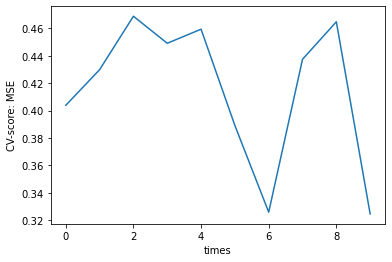

In [31]:
kfold = KFold(n_splits=10, random_state=10)
cvscores = []

for train, test in kfold.split(X_train_pca, Y_train):
    
    # Fit the model
    history = model.fit(X_train_pca.iloc[train], Y_train.iloc[train], epochs=800)
    # evaluate the model
    scores = model.evaluate(X_train_pca.iloc[test], Y_train.iloc[test])
    
    cvscores.append(scores)

plt.plot(cvscores)
plt.xlabel('times')
plt.ylabel('CV-score: MSE')

Now that the model is trained, we can use it to predict the quality of the wine for the testing data. Note that any preprocessing steps you applied to the training data, you will also have to apply to the testing data. Consider using model.predict(...) for this step.

## Make a prediction

In [34]:
# Preprocessing the test data with PCA
pca = PCA(n_components=3)
X_test_pca = pca.fit_transform(StandardScaler().fit_transform(testing_data))

print('Shape of testing data after PCA:',X_test_pca.shape)

Shape of testing data after PCA: (320, 3)


In [35]:
Result_predict = model.predict(X_test_pca)
Result_predict

array([[5.26108  ],
       [6.396987 ],
       [5.5524926],
       [5.434427 ],
       [4.271955 ],
       [8.370044 ],
       [5.015755 ],
       [5.7127805],
       [5.216904 ],
       [6.1593537],
       [5.506896 ],
       [4.8897257],
       [5.3878126],
       [6.4779058],
       [5.345683 ],
       [5.2585144],
       [6.0556035],
       [4.9669127],
       [6.1999946],
       [5.5573545],
       [5.28525  ],
       [5.1742663],
       [5.313685 ],
       [5.787049 ],
       [5.597325 ],
       [5.4228215],
       [5.0971274],
       [5.091724 ],
       [5.1935835],
       [6.1049504],
       [6.6848927],
       [5.3914275],
       [5.968134 ],
       [5.4034114],
       [5.6309333],
       [4.4270186],
       [5.2792797],
       [5.045676 ],
       [5.269134 ],
       [5.325853 ],
       [5.323936 ],
       [5.461285 ],
       [5.4037127],
       [5.667421 ],
       [5.4175577],
       [5.771153 ],
       [5.105963 ],
       [5.2189074],
       [5.8382554],
       [5.281816 ],


In [36]:
Result_predict = pd.DataFrame(Result_predict)
Result_predict.to_csv('Task1-Regression-Result.csv',header=False)

# Part 2: Classification

The first step in classification is to divide the training data into its three classes. Recall that the classes are:

* wine belongs to class 'Good' if quality >= 7
* wine belongs to class 'Average' if 7 > quality >= 5
* wine belongs to class 'Bad' if 5 > quality


It's imporant to remember that the task of regression is not the same as classification. As such, using three ordinal classes such as ['Bad' = 1, 'Average' = 2, 'Good' = 3] is not appropriate. To understand the intuition behind this, ask yourself what value should the model predict if it assigns a 50% probability that a wine is 'Bad', a 0% probability that a wine is 'Average', and a 50% probability that a wine is 'Good'. Answering this question is a first step in developing an encoding scheme for the classes.

Hint: look at the imports that are included.

## Prepare the category data

In [37]:
Y_train['class'] = ''

wine_class = []
temp = Y_train.iloc[:,0].to_numpy().tolist()

for i in temp:
    if i >= 7: wine_class.append(2)  # Good=2
    if 5 <= i < 7: wine_class.append(1)  # Average=1
    if i < 5: wine_class.append(0)  # Bad=0

wine_class = pd.Series(wine_class)
Y_train['class'] = wine_class

In [38]:
Y_train

quality  class
0         5.0      1
1         5.0      1
2         6.0      1
3         6.0      1
4         5.0      1
...       ...    ...
1114      6.0      1
1115      6.0      1
1116      6.0      1
1117      7.0      2
1118      6.0      1

[1119 rows x 2 columns]

In [39]:
# Convert to one-hot format
from keras.utils import to_categorical

wine_class = to_categorical(Y_train.iloc[:,1])

In [43]:
wine_train = X_train_pca.to_numpy()
wine_train.shape

(1119, 3)

Having encoded the outputs for the training data, you can now build and compile the model. This can be done the same as before but pay close attention to the model outputs, the activation function in the final layer, and the loss function used.

## Build the model

In [40]:
def build_model_classification(n_hidden, n_neurons):
    model = Sequential()
    model.add(Dense(n_neurons,activation='relu'))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons), activation="softmax")
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Hyperparameter tuning
<b> We use 10-fold cross validation here </b>

In [41]:
keras_cls = wrappers.scikit_learn.KerasClassifier(build_model_classification)

In [44]:
param_distribs_cls = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": [25,30,35,40]
}

rnd_search_cv_cls = RandomizedSearchCV(keras_cls, param_distribs_cls, cv=10)
rnd_search_cv_cls.fit(wine_train, wine_class, epochs=800)

Epoch 1/800
32/32 [==============================] - 1s 1ms/step - loss: 1.1116 - accuracy: 0.4745
Epoch 2/800
32/32 [==============================] - 0s 1ms/step - loss: 0.7784 - accuracy: 0.7878
Epoch 3/800
32/32 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.8266
Epoch 4/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5920 - accuracy: 0.8193
Epoch 5/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5699 - accuracy: 0.8104
Epoch 6/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5200 - accuracy: 0.8339
Epoch 7/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5296 - accuracy: 0.8290
Epoch 8/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5253 - accuracy: 0.8168
Epoch 9/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5315 - accuracy: 0.8207
Epoch 10/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5077 - accuracy: 0.8188
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8291
Epoch 164/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8313
Epoch 165/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.8223
Epoch 166/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.8302
Epoch 167/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8353
Epoch 168/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8456
Epoch 169/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3868 - accuracy: 0.8506
Epoch 170/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.8459
Epoch 171/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8316
Epoch 172/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3968 - accuracy: 0.8381
Epoc

32/32 [==============================] - 0s 965us/step - loss: 0.4032 - accuracy: 0.8335
Epoch 324/800
32/32 [==============================] - 0s 933us/step - loss: 0.3948 - accuracy: 0.8440
Epoch 325/800
32/32 [==============================] - 0s 901us/step - loss: 0.4028 - accuracy: 0.8437
Epoch 326/800
32/32 [==============================] - 0s 868us/step - loss: 0.4059 - accuracy: 0.8372
Epoch 327/800
32/32 [==============================] - 0s 836us/step - loss: 0.3984 - accuracy: 0.8433
Epoch 328/800
32/32 [==============================] - 0s 933us/step - loss: 0.4087 - accuracy: 0.8300
Epoch 329/800
32/32 [==============================] - 0s 901us/step - loss: 0.4158 - accuracy: 0.8234
Epoch 330/800
32/32 [==============================] - 0s 933us/step - loss: 0.4028 - accuracy: 0.8363
Epoch 331/800
32/32 [==============================] - 0s 933us/step - loss: 0.4158 - accuracy: 0.8387
Epoch 332/800
32/32 [==============================] - 0s 836us/step - loss: 0.4005 - a

32/32 [==============================] - 0s 901us/step - loss: 0.4284 - accuracy: 0.8331
Epoch 484/800
32/32 [==============================] - 0s 901us/step - loss: 0.4230 - accuracy: 0.8510
Epoch 485/800
32/32 [==============================] - 0s 837us/step - loss: 0.3994 - accuracy: 0.8493
Epoch 486/800
32/32 [==============================] - 0s 901us/step - loss: 0.3939 - accuracy: 0.8489
Epoch 487/800
32/32 [==============================] - 0s 901us/step - loss: 0.3948 - accuracy: 0.8380
Epoch 488/800
32/32 [==============================] - 0s 933us/step - loss: 0.3810 - accuracy: 0.8429
Epoch 489/800
32/32 [==============================] - 0s 869us/step - loss: 0.4228 - accuracy: 0.8405
Epoch 490/800
32/32 [==============================] - 0s 869us/step - loss: 0.4182 - accuracy: 0.8331
Epoch 491/800
32/32 [==============================] - 0s 836us/step - loss: 0.4255 - accuracy: 0.8198
Epoch 492/800
32/32 [==============================] - 0s 965us/step - loss: 0.4154 - a

32/32 [==============================] - 0s 1ms/step - loss: 0.4180 - accuracy: 0.8195
Epoch 644/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8412
Epoch 645/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8429
Epoch 646/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8419
Epoch 647/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8329
Epoch 648/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8295
Epoch 649/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8278
Epoch 650/800
32/32 [==============================] - 0s 997us/step - loss: 0.3834 - accuracy: 0.8493
Epoch 651/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8344
Epoch 652/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8264
Ep

32/32 [==============================] - 0s 933us/step - loss: 0.8553 - accuracy: 0.6568
Epoch 3/800
32/32 [==============================] - 0s 933us/step - loss: 0.6896 - accuracy: 0.8224
Epoch 4/800
32/32 [==============================] - 0s 869us/step - loss: 0.6166 - accuracy: 0.8263
Epoch 5/800
32/32 [==============================] - 0s 804us/step - loss: 0.5960 - accuracy: 0.8151
Epoch 6/800
32/32 [==============================] - 0s 869us/step - loss: 0.5419 - accuracy: 0.8250
Epoch 7/800
32/32 [==============================] - 0s 869us/step - loss: 0.5457 - accuracy: 0.8185
Epoch 8/800
32/32 [==============================] - 0s 869us/step - loss: 0.5378 - accuracy: 0.8052
Epoch 9/800
32/32 [==============================] - 0s 869us/step - loss: 0.5233 - accuracy: 0.8169
Epoch 10/800
32/32 [==============================] - 0s 869us/step - loss: 0.5041 - accuracy: 0.8102
Epoch 11/800
32/32 [==============================] - 0s 933us/step - loss: 0.4903 - accuracy: 0.8300


32/32 [==============================] - 0s 901us/step - loss: 0.4299 - accuracy: 0.8378
Epoch 164/800
32/32 [==============================] - 0s 804us/step - loss: 0.4277 - accuracy: 0.8389
Epoch 165/800
32/32 [==============================] - 0s 901us/step - loss: 0.4243 - accuracy: 0.8338
Epoch 166/800
32/32 [==============================] - 0s 837us/step - loss: 0.4284 - accuracy: 0.8302
Epoch 167/800
32/32 [==============================] - 0s 836us/step - loss: 0.3966 - accuracy: 0.8454
Epoch 168/800
32/32 [==============================] - 0s 901us/step - loss: 0.4004 - accuracy: 0.8483
Epoch 169/800
32/32 [==============================] - 0s 836us/step - loss: 0.3908 - accuracy: 0.8550
Epoch 170/800
32/32 [==============================] - 0s 869us/step - loss: 0.4066 - accuracy: 0.8544
Epoch 171/800
32/32 [==============================] - 0s 804us/step - loss: 0.4137 - accuracy: 0.8434
Epoch 172/800
32/32 [==============================] - 0s 772us/step - loss: 0.3980 - a

32/32 [==============================] - 0s 1ms/step - loss: 0.4072 - accuracy: 0.8348
Epoch 324/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3916 - accuracy: 0.8596
Epoch 325/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4065 - accuracy: 0.8487
Epoch 326/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4062 - accuracy: 0.8351
Epoch 327/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.8375
Epoch 328/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8415
Epoch 329/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4106 - accuracy: 0.8329
Epoch 330/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8431
Epoch 331/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8434
Epoch 332/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.8453
Epoc

Epoch 484/800
32/32 [==============================] - 0s 901us/step - loss: 0.4162 - accuracy: 0.8530
Epoch 485/800
32/32 [==============================] - 0s 836us/step - loss: 0.4019 - accuracy: 0.8477
Epoch 486/800
32/32 [==============================] - 0s 804us/step - loss: 0.3997 - accuracy: 0.8431
Epoch 487/800
32/32 [==============================] - 0s 869us/step - loss: 0.3969 - accuracy: 0.8488
Epoch 488/800
32/32 [==============================] - 0s 836us/step - loss: 0.3859 - accuracy: 0.8487
Epoch 489/800
32/32 [==============================] - 0s 869us/step - loss: 0.4249 - accuracy: 0.8419
Epoch 490/800
32/32 [==============================] - 0s 836us/step - loss: 0.4243 - accuracy: 0.8382
Epoch 491/800
32/32 [==============================] - 0s 804us/step - loss: 0.4143 - accuracy: 0.8313
Epoch 492/800
32/32 [==============================] - 0s 837us/step - loss: 0.4042 - accuracy: 0.8437
Epoch 493/800
32/32 [==============================] - 0s 836us/step - lo

32/32 [==============================] - 0s 1ms/step - loss: 0.3894 - accuracy: 0.8499
Epoch 645/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8502
Epoch 646/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3852 - accuracy: 0.8501
Epoch 647/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8416
Epoch 648/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.8408
Epoch 649/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4163 - accuracy: 0.8500
Epoch 650/800
32/32 [==============================] - 0s 997us/step - loss: 0.3769 - accuracy: 0.8563
Epoch 651/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.8467
Epoch 652/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4186 - accuracy: 0.8406
Epoch 653/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8518
Ep

32/32 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.8200
Epoch 4/800
32/32 [==============================] - 0s 1ms/step - loss: 0.6033 - accuracy: 0.8306
Epoch 5/800
32/32 [==============================] - 0s 965us/step - loss: 0.5719 - accuracy: 0.8239
Epoch 6/800
32/32 [==============================] - 0s 997us/step - loss: 0.5252 - accuracy: 0.8468
Epoch 7/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5313 - accuracy: 0.8376
Epoch 8/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5215 - accuracy: 0.8306
Epoch 9/800
32/32 [==============================] - 0s 997us/step - loss: 0.5017 - accuracy: 0.8363
Epoch 10/800
32/32 [==============================] - 0s 965us/step - loss: 0.4855 - accuracy: 0.8363
Epoch 11/800
32/32 [==============================] - 0s 997us/step - loss: 0.4689 - accuracy: 0.8417
Epoch 12/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4842 - accuracy: 0.8437
Epoch 13/

32/32 [==============================] - 0s 1ms/step - loss: 0.4092 - accuracy: 0.8481
Epoch 164/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4232 - accuracy: 0.8410
Epoch 165/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4203 - accuracy: 0.8376
Epoch 166/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4197 - accuracy: 0.8434
Epoch 167/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4045 - accuracy: 0.8515
Epoch 168/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8501
Epoch 169/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3981 - accuracy: 0.8504
Epoch 170/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3861 - accuracy: 0.8645
Epoch 171/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8421
Epoch 172/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8465
Epoc

32/32 [==============================] - 0s 869us/step - loss: 0.3756 - accuracy: 0.8546
Epoch 323/800
32/32 [==============================] - 0s 965us/step - loss: 0.4011 - accuracy: 0.8476
Epoch 324/800
32/32 [==============================] - 0s 901us/step - loss: 0.3979 - accuracy: 0.8585
Epoch 325/800
32/32 [==============================] - 0s 869us/step - loss: 0.3974 - accuracy: 0.8559
Epoch 326/800
32/32 [==============================] - 0s 868us/step - loss: 0.4104 - accuracy: 0.8482
Epoch 327/800
32/32 [==============================] - 0s 868us/step - loss: 0.4318 - accuracy: 0.8335
Epoch 328/800
32/32 [==============================] - 0s 836us/step - loss: 0.4050 - accuracy: 0.8450
Epoch 329/800
32/32 [==============================] - 0s 869us/step - loss: 0.4057 - accuracy: 0.8414
Epoch 330/800
32/32 [==============================] - 0s 869us/step - loss: 0.3936 - accuracy: 0.8519
Epoch 331/800
32/32 [==============================] - 0s 804us/step - loss: 0.4375 - a

Epoch 481/800
32/32 [==============================] - 0s 965us/step - loss: 0.3629 - accuracy: 0.8631
Epoch 482/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4034 - accuracy: 0.8432
Epoch 483/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.8470
Epoch 484/800
32/32 [==============================] - 0s 965us/step - loss: 0.4133 - accuracy: 0.8588
Epoch 485/800
32/32 [==============================] - 0s 933us/step - loss: 0.3827 - accuracy: 0.8657
Epoch 486/800
32/32 [==============================] - 0s 933us/step - loss: 0.3939 - accuracy: 0.8569
Epoch 487/800
32/32 [==============================] - 0s 836us/step - loss: 0.4023 - accuracy: 0.8510
Epoch 488/800
32/32 [==============================] - 0s 836us/step - loss: 0.3891 - accuracy: 0.8530
Epoch 489/800
32/32 [==============================] - 0s 868us/step - loss: 0.4194 - accuracy: 0.8414
Epoch 490/800
32/32 [==============================] - 0s 836us/step - loss: 

32/32 [==============================] - 0s 997us/step - loss: 0.4219 - accuracy: 0.8459
Epoch 640/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3886 - accuracy: 0.8325
Epoch 641/800
32/32 [==============================] - 0s 965us/step - loss: 0.3747 - accuracy: 0.8515
Epoch 642/800
32/32 [==============================] - 0s 965us/step - loss: 0.4081 - accuracy: 0.8399
Epoch 643/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4151 - accuracy: 0.8349
Epoch 644/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3768 - accuracy: 0.8599
Epoch 645/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8586
Epoch 646/800
32/32 [==============================] - 0s 998us/step - loss: 0.3897 - accuracy: 0.8381
Epoch 647/800
32/32 [==============================] - 0s 933us/step - loss: 0.4046 - accuracy: 0.8463
Epoch 648/800
32/32 [==============================] - 0s 901us/step - loss: 0.4016 - accuracy:

32/32 [==============================] - 0s 965us/step - loss: 0.3857 - accuracy: 0.8368
Epoch 800/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.7768
Epoch 1/800
32/32 [==============================] - 1s 1ms/step - loss: 1.2098 - accuracy: 0.3838
Epoch 2/800
32/32 [==============================] - 0s 1ms/step - loss: 0.8586 - accuracy: 0.7038
Epoch 3/800
32/32 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.8041
Epoch 4/800
32/32 [==============================] - 0s 997us/step - loss: 0.5932 - accuracy: 0.8287
Epoch 5/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5820 - accuracy: 0.8050
Epoch 6/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5330 - accuracy: 0.8309
Epoch 7/800
32/32 [==============================] - 0s 965us/step - loss: 0.5489 - accuracy: 0.8244
Epoch 8/800
32/32 [==============================] - 0s 933us/step - loss: 0.5192 - accuracy: 0.8266
Epoch 9/800
32

32/32 [==============================] - 0s 965us/step - loss: 0.4396 - accuracy: 0.8370
Epoch 159/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.8391
Epoch 160/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3845 - accuracy: 0.8654
Epoch 161/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3913 - accuracy: 0.8488
Epoch 162/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3891 - accuracy: 0.8479
Epoch 163/800
32/32 [==============================] - 0s 933us/step - loss: 0.3959 - accuracy: 0.8445
Epoch 164/800
32/32 [==============================] - 0s 869us/step - loss: 0.4300 - accuracy: 0.8288
Epoch 165/800
32/32 [==============================] - 0s 900us/step - loss: 0.4239 - accuracy: 0.8383
Epoch 166/800
32/32 [==============================] - 0s 965us/step - loss: 0.3981 - accuracy: 0.8490
Epoch 167/800
32/32 [==============================] - 0s 901us/step - loss: 0.4056 - accuracy:

32/32 [==============================] - 0s 901us/step - loss: 0.3845 - accuracy: 0.8466
Epoch 319/800
32/32 [==============================] - 0s 997us/step - loss: 0.4096 - accuracy: 0.8499
Epoch 320/800
32/32 [==============================] - 0s 965us/step - loss: 0.3933 - accuracy: 0.8461
Epoch 321/800
32/32 [==============================] - 0s 965us/step - loss: 0.4082 - accuracy: 0.8394
Epoch 322/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3692 - accuracy: 0.8548
Epoch 323/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.8405
Epoch 324/800
32/32 [==============================] - 0s 997us/step - loss: 0.4127 - accuracy: 0.8415
Epoch 325/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8356
Epoch 326/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8440
Epoch 327/800
32/32 [==============================] - 0s 965us/step - loss: 0.4202 - accuracy:

32/32 [==============================] - 0s 933us/step - loss: 0.3968 - accuracy: 0.8402
Epoch 479/800
32/32 [==============================] - 0s 901us/step - loss: 0.3672 - accuracy: 0.8531
Epoch 480/800
32/32 [==============================] - 0s 901us/step - loss: 0.3972 - accuracy: 0.8454
Epoch 481/800
32/32 [==============================] - 0s 868us/step - loss: 0.3610 - accuracy: 0.8483
Epoch 482/800
32/32 [==============================] - 0s 965us/step - loss: 0.3960 - accuracy: 0.8362
Epoch 483/800
32/32 [==============================] - 0s 965us/step - loss: 0.4112 - accuracy: 0.8334
Epoch 484/800
32/32 [==============================] - 0s 933us/step - loss: 0.4148 - accuracy: 0.8453
Epoch 485/800
32/32 [==============================] - 0s 869us/step - loss: 0.3811 - accuracy: 0.8507
Epoch 486/800
32/32 [==============================] - 0s 934us/step - loss: 0.3904 - accuracy: 0.8484
Epoch 487/800
32/32 [==============================] - 0s 837us/step - loss: 0.4009 - a

Epoch 558/800
32/32 [==============================] - 0s 997us/step - loss: 0.3844 - accuracy: 0.8386
Epoch 559/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8490
Epoch 560/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8505
Epoch 561/800
32/32 [==============================] - 0s 901us/step - loss: 0.3760 - accuracy: 0.8537
Epoch 562/800
32/32 [==============================] - 0s 997us/step - loss: 0.4065 - accuracy: 0.8438
Epoch 563/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8314
Epoch 564/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8386
Epoch 565/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8401
Epoch 566/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3864 - accuracy: 0.8410
Epoch 567/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3965 - a

32/32 [==============================] - 0s 965us/step - loss: 0.3490 - accuracy: 0.8632
Epoch 639/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.8507
Epoch 640/800
32/32 [==============================] - 0s 965us/step - loss: 0.3921 - accuracy: 0.8305
Epoch 641/800
32/32 [==============================] - 0s 869us/step - loss: 0.3729 - accuracy: 0.8397
Epoch 642/800
32/32 [==============================] - 0s 836us/step - loss: 0.4111 - accuracy: 0.8376
Epoch 643/800
32/32 [==============================] - 0s 869us/step - loss: 0.4040 - accuracy: 0.8386
Epoch 644/800
32/32 [==============================] - 0s 997us/step - loss: 0.3692 - accuracy: 0.8613
Epoch 645/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8433
Epoch 646/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8535
Epoch 647/800
32/32 [==============================] - 0s 965us/step - loss: 0.3871 - accurac

32/32 [==============================] - 0s 774us/step - loss: 0.3833 - accuracy: 0.8423
Epoch 799/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.8378
Epoch 800/800
4/4 [==============================] - 0s 0s/step - loss: 0.5078 - accuracy: 0.8036
Epoch 1/800
32/32 [==============================] - 0s 503us/step - loss: 1.0589 - accuracy: 0.4383
Epoch 2/800
32/32 [==============================] - 0s 504us/step - loss: 0.7750 - accuracy: 0.7807
Epoch 3/800
32/32 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.8251
Epoch 4/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5668 - accuracy: 0.8317
Epoch 5/800
32/32 [==============================] - 0s 504us/step - loss: 0.5731 - accuracy: 0.8133
Epoch 6/800
32/32 [==============================] - 0s 503us/step - loss: 0.5046 - accuracy: 0.8457
Epoch 7/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5426 - accuracy: 0.8282
Epoch 8/800

32/32 [==============================] - 0s 997us/step - loss: 0.4375 - accuracy: 0.8418
Epoch 159/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4164 - accuracy: 0.8537
Epoch 160/800
32/32 [==============================] - 0s 869us/step - loss: 0.3762 - accuracy: 0.8724
Epoch 161/800
32/32 [==============================] - 0s 836us/step - loss: 0.3934 - accuracy: 0.8485
Epoch 162/800
32/32 [==============================] - 0s 933us/step - loss: 0.3624 - accuracy: 0.8601
Epoch 163/800
32/32 [==============================] - 0s 901us/step - loss: 0.3956 - accuracy: 0.8549
Epoch 164/800
32/32 [==============================] - 0s 997us/step - loss: 0.4343 - accuracy: 0.8316
Epoch 165/800
32/32 [==============================] - 0s 997us/step - loss: 0.4100 - accuracy: 0.8518
Epoch 166/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8436
Epoch 167/800
32/32 [==============================] - 0s 804us/step - loss: 0.4183 - accur

32/32 [==============================] - 0s 901us/step - loss: 0.3501 - accuracy: 0.8701
Epoch 239/800
32/32 [==============================] - 0s 901us/step - loss: 0.4415 - accuracy: 0.8363
Epoch 240/800
32/32 [==============================] - 0s 965us/step - loss: 0.3886 - accuracy: 0.8477
Epoch 241/800
32/32 [==============================] - 0s 901us/step - loss: 0.3942 - accuracy: 0.8524
Epoch 242/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8559
Epoch 243/800
32/32 [==============================] - 0s 965us/step - loss: 0.4129 - accuracy: 0.8316
Epoch 244/800
32/32 [==============================] - 0s 901us/step - loss: 0.4066 - accuracy: 0.8427
Epoch 245/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4199 - accuracy: 0.8363
Epoch 246/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3900 - accuracy: 0.8482
Epoch 247/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3780 - accuracy:

32/32 [==============================] - 0s 965us/step - loss: 0.3823 - accuracy: 0.8519
Epoch 319/800
32/32 [==============================] - 0s 901us/step - loss: 0.3987 - accuracy: 0.8578
Epoch 320/800
32/32 [==============================] - 0s 901us/step - loss: 0.4151 - accuracy: 0.8429
Epoch 321/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8415
Epoch 322/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3745 - accuracy: 0.8617
Epoch 323/800
32/32 [==============================] - 0s 997us/step - loss: 0.4103 - accuracy: 0.8357
Epoch 324/800
32/32 [==============================] - 0s 998us/step - loss: 0.3944 - accuracy: 0.8525
Epoch 325/800
32/32 [==============================] - 0s 901us/step - loss: 0.3841 - accuracy: 0.8504
Epoch 326/800
32/32 [==============================] - 0s 933us/step - loss: 0.3801 - accuracy: 0.8540
Epoch 327/800
32/32 [==============================] - 0s 965us/step - loss: 0.4151 - accur

Epoch 477/800
32/32 [==============================] - 0s 933us/step - loss: 0.3908 - accuracy: 0.8539
Epoch 478/800
32/32 [==============================] - 0s 997us/step - loss: 0.3833 - accuracy: 0.8496
Epoch 479/800
32/32 [==============================] - 0s 965us/step - loss: 0.3727 - accuracy: 0.8488
Epoch 480/800
32/32 [==============================] - 0s 836us/step - loss: 0.3880 - accuracy: 0.8536
Epoch 481/800
32/32 [==============================] - 0s 965us/step - loss: 0.3737 - accuracy: 0.8416
Epoch 482/800
32/32 [==============================] - 0s 997us/step - loss: 0.3922 - accuracy: 0.8507
Epoch 483/800
32/32 [==============================] - 0s 965us/step - loss: 0.3979 - accuracy: 0.8359
Epoch 484/800
32/32 [==============================] - 0s 965us/step - loss: 0.3942 - accuracy: 0.8493
Epoch 485/800
32/32 [==============================] - 0s 933us/step - loss: 0.3601 - accuracy: 0.8638
Epoch 486/800
32/32 [==============================] - 0s 933us/step - lo

32/32 [==============================] - 0s 836us/step - loss: 0.3610 - accuracy: 0.8632
Epoch 637/800
32/32 [==============================] - 0s 740us/step - loss: 0.3868 - accuracy: 0.8455
Epoch 638/800
32/32 [==============================] - 0s 836us/step - loss: 0.3465 - accuracy: 0.8619
Epoch 639/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.8511
Epoch 640/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8462
Epoch 641/800
32/32 [==============================] - 0s 965us/step - loss: 0.3837 - accuracy: 0.8425
Epoch 642/800
32/32 [==============================] - 0s 997us/step - loss: 0.4131 - accuracy: 0.8380
Epoch 643/800
32/32 [==============================] - 0s 966us/step - loss: 0.4074 - accuracy: 0.8385
Epoch 644/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3619 - accuracy: 0.8657
Epoch 645/800
32/32 [==============================] - 0s 837us/step - loss: 0.3929 - accurac

32/32 [==============================] - 0s 836us/step - loss: 0.4160 - accuracy: 0.8295
Epoch 795/800
32/32 [==============================] - 0s 869us/step - loss: 0.3882 - accuracy: 0.8476
Epoch 796/800
32/32 [==============================] - 0s 965us/step - loss: 0.3841 - accuracy: 0.8563
Epoch 797/800
32/32 [==============================] - 0s 869us/step - loss: 0.3890 - accuracy: 0.8501
Epoch 798/800
32/32 [==============================] - 0s 869us/step - loss: 0.3885 - accuracy: 0.8436
Epoch 799/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8427
Epoch 800/800
4/4 [==============================] - 0s 4ms/step - loss: 0.5464 - accuracy: 0.7589
Epoch 1/800
32/32 [==============================] - 0s 1ms/step - loss: 1.4709 - accuracy: 0.1653
Epoch 2/800
32/32 [==============================] - 0s 1ms/step - loss: 1.0134 - accuracy: 0.4869
Epoch 3/800
32/32 [==============================] - 0s 1ms/step - loss: 0.7473 - accuracy: 0.7977
Ep

32/32 [==============================] - 0s 998us/step - loss: 0.4384 - accuracy: 0.8262
Epoch 155/800
32/32 [==============================] - 0s 997us/step - loss: 0.4253 - accuracy: 0.8271
Epoch 156/800
32/32 [==============================] - 0s 901us/step - loss: 0.4480 - accuracy: 0.8254
Epoch 157/800
32/32 [==============================] - 0s 965us/step - loss: 0.4325 - accuracy: 0.8272
Epoch 158/800
32/32 [==============================] - 0s 901us/step - loss: 0.4527 - accuracy: 0.8315
Epoch 159/800
32/32 [==============================] - 0s 997us/step - loss: 0.4257 - accuracy: 0.8259
Epoch 160/800
32/32 [==============================] - 0s 997us/step - loss: 0.3899 - accuracy: 0.8502
Epoch 161/800
32/32 [==============================] - 0s 997us/step - loss: 0.4029 - accuracy: 0.8334
Epoch 162/800
32/32 [==============================] - 0s 933us/step - loss: 0.3724 - accuracy: 0.8495
Epoch 163/800
32/32 [==============================] - 0s 933us/step - loss: 0.4142 - a

32/32 [==============================] - 0s 868us/step - loss: 0.4125 - accuracy: 0.8169
Epoch 313/800
32/32 [==============================] - 0s 933us/step - loss: 0.4150 - accuracy: 0.8267
Epoch 314/800
32/32 [==============================] - 0s 998us/step - loss: 0.4167 - accuracy: 0.8331
Epoch 315/800
32/32 [==============================] - 0s 965us/step - loss: 0.4014 - accuracy: 0.8338
Epoch 316/800
32/32 [==============================] - 0s 965us/step - loss: 0.4080 - accuracy: 0.8415
Epoch 317/800
32/32 [==============================] - 0s 933us/step - loss: 0.3967 - accuracy: 0.8311
Epoch 318/800
32/32 [==============================] - 0s 933us/step - loss: 0.4010 - accuracy: 0.8337
Epoch 319/800
32/32 [==============================] - 0s 965us/step - loss: 0.4189 - accuracy: 0.8436
Epoch 320/800
32/32 [==============================] - 0s 965us/step - loss: 0.4218 - accuracy: 0.8272
Epoch 321/800
32/32 [==============================] - 0s 901us/step - loss: 0.4212 - a

32/32 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8265
Epoch 393/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.8275
Epoch 394/800
32/32 [==============================] - 0s 901us/step - loss: 0.4657 - accuracy: 0.8182
Epoch 395/800
32/32 [==============================] - 0s 869us/step - loss: 0.3916 - accuracy: 0.8469
Epoch 396/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8209
Epoch 397/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.8170
Epoch 398/800
32/32 [==============================] - 0s 997us/step - loss: 0.3783 - accuracy: 0.8517
Epoch 399/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4129 - accuracy: 0.8313
Epoch 400/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.8066
Epoch 401/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4086 - accuracy: 0.838

32/32 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8371
Epoch 553/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4057 - accuracy: 0.8307
Epoch 554/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.8238
Epoch 555/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3646 - accuracy: 0.8508
Epoch 556/800
32/32 [==============================] - 0s 965us/step - loss: 0.3954 - accuracy: 0.8343
Epoch 557/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8340
Epoch 558/800
32/32 [==============================] - 0s 869us/step - loss: 0.3895 - accuracy: 0.8546
Epoch 559/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8400
Epoch 560/800
32/32 [==============================] - 0s 933us/step - loss: 0.3943 - accuracy: 0.8502
Epoch 561/800
32/32 [==============================] - 0s 836us/step - loss: 0.3812 - accuracy: 0.8

32/32 [==============================] - 0s 933us/step - loss: 0.3890 - accuracy: 0.8450
Epoch 712/800
32/32 [==============================] - 0s 965us/step - loss: 0.3831 - accuracy: 0.8550
Epoch 713/800
32/32 [==============================] - 0s 933us/step - loss: 0.4034 - accuracy: 0.8447
Epoch 714/800
32/32 [==============================] - 0s 901us/step - loss: 0.4361 - accuracy: 0.8148
Epoch 715/800
32/32 [==============================] - 0s 901us/step - loss: 0.4219 - accuracy: 0.8273
Epoch 716/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3880 - accuracy: 0.8533
Epoch 717/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.8168
Epoch 718/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3915 - accuracy: 0.8490
Epoch 719/800
32/32 [==============================] - 0s 997us/step - loss: 0.3862 - accuracy: 0.8553
Epoch 720/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4190 - accuracy:

32/32 [==============================] - 0s 901us/step - loss: 0.4119 - accuracy: 0.8521
Epoch 70/800
32/32 [==============================] - 0s 965us/step - loss: 0.4331 - accuracy: 0.8326
Epoch 71/800
32/32 [==============================] - 0s 933us/step - loss: 0.4271 - accuracy: 0.8413
Epoch 72/800
32/32 [==============================] - 0s 900us/step - loss: 0.4410 - accuracy: 0.8346
Epoch 73/800
32/32 [==============================] - 0s 804us/step - loss: 0.4421 - accuracy: 0.8293
Epoch 74/800
32/32 [==============================] - 0s 837us/step - loss: 0.4584 - accuracy: 0.8196
Epoch 75/800
32/32 [==============================] - 0s 868us/step - loss: 0.4028 - accuracy: 0.8451
Epoch 76/800
32/32 [==============================] - 0s 965us/step - loss: 0.4357 - accuracy: 0.8248
Epoch 77/800
32/32 [==============================] - 0s 837us/step - loss: 0.4292 - accuracy: 0.8224
Epoch 78/800
32/32 [==============================] - 0s 869us/step - loss: 0.4386 - accuracy: 

32/32 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8265
Epoch 230/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.8254
Epoch 231/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.8424
Epoch 232/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4042 - accuracy: 0.8391
Epoch 233/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.8127
Epoch 234/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8392
Epoch 235/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4068 - accuracy: 0.8227
Epoch 236/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8377
Epoch 237/800
32/32 [==============================] - 0s 869us/step - loss: 0.3910 - accuracy: 0.8482
Epoch 238/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8529
Ep

32/32 [==============================] - 0s 901us/step - loss: 0.4286 - accuracy: 0.8121
Epoch 389/800
32/32 [==============================] - 0s 998us/step - loss: 0.4127 - accuracy: 0.8265
Epoch 390/800
32/32 [==============================] - 0s 878us/step - loss: 0.3698 - accuracy: 0.8452
Epoch 391/800
32/32 [==============================] - 0s 967us/step - loss: 0.4552 - accuracy: 0.8087
Epoch 392/800
32/32 [==============================] - 0s 740us/step - loss: 0.4305 - accuracy: 0.8232
Epoch 393/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4057 - accuracy: 0.8294
Epoch 394/800
32/32 [==============================] - 0s 836us/step - loss: 0.4552 - accuracy: 0.8202
Epoch 395/800
32/32 [==============================] - 0s 933us/step - loss: 0.3874 - accuracy: 0.8445
Epoch 396/800
32/32 [==============================] - 0s 965us/step - loss: 0.4127 - accuracy: 0.8302
Epoch 397/800
32/32 [==============================] - 0s 901us/step - loss: 0.4142 - acc

32/32 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.8373
Epoch 547/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.8252
Epoch 548/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8369
Epoch 549/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8320
Epoch 550/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8395
Epoch 551/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8327
Epoch 552/800
32/32 [==============================] - 0s 965us/step - loss: 0.3969 - accuracy: 0.8357
Epoch 553/800
32/32 [==============================] - 0s 933us/step - loss: 0.4099 - accuracy: 0.8348
Epoch 554/800
32/32 [==============================] - 0s 933us/step - loss: 0.4183 - accuracy: 0.8231
Epoch 555/800
32/32 [==============================] - 0s 934us/step - loss: 0.3706 - accuracy: 0.8

32/32 [==============================] - 0s 934us/step - loss: 0.4035 - accuracy: 0.8328
Epoch 705/800
32/32 [==============================] - 0s 997us/step - loss: 0.3843 - accuracy: 0.8421
Epoch 706/800
32/32 [==============================] - 0s 899us/step - loss: 0.3900 - accuracy: 0.8356
Epoch 707/800
32/32 [==============================] - 0s 869us/step - loss: 0.3741 - accuracy: 0.8342
Epoch 708/800
32/32 [==============================] - 0s 901us/step - loss: 0.3749 - accuracy: 0.8363
Epoch 709/800
32/32 [==============================] - 0s 933us/step - loss: 0.4063 - accuracy: 0.8277
Epoch 710/800
32/32 [==============================] - 0s 933us/step - loss: 0.3829 - accuracy: 0.8533
Epoch 711/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8354
Epoch 712/800
32/32 [==============================] - 0s 965us/step - loss: 0.3850 - accuracy: 0.8452
Epoch 713/800
32/32 [==============================] - 0s 772us/step - loss: 0.3918 - acc

Epoch 63/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.8271
Epoch 64/800
32/32 [==============================] - 0s 869us/step - loss: 0.4129 - accuracy: 0.8427
Epoch 65/800
32/32 [==============================] - 0s 804us/step - loss: 0.4643 - accuracy: 0.8099
Epoch 66/800
32/32 [==============================] - 0s 869us/step - loss: 0.4237 - accuracy: 0.8480
Epoch 67/800
32/32 [==============================] - 0s 741us/step - loss: 0.3994 - accuracy: 0.8503
Epoch 68/800
32/32 [==============================] - 0s 740us/step - loss: 0.4286 - accuracy: 0.8413
Epoch 69/800
32/32 [==============================] - 0s 772us/step - loss: 0.4112 - accuracy: 0.8593
Epoch 70/800
32/32 [==============================] - 0s 836us/step - loss: 0.4361 - accuracy: 0.8352
Epoch 71/800
32/32 [==============================] - 0s 804us/step - loss: 0.4395 - accuracy: 0.8451
Epoch 72/800
32/32 [==============================] - 0s 869us/step - loss: 0.4289 -

32/32 [==============================] - 0s 836us/step - loss: 0.4219 - accuracy: 0.8214
Epoch 144/800
32/32 [==============================] - 0s 869us/step - loss: 0.4182 - accuracy: 0.8420
Epoch 145/800
32/32 [==============================] - 0s 814us/step - loss: 0.3952 - accuracy: 0.8515
Epoch 146/800
32/32 [==============================] - 0s 772us/step - loss: 0.4030 - accuracy: 0.8502
Epoch 147/800
32/32 [==============================] - 0s 869us/step - loss: 0.4160 - accuracy: 0.8316
Epoch 148/800
32/32 [==============================] - 0s 932us/step - loss: 0.3971 - accuracy: 0.8330
Epoch 149/800
32/32 [==============================] - 0s 869us/step - loss: 0.4221 - accuracy: 0.8404
Epoch 150/800
32/32 [==============================] - 0s 836us/step - loss: 0.4252 - accuracy: 0.8398
Epoch 151/800
32/32 [==============================] - 0s 836us/step - loss: 0.4138 - accuracy: 0.8440
Epoch 152/800
32/32 [==============================] - 0s 949us/step - loss: 0.4354 - a

32/32 [==============================] - 0s 901us/step - loss: 0.4219 - accuracy: 0.8364
Epoch 224/800
32/32 [==============================] - 0s 772us/step - loss: 0.4327 - accuracy: 0.8250
Epoch 225/800
32/32 [==============================] - 0s 836us/step - loss: 0.4024 - accuracy: 0.8547
Epoch 226/800
32/32 [==============================] - 0s 804us/step - loss: 0.4130 - accuracy: 0.8331
Epoch 227/800
32/32 [==============================] - 0s 869us/step - loss: 0.4180 - accuracy: 0.8318
Epoch 228/800
32/32 [==============================] - 0s 965us/step - loss: 0.4130 - accuracy: 0.8462
Epoch 229/800
32/32 [==============================] - 0s 965us/step - loss: 0.4133 - accuracy: 0.8289
Epoch 230/800
32/32 [==============================] - 0s 772us/step - loss: 0.4149 - accuracy: 0.8332
Epoch 231/800
32/32 [==============================] - 0s 804us/step - loss: 0.4274 - accuracy: 0.8511
Epoch 232/800
32/32 [==============================] - 0s 772us/step - loss: 0.3891 - a

32/32 [==============================] - 0s 804us/step - loss: 0.3551 - accuracy: 0.8585
Epoch 382/800
32/32 [==============================] - 0s 933us/step - loss: 0.3805 - accuracy: 0.8396
Epoch 383/800
32/32 [==============================] - 0s 901us/step - loss: 0.3670 - accuracy: 0.8521
Epoch 384/800
32/32 [==============================] - 0s 804us/step - loss: 0.3814 - accuracy: 0.8638
Epoch 385/800
32/32 [==============================] - 0s 804us/step - loss: 0.3984 - accuracy: 0.8426
Epoch 386/800
32/32 [==============================] - 0s 903us/step - loss: 0.4031 - accuracy: 0.8420
Epoch 387/800
32/32 [==============================] - 0s 900us/step - loss: 0.4037 - accuracy: 0.8368
Epoch 388/800
32/32 [==============================] - 0s 836us/step - loss: 0.4188 - accuracy: 0.8299
Epoch 389/800
32/32 [==============================] - 0s 933us/step - loss: 0.4250 - accuracy: 0.8268
Epoch 390/800
32/32 [==============================] - 0s 965us/step - loss: 0.3699 - a

Epoch 461/800
32/32 [==============================] - 0s 789us/step - loss: 0.4197 - accuracy: 0.8304
Epoch 462/800
32/32 [==============================] - 0s 869us/step - loss: 0.3685 - accuracy: 0.8502
Epoch 463/800
32/32 [==============================] - 0s 901us/step - loss: 0.4282 - accuracy: 0.8256
Epoch 464/800
32/32 [==============================] - 0s 805us/step - loss: 0.3879 - accuracy: 0.8458
Epoch 465/800
32/32 [==============================] - 0s 870us/step - loss: 0.4055 - accuracy: 0.8464
Epoch 466/800
32/32 [==============================] - 0s 933us/step - loss: 0.3844 - accuracy: 0.8353
Epoch 467/800
32/32 [==============================] - 0s 901us/step - loss: 0.3765 - accuracy: 0.8519
Epoch 468/800
32/32 [==============================] - 0s 869us/step - loss: 0.4067 - accuracy: 0.8446
Epoch 469/800
32/32 [==============================] - 0s 869us/step - loss: 0.4089 - accuracy: 0.8364
Epoch 470/800
32/32 [==============================] - 0s 869us/step - lo

32/32 [==============================] - 0s 804us/step - loss: 0.4115 - accuracy: 0.8488
Epoch 620/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8427
Epoch 621/800
32/32 [==============================] - 0s 933us/step - loss: 0.4134 - accuracy: 0.8352
Epoch 622/800
32/32 [==============================] - 0s 772us/step - loss: 0.3970 - accuracy: 0.8357
Epoch 623/800
32/32 [==============================] - 0s 933us/step - loss: 0.3916 - accuracy: 0.8412
Epoch 624/800
32/32 [==============================] - 0s 933us/step - loss: 0.3992 - accuracy: 0.8394
Epoch 625/800
32/32 [==============================] - 0s 836us/step - loss: 0.4177 - accuracy: 0.8377
Epoch 626/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.8408
Epoch 627/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8547
Epoch 628/800
32/32 [==============================] - 0s 997us/step - loss: 0.3972 - accurac

32/32 [==============================] - 0s 869us/step - loss: 0.3953 - accuracy: 0.8262
Epoch 779/800
32/32 [==============================] - 0s 933us/step - loss: 0.3988 - accuracy: 0.8256
Epoch 780/800
32/32 [==============================] - 0s 836us/step - loss: 0.3749 - accuracy: 0.8598
Epoch 781/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8548
Epoch 782/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3642 - accuracy: 0.8594
Epoch 783/800
32/32 [==============================] - 0s 901us/step - loss: 0.4205 - accuracy: 0.8385
Epoch 784/800
32/32 [==============================] - 0s 869us/step - loss: 0.3961 - accuracy: 0.8451
Epoch 785/800
32/32 [==============================] - 0s 966us/step - loss: 0.3831 - accuracy: 0.8445
Epoch 786/800
32/32 [==============================] - 0s 901us/step - loss: 0.3969 - accuracy: 0.8467
Epoch 787/800
32/32 [==============================] - 0s 933us/step - loss: 0.3598 - accur

32/32 [==============================] - 0s 933us/step - loss: 0.4038 - accuracy: 0.8345
Epoch 138/800
32/32 [==============================] - 0s 868us/step - loss: 0.4347 - accuracy: 0.8267
Epoch 139/800
32/32 [==============================] - 0s 933us/step - loss: 0.4064 - accuracy: 0.8387
Epoch 140/800
32/32 [==============================] - 0s 934us/step - loss: 0.4303 - accuracy: 0.8398
Epoch 141/800
32/32 [==============================] - 0s 797us/step - loss: 0.4368 - accuracy: 0.8274
Epoch 142/800
32/32 [==============================] - 0s 741us/step - loss: 0.4016 - accuracy: 0.8292
Epoch 143/800
32/32 [==============================] - 0s 901us/step - loss: 0.4307 - accuracy: 0.8200
Epoch 144/800
32/32 [==============================] - 0s 902us/step - loss: 0.4353 - accuracy: 0.8336
Epoch 145/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3981 - accuracy: 0.8375
Epoch 146/800
32/32 [==============================] - 0s 965us/step - loss: 0.4145 - acc

32/32 [==============================] - 0s 870us/step - loss: 0.3969 - accuracy: 0.8466
Epoch 218/800
32/32 [==============================] - 0s 997us/step - loss: 0.4170 - accuracy: 0.8235
Epoch 219/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8378
Epoch 220/800
32/32 [==============================] - 0s 997us/step - loss: 0.4029 - accuracy: 0.8397
Epoch 221/800
32/32 [==============================] - 0s 997us/step - loss: 0.3922 - accuracy: 0.8426
Epoch 222/800
32/32 [==============================] - 0s 933us/step - loss: 0.4441 - accuracy: 0.8147
Epoch 223/800
32/32 [==============================] - 0s 965us/step - loss: 0.4162 - accuracy: 0.8335
Epoch 224/800
32/32 [==============================] - 0s 836us/step - loss: 0.4257 - accuracy: 0.8217
Epoch 225/800
32/32 [==============================] - 0s 901us/step - loss: 0.4165 - accuracy: 0.8322
Epoch 226/800
32/32 [==============================] - 0s 804us/step - loss: 0.4063 - acc

32/32 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.8542
Epoch 298/800
32/32 [==============================] - 0s 869us/step - loss: 0.4150 - accuracy: 0.8212
Epoch 299/800
32/32 [==============================] - 0s 740us/step - loss: 0.4441 - accuracy: 0.8190
Epoch 300/800
32/32 [==============================] - 0s 836us/step - loss: 0.3889 - accuracy: 0.8421
Epoch 301/800
32/32 [==============================] - 0s 933us/step - loss: 0.3867 - accuracy: 0.8378
Epoch 302/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.8536
Epoch 303/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8219
Epoch 304/800
32/32 [==============================] - 0s 868us/step - loss: 0.3807 - accuracy: 0.8352
Epoch 305/800
32/32 [==============================] - 0s 708us/step - loss: 0.4275 - accuracy: 0.8214
Epoch 306/800
32/32 [==============================] - 0s 741us/step - loss: 0.3817 - accurac

32/32 [==============================] - 0s 965us/step - loss: 0.4152 - accuracy: 0.8321
Epoch 457/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3828 - accuracy: 0.8514
Epoch 458/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.8298
Epoch 459/800
32/32 [==============================] - 0s 900us/step - loss: 0.3972 - accuracy: 0.8439
Epoch 460/800
32/32 [==============================] - 0s 869us/step - loss: 0.3843 - accuracy: 0.8300
Epoch 461/800
32/32 [==============================] - 0s 836us/step - loss: 0.4201 - accuracy: 0.8220
Epoch 462/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3749 - accuracy: 0.8460
Epoch 463/800
32/32 [==============================] - 0s 965us/step - loss: 0.4291 - accuracy: 0.8142
Epoch 464/800
32/32 [==============================] - 0s 965us/step - loss: 0.3950 - accuracy: 0.8351
Epoch 465/800
32/32 [==============================] - 0s 965us/step - loss: 0.4011 - accurac

32/32 [==============================] - 0s 1ms/step - loss: 0.3666 - accuracy: 0.8538
Epoch 616/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4219 - accuracy: 0.8314
Epoch 617/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3787 - accuracy: 0.8435
Epoch 618/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8386
Epoch 619/800
32/32 [==============================] - 0s 997us/step - loss: 0.3974 - accuracy: 0.8423
Epoch 620/800
32/32 [==============================] - 0s 998us/step - loss: 0.4048 - accuracy: 0.8390
Epoch 621/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4036 - accuracy: 0.8250
Epoch 622/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8259
Epoch 623/800
32/32 [==============================] - 0s 933us/step - loss: 0.3942 - accuracy: 0.8319
Epoch 624/800
32/32 [==============================] - 0s 933us/step - loss: 0.4053 - accuracy: 0.8

32/32 [==============================] - 0s 836us/step - loss: 0.4305 - accuracy: 0.8062
Epoch 696/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8372
Epoch 697/800
32/32 [==============================] - 0s 869us/step - loss: 0.3963 - accuracy: 0.8328
Epoch 698/800
32/32 [==============================] - 0s 901us/step - loss: 0.3693 - accuracy: 0.8401
Epoch 699/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.8354
Epoch 700/800
32/32 [==============================] - 0s 869us/step - loss: 0.3866 - accuracy: 0.8312
Epoch 701/800
32/32 [==============================] - 0s 997us/step - loss: 0.4034 - accuracy: 0.8315
Epoch 702/800
32/32 [==============================] - 0s 901us/step - loss: 0.3854 - accuracy: 0.8390
Epoch 703/800
32/32 [==============================] - 0s 997us/step - loss: 0.3817 - accuracy: 0.8435
Epoch 704/800
32/32 [==============================] - 0s 965us/step - loss: 0.3873 - accur

32/32 [==============================] - 0s 804us/step - loss: 0.3568 - accuracy: 0.8454
Epoch 776/800
32/32 [==============================] - 0s 805us/step - loss: 0.3649 - accuracy: 0.8444
Epoch 777/800
32/32 [==============================] - 0s 740us/step - loss: 0.3806 - accuracy: 0.8515
Epoch 778/800
32/32 [==============================] - 0s 965us/step - loss: 0.3966 - accuracy: 0.8274
Epoch 779/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.8282
Epoch 780/800
32/32 [==============================] - 0s 836us/step - loss: 0.3733 - accuracy: 0.8409
Epoch 781/800
32/32 [==============================] - 0s 869us/step - loss: 0.3890 - accuracy: 0.8406
Epoch 782/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.8447
Epoch 783/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8131
Epoch 784/800
32/32 [==============================] - 0s 933us/step - loss: 0.4114 - accurac

Epoch 55/800
32/32 [==============================] - ETA: 0s - loss: 0.2322 - accuracy: 0.93 - 0s 804us/step - loss: 0.3973 - accuracy: 0.8485
Epoch 56/800
32/32 [==============================] - 0s 901us/step - loss: 0.4164 - accuracy: 0.8332
Epoch 57/800
32/32 [==============================] - 0s 804us/step - loss: 0.4354 - accuracy: 0.8339
Epoch 58/800
32/32 [==============================] - 0s 869us/step - loss: 0.4205 - accuracy: 0.8271
Epoch 59/800
32/32 [==============================] - 0s 837us/step - loss: 0.4440 - accuracy: 0.8180
Epoch 60/800
32/32 [==============================] - 0s 966us/step - loss: 0.4235 - accuracy: 0.8391
Epoch 61/800
32/32 [==============================] - 0s 995us/step - loss: 0.4403 - accuracy: 0.8342
Epoch 62/800
32/32 [==============================] - 0s 997us/step - loss: 0.4477 - accuracy: 0.8342
Epoch 63/800
32/32 [==============================] - 0s 901us/step - loss: 0.4438 - accuracy: 0.8270
Epoch 64/800
32/32 [====================

32/32 [==============================] - 0s 740us/step - loss: 0.4194 - accuracy: 0.8311
Epoch 215/800
32/32 [==============================] - 0s 773us/step - loss: 0.3858 - accuracy: 0.8556
Epoch 216/800
32/32 [==============================] - 0s 740us/step - loss: 0.4043 - accuracy: 0.8444
Epoch 217/800
32/32 [==============================] - 0s 804us/step - loss: 0.4137 - accuracy: 0.8445
Epoch 218/800
32/32 [==============================] - 0s 772us/step - loss: 0.4182 - accuracy: 0.8355
Epoch 219/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8507
Epoch 220/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4356 - accuracy: 0.8251
Epoch 221/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3796 - accuracy: 0.8452
Epoch 222/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8434
Epoch 223/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0

32/32 [==============================] - 0s 836us/step - loss: 0.4183 - accuracy: 0.8390
Epoch 375/800
32/32 [==============================] - 0s 901us/step - loss: 0.3862 - accuracy: 0.8481
Epoch 376/800
32/32 [==============================] - 0s 804us/step - loss: 0.3976 - accuracy: 0.8507
Epoch 377/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4179 - accuracy: 0.8283
Epoch 378/800
32/32 [==============================] - 0s 901us/step - loss: 0.4416 - accuracy: 0.8250
Epoch 379/800
32/32 [==============================] - 0s 997us/step - loss: 0.4030 - accuracy: 0.8471
Epoch 380/800
32/32 [==============================] - 0s 997us/step - loss: 0.4268 - accuracy: 0.8407
Epoch 381/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.8470
Epoch 382/800
32/32 [==============================] - 0s 901us/step - loss: 0.4229 - accuracy: 0.8391
Epoch 383/800
32/32 [==============================] - 0s 965us/step - loss: 0.4286 - accur

32/32 [==============================] - 0s 997us/step - loss: 0.3954 - accuracy: 0.8437
Epoch 533/800
32/32 [==============================] - 0s 965us/step - loss: 0.4049 - accuracy: 0.8377
Epoch 534/800
32/32 [==============================] - 0s 786us/step - loss: 0.4072 - accuracy: 0.8422
Epoch 535/800
32/32 [==============================] - 0s 836us/step - loss: 0.4076 - accuracy: 0.8295
Epoch 536/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 0.8556
Epoch 537/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8520
Epoch 538/800
32/32 [==============================] - 0s 965us/step - loss: 0.3674 - accuracy: 0.8615
Epoch 539/800
32/32 [==============================] - 0s 997us/step - loss: 0.3662 - accuracy: 0.8665
Epoch 540/800
32/32 [==============================] - 0s 869us/step - loss: 0.4235 - accuracy: 0.8222
Epoch 541/800
32/32 [==============================] - 0s 804us/step - loss: 0.4091 - accur

Epoch 612/800
32/32 [==============================] - 0s 804us/step - loss: 0.4150 - accuracy: 0.8373
Epoch 613/800
32/32 [==============================] - 0s 965us/step - loss: 0.3952 - accuracy: 0.8462
Epoch 614/800
32/32 [==============================] - 0s 763us/step - loss: 0.3894 - accuracy: 0.8710
Epoch 615/800
32/32 [==============================] - 0s 901us/step - loss: 0.4135 - accuracy: 0.8379
Epoch 616/800
32/32 [==============================] - 0s 901us/step - loss: 0.3814 - accuracy: 0.8484
Epoch 617/800
32/32 [==============================] - 0s 830us/step - loss: 0.4271 - accuracy: 0.8184
Epoch 618/800
32/32 [==============================] - 0s 869us/step - loss: 0.3982 - accuracy: 0.8353
Epoch 619/800
32/32 [==============================] - 0s 772us/step - loss: 0.3733 - accuracy: 0.8526
Epoch 620/800
32/32 [==============================] - 0s 805us/step - loss: 0.4048 - accuracy: 0.8424
Epoch 621/800
32/32 [==============================] - 0s 772us/step - lo

32/32 [==============================] - 0s 836us/step - loss: 0.3717 - accuracy: 0.8600
Epoch 772/800
32/32 [==============================] - 0s 933us/step - loss: 0.3787 - accuracy: 0.8609
Epoch 773/800
32/32 [==============================] - 0s 933us/step - loss: 0.3797 - accuracy: 0.8553
Epoch 774/800
32/32 [==============================] - 0s 933us/step - loss: 0.4183 - accuracy: 0.8311
Epoch 775/800
32/32 [==============================] - 0s 965us/step - loss: 0.3481 - accuracy: 0.8667
Epoch 776/800
32/32 [==============================] - 0s 965us/step - loss: 0.3822 - accuracy: 0.8589
Epoch 777/800
32/32 [==============================] - 0s 869us/step - loss: 0.3976 - accuracy: 0.8403
Epoch 778/800
32/32 [==============================] - 0s 772us/step - loss: 0.3941 - accuracy: 0.8361
Epoch 779/800
32/32 [==============================] - 0s 804us/step - loss: 0.3896 - accuracy: 0.8523
Epoch 780/800
32/32 [==============================] - 0s 901us/step - loss: 0.4049 - a

32/32 [==============================] - 0s 902us/step - loss: 0.4062 - accuracy: 0.8408
Epoch 132/800
32/32 [==============================] - 0s 998us/step - loss: 0.4146 - accuracy: 0.8392
Epoch 133/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.8285
Epoch 134/800
32/32 [==============================] - 0s 965us/step - loss: 0.4550 - accuracy: 0.8178
Epoch 135/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8511
Epoch 136/800
32/32 [==============================] - 0s 933us/step - loss: 0.4170 - accuracy: 0.8395
Epoch 137/800
32/32 [==============================] - 0s 998us/step - loss: 0.4386 - accuracy: 0.8115
Epoch 138/800
32/32 [==============================] - 0s 933us/step - loss: 0.4157 - accuracy: 0.8344
Epoch 139/800
32/32 [==============================] - 0s 965us/step - loss: 0.3978 - accuracy: 0.8506
Epoch 140/800
32/32 [==============================] - 0s 902us/step - loss: 0.4178 - accur

32/32 [==============================] - 0s 997us/step - loss: 0.3993 - accuracy: 0.8469
Epoch 212/800
32/32 [==============================] - 0s 997us/step - loss: 0.4410 - accuracy: 0.8291
Epoch 213/800
32/32 [==============================] - 0s 933us/step - loss: 0.4098 - accuracy: 0.8351
Epoch 214/800
32/32 [==============================] - 0s 933us/step - loss: 0.4120 - accuracy: 0.8429
Epoch 215/800
32/32 [==============================] - 0s 836us/step - loss: 0.4107 - accuracy: 0.8402
Epoch 216/800
32/32 [==============================] - 0s 804us/step - loss: 0.3933 - accuracy: 0.8377
Epoch 217/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8252
Epoch 218/800
32/32 [==============================] - 0s 901us/step - loss: 0.4131 - accuracy: 0.8426
Epoch 219/800
32/32 [==============================] - 0s 969us/step - loss: 0.3999 - accuracy: 0.8396
Epoch 220/800
32/32 [==============================] - 0s 837us/step - loss: 0.3830 - acc

32/32 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8428
Epoch 371/800
32/32 [==============================] - 0s 900us/step - loss: 0.3968 - accuracy: 0.8446
Epoch 372/800
32/32 [==============================] - 0s 965us/step - loss: 0.4145 - accuracy: 0.8322
Epoch 373/800
32/32 [==============================] - 0s 901us/step - loss: 0.4152 - accuracy: 0.8411
Epoch 374/800
32/32 [==============================] - 0s 965us/step - loss: 0.4171 - accuracy: 0.8426
Epoch 375/800
32/32 [==============================] - 0s 965us/step - loss: 0.4319 - accuracy: 0.8294
Epoch 376/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8396
Epoch 377/800
32/32 [==============================] - 0s 965us/step - loss: 0.4112 - accuracy: 0.8493
Epoch 378/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8334
Epoch 379/800
32/32 [==============================] - 0s 901us/step - loss: 0.4491 - accurac

32/32 [==============================] - 0s 868us/step - loss: 0.3979 - accuracy: 0.8545
Epoch 530/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8411
Epoch 531/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.8276
Epoch 532/800
32/32 [==============================] - 0s 965us/step - loss: 0.3864 - accuracy: 0.8471
Epoch 533/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8505
Epoch 534/800
32/32 [==============================] - 0s 901us/step - loss: 0.3933 - accuracy: 0.8569
Epoch 535/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4129 - accuracy: 0.8517
Epoch 536/800
32/32 [==============================] - 0s 965us/step - loss: 0.4010 - accuracy: 0.8459
Epoch 537/800
32/32 [==============================] - 0s 997us/step - loss: 0.3828 - accuracy: 0.8542
Epoch 538/800
32/32 [==============================] - 0s 965us/step - loss: 0.4063 - accuracy:

32/32 [==============================] - 0s 772us/step - loss: 0.3792 - accuracy: 0.8515
Epoch 689/800
32/32 [==============================] - 0s 836us/step - loss: 0.3869 - accuracy: 0.8510
Epoch 690/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3724 - accuracy: 0.8562
Epoch 691/800
32/32 [==============================] - 0s 833us/step - loss: 0.3911 - accuracy: 0.8499
Epoch 692/800
32/32 [==============================] - 0s 836us/step - loss: 0.3975 - accuracy: 0.8409
Epoch 693/800
32/32 [==============================] - 0s 933us/step - loss: 0.3744 - accuracy: 0.8568
Epoch 694/800
32/32 [==============================] - 0s 965us/step - loss: 0.3875 - accuracy: 0.8353
Epoch 695/800
32/32 [==============================] - 0s 965us/step - loss: 0.4026 - accuracy: 0.8308
Epoch 696/800
32/32 [==============================] - 0s 997us/step - loss: 0.3821 - accuracy: 0.8337
Epoch 697/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4110 - accur

32/32 [==============================] - 0s 965us/step - loss: 0.4137 - accuracy: 0.8429
Epoch 769/800
32/32 [==============================] - 0s 804us/step - loss: 0.3780 - accuracy: 0.8417
Epoch 770/800
32/32 [==============================] - 0s 965us/step - loss: 0.4154 - accuracy: 0.8407
Epoch 771/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8395
Epoch 772/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8572
Epoch 773/800
32/32 [==============================] - 0s 933us/step - loss: 0.4277 - accuracy: 0.8244
Epoch 774/800
32/32 [==============================] - 0s 772us/step - loss: 0.4488 - accuracy: 0.8276
Epoch 775/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3855 - accuracy: 0.8356
Epoch 776/800
32/32 [==============================] - 0s 997us/step - loss: 0.4132 - accuracy: 0.8285
Epoch 777/800
32/32 [==============================] - 0s 933us/step - loss: 0.3969 - accurac

32/32 [==============================] - 0s 772us/step - loss: 0.4138 - accuracy: 0.8438
Epoch 128/800
32/32 [==============================] - 0s 836us/step - loss: 0.4131 - accuracy: 0.8516
Epoch 129/800
32/32 [==============================] - 0s 804us/step - loss: 0.4383 - accuracy: 0.8387
Epoch 130/800
32/32 [==============================] - 0s 837us/step - loss: 0.4120 - accuracy: 0.8413
Epoch 131/800
32/32 [==============================] - 0s 869us/step - loss: 0.4198 - accuracy: 0.8402
Epoch 132/800
32/32 [==============================] - 0s 836us/step - loss: 0.4179 - accuracy: 0.8481
Epoch 133/800
32/32 [==============================] - 0s 837us/step - loss: 0.4298 - accuracy: 0.8271
Epoch 134/800
32/32 [==============================] - 0s 997us/step - loss: 0.4641 - accuracy: 0.8177
Epoch 135/800
32/32 [==============================] - 0s 772us/step - loss: 0.4159 - accuracy: 0.8535
Epoch 136/800
32/32 [==============================] - 0s 804us/step - loss: 0.4103 - a

32/32 [==============================] - 0s 901us/step - loss: 0.4047 - accuracy: 0.8460
Epoch 287/800
32/32 [==============================] - 0s 901us/step - loss: 0.3998 - accuracy: 0.8513
Epoch 288/800
32/32 [==============================] - 0s 965us/step - loss: 0.4522 - accuracy: 0.8174
Epoch 289/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.8336
Epoch 290/800
32/32 [==============================] - 0s 933us/step - loss: 0.3901 - accuracy: 0.8360
Epoch 291/800
32/32 [==============================] - 0s 772us/step - loss: 0.3919 - accuracy: 0.8550
Epoch 292/800
32/32 [==============================] - 0s 804us/step - loss: 0.4314 - accuracy: 0.8396
Epoch 293/800
32/32 [==============================] - 0s 772us/step - loss: 0.3926 - accuracy: 0.8517
Epoch 294/800
32/32 [==============================] - 0s 772us/step - loss: 0.3948 - accuracy: 0.8536
Epoch 295/800
32/32 [==============================] - 0s 804us/step - loss: 0.4360 - acc

32/32 [==============================] - 0s 1ms/step - loss: 0.3702 - accuracy: 0.8618
Epoch 446/800
32/32 [==============================] - 0s 997us/step - loss: 0.3688 - accuracy: 0.8646
Epoch 447/800
32/32 [==============================] - 0s 804us/step - loss: 0.3795 - accuracy: 0.8626
Epoch 448/800
32/32 [==============================] - 0s 933us/step - loss: 0.4006 - accuracy: 0.8386
Epoch 449/800
32/32 [==============================] - 0s 740us/step - loss: 0.3936 - accuracy: 0.8527
Epoch 450/800
32/32 [==============================] - 0s 804us/step - loss: 0.4020 - accuracy: 0.8501
Epoch 451/800
32/32 [==============================] - 0s 869us/step - loss: 0.4138 - accuracy: 0.8474
Epoch 452/800
32/32 [==============================] - 0s 836us/step - loss: 0.4038 - accuracy: 0.8422
Epoch 453/800
32/32 [==============================] - 0s 901us/step - loss: 0.3974 - accuracy: 0.8463
Epoch 454/800
32/32 [==============================] - 0s 997us/step - loss: 0.3811 - acc

32/32 [==============================] - 0s 741us/step - loss: 0.3627 - accuracy: 0.8585
Epoch 526/800
32/32 [==============================] - 0s 997us/step - loss: 0.4053 - accuracy: 0.8487
Epoch 527/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8414
Epoch 528/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3848 - accuracy: 0.8494
Epoch 529/800
32/32 [==============================] - 0s 997us/step - loss: 0.3979 - accuracy: 0.8631
Epoch 530/800
32/32 [==============================] - 0s 965us/step - loss: 0.4116 - accuracy: 0.8402
Epoch 531/800
32/32 [==============================] - 0s 934us/step - loss: 0.4422 - accuracy: 0.8281
Epoch 532/800
32/32 [==============================] - 0s 901us/step - loss: 0.3957 - accuracy: 0.8451
Epoch 533/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3670 - accuracy: 0.8654
Epoch 534/800
32/32 [==============================] - 0s 933us/step - loss: 0.4068 - accurac

32/32 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.8566
Epoch 606/800
32/32 [==============================] - 0s 933us/step - loss: 0.3914 - accuracy: 0.8533
Epoch 607/800
32/32 [==============================] - 0s 997us/step - loss: 0.3857 - accuracy: 0.8536
Epoch 608/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4245 - accuracy: 0.8395
Epoch 609/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3750 - accuracy: 0.8428
Epoch 610/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.8656
Epoch 611/800
32/32 [==============================] - 0s 869us/step - loss: 0.4261 - accuracy: 0.8376
Epoch 612/800
32/32 [==============================] - 0s 965us/step - loss: 0.4608 - accuracy: 0.8170
Epoch 613/800
32/32 [==============================] - 0s 933us/step - loss: 0.4025 - accuracy: 0.8433
Epoch 614/800
32/32 [==============================] - 0s 965us/step - loss: 0.3842 - accuracy:

32/32 [==============================] - 0s 868us/step - loss: 0.3975 - accuracy: 0.8587
Epoch 686/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4045 - accuracy: 0.8469
Epoch 687/800
32/32 [==============================] - 0s 933us/step - loss: 0.3892 - accuracy: 0.8595
Epoch 688/800
32/32 [==============================] - 0s 933us/step - loss: 0.3836 - accuracy: 0.8508
Epoch 689/800
32/32 [==============================] - 0s 965us/step - loss: 0.3777 - accuracy: 0.8573
Epoch 690/800
32/32 [==============================] - 0s 868us/step - loss: 0.3762 - accuracy: 0.8638
Epoch 691/800
32/32 [==============================] - 0s 869us/step - loss: 0.3844 - accuracy: 0.8507
Epoch 692/800
32/32 [==============================] - 0s 933us/step - loss: 0.3941 - accuracy: 0.8473
Epoch 693/800
32/32 [==============================] - 0s 966us/step - loss: 0.3803 - accuracy: 0.8610
Epoch 694/800
32/32 [==============================] - 0s 997us/step - loss: 0.3902 - acc

32/32 [==============================] - 0s 869us/step - loss: 0.4386 - accuracy: 0.8436
Epoch 44/800
32/32 [==============================] - 0s 869us/step - loss: 0.4310 - accuracy: 0.8339
Epoch 45/800
32/32 [==============================] - 0s 804us/step - loss: 0.4658 - accuracy: 0.8224
Epoch 46/800
32/32 [==============================] - 0s 805us/step - loss: 0.4021 - accuracy: 0.8516
Epoch 47/800
32/32 [==============================] - 0s 804us/step - loss: 0.4409 - accuracy: 0.8327
Epoch 48/800
32/32 [==============================] - 0s 805us/step - loss: 0.4213 - accuracy: 0.8391
Epoch 49/800
32/32 [==============================] - 0s 901us/step - loss: 0.4089 - accuracy: 0.8490
Epoch 50/800
32/32 [==============================] - 0s 869us/step - loss: 0.4111 - accuracy: 0.8666
Epoch 51/800
32/32 [==============================] - 0s 901us/step - loss: 0.4042 - accuracy: 0.8435
Epoch 52/800
32/32 [==============================] - 0s 836us/step - loss: 0.4258 - accuracy: 

32/32 [==============================] - 0s 804us/step - loss: 0.4115 - accuracy: 0.8457
Epoch 203/800
32/32 [==============================] - 0s 869us/step - loss: 0.4420 - accuracy: 0.8359
Epoch 204/800
32/32 [==============================] - 0s 836us/step - loss: 0.4193 - accuracy: 0.8519
Epoch 205/800
32/32 [==============================] - 0s 869us/step - loss: 0.3943 - accuracy: 0.8558
Epoch 206/800
32/32 [==============================] - 0s 869us/step - loss: 0.4060 - accuracy: 0.8481
Epoch 207/800
32/32 [==============================] - 0s 836us/step - loss: 0.4267 - accuracy: 0.8355
Epoch 208/800
32/32 [==============================] - 0s 901us/step - loss: 0.4292 - accuracy: 0.8329
Epoch 209/800
32/32 [==============================] - 0s 869us/step - loss: 0.4247 - accuracy: 0.8370
Epoch 210/800
32/32 [==============================] - 0s 869us/step - loss: 0.4204 - accuracy: 0.8485
Epoch 211/800
32/32 [==============================] - 0s 869us/step - loss: 0.3937 - a

32/32 [==============================] - 0s 837us/step - loss: 0.4226 - accuracy: 0.8364
Epoch 361/800
32/32 [==============================] - 0s 869us/step - loss: 0.4033 - accuracy: 0.8616
Epoch 362/800
32/32 [==============================] - 0s 836us/step - loss: 0.3962 - accuracy: 0.8484
Epoch 363/800
32/32 [==============================] - 0s 869us/step - loss: 0.3920 - accuracy: 0.8534
Epoch 364/800
32/32 [==============================] - 0s 901us/step - loss: 0.4047 - accuracy: 0.8422
Epoch 365/800
32/32 [==============================] - 0s 933us/step - loss: 0.3968 - accuracy: 0.8546
Epoch 366/800
32/32 [==============================] - 0s 868us/step - loss: 0.3979 - accuracy: 0.8510
Epoch 367/800
32/32 [==============================] - 0s 901us/step - loss: 0.4492 - accuracy: 0.8177
Epoch 368/800
32/32 [==============================] - 0s 837us/step - loss: 0.4101 - accuracy: 0.8556
Epoch 369/800
32/32 [==============================] - 0s 901us/step - loss: 0.4021 - a

32/32 [==============================] - 0s 804us/step - loss: 0.4402 - accuracy: 0.8349
Epoch 519/800
32/32 [==============================] - 0s 933us/step - loss: 0.3951 - accuracy: 0.8553
Epoch 520/800
32/32 [==============================] - 0s 869us/step - loss: 0.4163 - accuracy: 0.8365
Epoch 521/800
32/32 [==============================] - 0s 804us/step - loss: 0.4361 - accuracy: 0.8501
Epoch 522/800
32/32 [==============================] - 0s 965us/step - loss: 0.3882 - accuracy: 0.8554
Epoch 523/800
32/32 [==============================] - 0s 901us/step - loss: 0.4020 - accuracy: 0.8495
Epoch 524/800
32/32 [==============================] - 0s 965us/step - loss: 0.3985 - accuracy: 0.8566
Epoch 525/800
32/32 [==============================] - 0s 901us/step - loss: 0.3654 - accuracy: 0.8597
Epoch 526/800
32/32 [==============================] - 0s 901us/step - loss: 0.3907 - accuracy: 0.8499
Epoch 527/800
32/32 [==============================] - 0s 869us/step - loss: 0.3842 - a

32/32 [==============================] - 0s 836us/step - loss: 0.3844 - accuracy: 0.8685
Epoch 677/800
32/32 [==============================] - 0s 869us/step - loss: 0.3880 - accuracy: 0.8595
Epoch 678/800
32/32 [==============================] - 0s 804us/step - loss: 0.3714 - accuracy: 0.8697
Epoch 679/800
32/32 [==============================] - 0s 901us/step - loss: 0.4054 - accuracy: 0.8426
Epoch 680/800
32/32 [==============================] - 0s 869us/step - loss: 0.4136 - accuracy: 0.8400
Epoch 681/800
32/32 [==============================] - 0s 901us/step - loss: 0.3636 - accuracy: 0.8646
Epoch 682/800
32/32 [==============================] - 0s 869us/step - loss: 0.3754 - accuracy: 0.8519
Epoch 683/800
32/32 [==============================] - 0s 901us/step - loss: 0.4160 - accuracy: 0.8403
Epoch 684/800
32/32 [==============================] - 0s 933us/step - loss: 0.3652 - accuracy: 0.8598
Epoch 685/800
32/32 [==============================] - 0s 933us/step - loss: 0.4030 - a

32/32 [==============================] - 0s 971us/step - loss: 0.3861 - accuracy: 0.8529
Epoch 35/800
32/32 [==============================] - 0s 965us/step - loss: 0.4297 - accuracy: 0.8298
Epoch 36/800
32/32 [==============================] - 0s 869us/step - loss: 0.4483 - accuracy: 0.8193
Epoch 37/800
32/32 [==============================] - 0s 869us/step - loss: 0.4253 - accuracy: 0.8374
Epoch 38/800
32/32 [==============================] - 0s 965us/step - loss: 0.4350 - accuracy: 0.8231
Epoch 39/800
32/32 [==============================] - 0s 933us/step - loss: 0.4293 - accuracy: 0.8541
Epoch 40/800
32/32 [==============================] - 0s 997us/step - loss: 0.4178 - accuracy: 0.8398
Epoch 41/800
32/32 [==============================] - 0s 933us/step - loss: 0.4438 - accuracy: 0.8194
Epoch 42/800
32/32 [==============================] - 0s 901us/step - loss: 0.4155 - accuracy: 0.8256
Epoch 43/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.

32/32 [==============================] - 0s 901us/step - loss: 0.4409 - accuracy: 0.8195
Epoch 193/800
32/32 [==============================] - 0s 965us/step - loss: 0.4331 - accuracy: 0.8230
Epoch 194/800
32/32 [==============================] - 0s 836us/step - loss: 0.3862 - accuracy: 0.8507
Epoch 195/800
32/32 [==============================] - 0s 901us/step - loss: 0.3936 - accuracy: 0.8466
Epoch 196/800
32/32 [==============================] - 0s 901us/step - loss: 0.4065 - accuracy: 0.8244
Epoch 197/800
32/32 [==============================] - 0s 869us/step - loss: 0.4003 - accuracy: 0.8379
Epoch 198/800
32/32 [==============================] - 0s 901us/step - loss: 0.4054 - accuracy: 0.8433
Epoch 199/800
32/32 [==============================] - 0s 869us/step - loss: 0.4023 - accuracy: 0.8394
Epoch 200/800
32/32 [==============================] - 0s 965us/step - loss: 0.3988 - accuracy: 0.8295
Epoch 201/800
32/32 [==============================] - 0s 965us/step - loss: 0.4015 - a

32/32 [==============================] - 0s 965us/step - loss: 0.3993 - accuracy: 0.8478
Epoch 351/800
32/32 [==============================] - 0s 933us/step - loss: 0.3699 - accuracy: 0.8604
Epoch 352/800
32/32 [==============================] - 0s 837us/step - loss: 0.3514 - accuracy: 0.8706
Epoch 353/800
32/32 [==============================] - 0s 901us/step - loss: 0.4075 - accuracy: 0.8358
Epoch 354/800
32/32 [==============================] - 0s 901us/step - loss: 0.4224 - accuracy: 0.8259
Epoch 355/800
32/32 [==============================] - 0s 868us/step - loss: 0.3893 - accuracy: 0.8485
Epoch 356/800
32/32 [==============================] - 0s 933us/step - loss: 0.4192 - accuracy: 0.8363
Epoch 357/800
32/32 [==============================] - 0s 804us/step - loss: 0.4147 - accuracy: 0.8218
Epoch 358/800
32/32 [==============================] - 0s 997us/step - loss: 0.4066 - accuracy: 0.8305
Epoch 359/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4051 - acc

32/32 [==============================] - 0s 837us/step - loss: 0.3516 - accuracy: 0.8624
Epoch 509/800
32/32 [==============================] - 0s 869us/step - loss: 0.3910 - accuracy: 0.8466
Epoch 510/800
32/32 [==============================] - 0s 933us/step - loss: 0.3900 - accuracy: 0.8465
Epoch 511/800
32/32 [==============================] - 0s 869us/step - loss: 0.3819 - accuracy: 0.8442
Epoch 512/800
32/32 [==============================] - 0s 837us/step - loss: 0.4107 - accuracy: 0.8276
Epoch 513/800
32/32 [==============================] - 0s 836us/step - loss: 0.3888 - accuracy: 0.8550
Epoch 514/800
32/32 [==============================] - 0s 869us/step - loss: 0.3654 - accuracy: 0.8660
Epoch 515/800
32/32 [==============================] - 0s 965us/step - loss: 0.3954 - accuracy: 0.8374
Epoch 516/800
32/32 [==============================] - 0s 933us/step - loss: 0.4066 - accuracy: 0.8405
Epoch 517/800
32/32 [==============================] - 0s 901us/step - loss: 0.3909 - a

32/32 [==============================] - 0s 836us/step - loss: 0.3913 - accuracy: 0.8414
Epoch 667/800
32/32 [==============================] - 0s 933us/step - loss: 0.4141 - accuracy: 0.8342
Epoch 668/800
32/32 [==============================] - 0s 836us/step - loss: 0.3753 - accuracy: 0.8554
Epoch 669/800
32/32 [==============================] - 0s 901us/step - loss: 0.4061 - accuracy: 0.8389
Epoch 670/800
32/32 [==============================] - 0s 933us/step - loss: 0.3857 - accuracy: 0.8514
Epoch 671/800
32/32 [==============================] - 0s 901us/step - loss: 0.4264 - accuracy: 0.8303
Epoch 672/800
32/32 [==============================] - 0s 869us/step - loss: 0.4070 - accuracy: 0.8391
Epoch 673/800
32/32 [==============================] - 0s 838us/step - loss: 0.3922 - accuracy: 0.8555
Epoch 674/800
32/32 [==============================] - 0s 869us/step - loss: 0.3711 - accuracy: 0.8479
Epoch 675/800
32/32 [==============================] - 0s 933us/step - loss: 0.3930 - a

32/32 [==============================] - 0s 901us/step - loss: 0.4256 - accuracy: 0.8368
Epoch 25/800
32/32 [==============================] - 0s 901us/step - loss: 0.4368 - accuracy: 0.8301
Epoch 26/800
32/32 [==============================] - 0s 997us/step - loss: 0.4128 - accuracy: 0.8516
Epoch 27/800
32/32 [==============================] - 0s 869us/step - loss: 0.4888 - accuracy: 0.8185
Epoch 28/800
32/32 [==============================] - 0s 869us/step - loss: 0.4156 - accuracy: 0.8364
Epoch 29/800
32/32 [==============================] - 0s 966us/step - loss: 0.4536 - accuracy: 0.8227
Epoch 30/800
32/32 [==============================] - 0s 869us/step - loss: 0.4563 - accuracy: 0.8311
Epoch 31/800
32/32 [==============================] - 0s 965us/step - loss: 0.4113 - accuracy: 0.8391
Epoch 32/800
32/32 [==============================] - 0s 901us/step - loss: 0.4351 - accuracy: 0.8320
Epoch 33/800
32/32 [==============================] - 0s 933us/step - loss: 0.4167 - accuracy: 

Epoch 184/800
32/32 [==============================] - 0s 965us/step - loss: 0.4187 - accuracy: 0.8372
Epoch 185/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4196 - accuracy: 0.8269
Epoch 186/800
32/32 [==============================] - 0s 805us/step - loss: 0.3898 - accuracy: 0.8401
Epoch 187/800
32/32 [==============================] - 0s 933us/step - loss: 0.4173 - accuracy: 0.8352
Epoch 188/800
32/32 [==============================] - 0s 934us/step - loss: 0.3889 - accuracy: 0.8546
Epoch 189/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8146
Epoch 190/800
32/32 [==============================] - 0s 933us/step - loss: 0.4044 - accuracy: 0.8406
Epoch 191/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8176
Epoch 192/800
32/32 [==============================] - 0s 998us/step - loss: 0.4379 - accuracy: 0.8139
Epoch 193/800
32/32 [==============================] - 0s 933us/step - loss: 0.

32/32 [==============================] - 0s 869us/step - loss: 0.3834 - accuracy: 0.8461
Epoch 343/800
32/32 [==============================] - 0s 901us/step - loss: 0.4076 - accuracy: 0.8244
Epoch 344/800
32/32 [==============================] - 0s 901us/step - loss: 0.4141 - accuracy: 0.8339
Epoch 345/800
32/32 [==============================] - 0s 933us/step - loss: 0.3761 - accuracy: 0.8405
Epoch 346/800
32/32 [==============================] - 0s 901us/step - loss: 0.4469 - accuracy: 0.8289
Epoch 347/800
32/32 [==============================] - 0s 933us/step - loss: 0.4287 - accuracy: 0.8315
Epoch 348/800
32/32 [==============================] - 0s 940us/step - loss: 0.3747 - accuracy: 0.8465
Epoch 349/800
32/32 [==============================] - 0s 965us/step - loss: 0.3965 - accuracy: 0.8479
Epoch 350/800
32/32 [==============================] - 0s 901us/step - loss: 0.4030 - accuracy: 0.8396
Epoch 351/800
32/32 [==============================] - 0s 901us/step - loss: 0.3776 - a

32/32 [==============================] - 0s 901us/step - loss: 0.3850 - accuracy: 0.8436
Epoch 501/800
32/32 [==============================] - 0s 933us/step - loss: 0.3953 - accuracy: 0.8260
Epoch 502/800
32/32 [==============================] - 0s 932us/step - loss: 0.4040 - accuracy: 0.8410
Epoch 503/800
32/32 [==============================] - 0s 901us/step - loss: 0.4114 - accuracy: 0.8208
Epoch 504/800
32/32 [==============================] - 0s 933us/step - loss: 0.4065 - accuracy: 0.8339
Epoch 505/800
32/32 [==============================] - 0s 965us/step - loss: 0.3570 - accuracy: 0.8681
Epoch 506/800
32/32 [==============================] - 0s 901us/step - loss: 0.3855 - accuracy: 0.8376
Epoch 507/800
32/32 [==============================] - 0s 901us/step - loss: 0.3650 - accuracy: 0.8436
Epoch 508/800
32/32 [==============================] - 0s 902us/step - loss: 0.3610 - accuracy: 0.8552
Epoch 509/800
32/32 [==============================] - 0s 901us/step - loss: 0.3913 - a

32/32 [==============================] - 0s 900us/step - loss: 0.4130 - accuracy: 0.8255
Epoch 659/800
32/32 [==============================] - 0s 836us/step - loss: 0.3923 - accuracy: 0.8327
Epoch 660/800
32/32 [==============================] - 0s 901us/step - loss: 0.3696 - accuracy: 0.8449
Epoch 661/800
32/32 [==============================] - 0s 933us/step - loss: 0.3810 - accuracy: 0.8469
Epoch 662/800
32/32 [==============================] - 0s 836us/step - loss: 0.3962 - accuracy: 0.8331
Epoch 663/800
32/32 [==============================] - 0s 997us/step - loss: 0.3766 - accuracy: 0.8454
Epoch 664/800
32/32 [==============================] - 0s 869us/step - loss: 0.3895 - accuracy: 0.8330
Epoch 665/800
32/32 [==============================] - 0s 965us/step - loss: 0.4253 - accuracy: 0.8253
Epoch 666/800
32/32 [==============================] - 0s 934us/step - loss: 0.3857 - accuracy: 0.8369
Epoch 667/800
32/32 [==============================] - 0s 901us/step - loss: 0.4052 - a

32/32 [==============================] - 0s 901us/step - loss: 0.4511 - accuracy: 0.8448
Epoch 17/800
32/32 [==============================] - 0s 933us/step - loss: 0.4819 - accuracy: 0.8146
Epoch 18/800
32/32 [==============================] - 0s 870us/step - loss: 0.4905 - accuracy: 0.8193
Epoch 19/800
32/32 [==============================] - 0s 868us/step - loss: 0.4796 - accuracy: 0.8223
Epoch 20/800
32/32 [==============================] - 0s 997us/step - loss: 0.4650 - accuracy: 0.8139
Epoch 21/800
32/32 [==============================] - 0s 932us/step - loss: 0.4862 - accuracy: 0.8112
Epoch 22/800
32/32 [==============================] - 0s 997us/step - loss: 0.4962 - accuracy: 0.8076
Epoch 23/800
32/32 [==============================] - 0s 965us/step - loss: 0.4935 - accuracy: 0.8104
Epoch 24/800
32/32 [==============================] - 0s 997us/step - loss: 0.4505 - accuracy: 0.8269
Epoch 25/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.

32/32 [==============================] - 0s 869us/step - loss: 0.4129 - accuracy: 0.8293
Epoch 176/800
32/32 [==============================] - 0s 965us/step - loss: 0.3884 - accuracy: 0.8464
Epoch 177/800
32/32 [==============================] - 0s 901us/step - loss: 0.4182 - accuracy: 0.8291
Epoch 178/800
32/32 [==============================] - 0s 868us/step - loss: 0.4396 - accuracy: 0.8164
Epoch 179/800
32/32 [==============================] - 0s 997us/step - loss: 0.4365 - accuracy: 0.8324
Epoch 180/800
32/32 [==============================] - 0s 901us/step - loss: 0.4115 - accuracy: 0.8470
Epoch 181/800
32/32 [==============================] - 0s 933us/step - loss: 0.4275 - accuracy: 0.8191
Epoch 182/800
32/32 [==============================] - 0s 965us/step - loss: 0.4117 - accuracy: 0.8289
Epoch 183/800
32/32 [==============================] - 0s 997us/step - loss: 0.4080 - accuracy: 0.8310
Epoch 184/800
32/32 [==============================] - 0s 933us/step - loss: 0.4397 - a

32/32 [==============================] - 0s 965us/step - loss: 0.4333 - accuracy: 0.8137
Epoch 334/800
32/32 [==============================] - 0s 772us/step - loss: 0.4609 - accuracy: 0.7917
Epoch 335/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8195
Epoch 336/800
32/32 [==============================] - 0s 901us/step - loss: 0.4162 - accuracy: 0.8412
Epoch 337/800
32/32 [==============================] - 0s 933us/step - loss: 0.4268 - accuracy: 0.8187
Epoch 338/800
32/32 [==============================] - 0s 965us/step - loss: 0.4212 - accuracy: 0.8275
Epoch 339/800
32/32 [==============================] - 0s 901us/step - loss: 0.4072 - accuracy: 0.8497
Epoch 340/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8231
Epoch 341/800
32/32 [==============================] - 0s 965us/step - loss: 0.3973 - accuracy: 0.8486
Epoch 342/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3947 - accurac

32/32 [==============================] - 0s 869us/step - loss: 0.4141 - accuracy: 0.8347
Epoch 492/800
32/32 [==============================] - 0s 869us/step - loss: 0.4374 - accuracy: 0.8245
Epoch 493/800
32/32 [==============================] - 0s 901us/step - loss: 0.4113 - accuracy: 0.8342
Epoch 494/800
32/32 [==============================] - 0s 869us/step - loss: 0.3988 - accuracy: 0.8293
Epoch 495/800
32/32 [==============================] - 0s 869us/step - loss: 0.4075 - accuracy: 0.8249
Epoch 496/800
32/32 [==============================] - 0s 837us/step - loss: 0.4153 - accuracy: 0.8367
Epoch 497/800
32/32 [==============================] - 0s 997us/step - loss: 0.4301 - accuracy: 0.8351
Epoch 498/800
32/32 [==============================] - 0s 901us/step - loss: 0.4137 - accuracy: 0.8432
Epoch 499/800
32/32 [==============================] - 0s 965us/step - loss: 0.4291 - accuracy: 0.8264
Epoch 500/800
32/32 [==============================] - 0s 933us/step - loss: 0.4055 - a

32/32 [==============================] - 0s 933us/step - loss: 0.3916 - accuracy: 0.8543
Epoch 650/800
32/32 [==============================] - 0s 997us/step - loss: 0.3921 - accuracy: 0.8463
Epoch 651/800
32/32 [==============================] - 0s 869us/step - loss: 0.3890 - accuracy: 0.8553
Epoch 652/800
32/32 [==============================] - 0s 837us/step - loss: 0.4173 - accuracy: 0.8250
Epoch 653/800
32/32 [==============================] - 0s 997us/step - loss: 0.3984 - accuracy: 0.8506
Epoch 654/800
32/32 [==============================] - 0s 836us/step - loss: 0.4108 - accuracy: 0.8375
Epoch 655/800
32/32 [==============================] - 0s 965us/step - loss: 0.3960 - accuracy: 0.8475
Epoch 656/800
32/32 [==============================] - 0s 869us/step - loss: 0.4480 - accuracy: 0.8038
Epoch 657/800
32/32 [==============================] - 0s 901us/step - loss: 0.3738 - accuracy: 0.8535
Epoch 658/800
32/32 [==============================] - 0s 869us/step - loss: 0.4242 - a

Epoch 7/800
32/32 [==============================] - 0s 965us/step - loss: 0.5883 - accuracy: 0.8041
Epoch 8/800
32/32 [==============================] - 0s 901us/step - loss: 0.5215 - accuracy: 0.8270
Epoch 9/800
32/32 [==============================] - 0s 836us/step - loss: 0.5146 - accuracy: 0.8267
Epoch 10/800
32/32 [==============================] - 0s 997us/step - loss: 0.5256 - accuracy: 0.8060
Epoch 11/800
32/32 [==============================] - 0s 869us/step - loss: 0.5116 - accuracy: 0.8197
Epoch 12/800
32/32 [==============================] - 0s 933us/step - loss: 0.5176 - accuracy: 0.8088
Epoch 13/800
32/32 [==============================] - 0s 933us/step - loss: 0.5085 - accuracy: 0.8152
Epoch 14/800
32/32 [==============================] - 0s 965us/step - loss: 0.4702 - accuracy: 0.8276
Epoch 15/800
32/32 [==============================] - 0s 997us/step - loss: 0.4852 - accuracy: 0.8214
Epoch 16/800
32/32 [==============================] - 0s 933us/step - loss: 0.4562 - 

32/32 [==============================] - 0s 933us/step - loss: 0.4486 - accuracy: 0.8205
Epoch 168/800
32/32 [==============================] - 0s 965us/step - loss: 0.4081 - accuracy: 0.8356
Epoch 169/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4203 - accuracy: 0.8214
Epoch 170/800
32/32 [==============================] - 0s 965us/step - loss: 0.4198 - accuracy: 0.8363
Epoch 171/800
32/32 [==============================] - 0s 965us/step - loss: 0.4126 - accuracy: 0.8381
Epoch 172/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8332
Epoch 173/800
32/32 [==============================] - 0s 997us/step - loss: 0.4032 - accuracy: 0.8250
Epoch 174/800
32/32 [==============================] - 0s 997us/step - loss: 0.4227 - accuracy: 0.8289
Epoch 175/800
32/32 [==============================] - 0s 965us/step - loss: 0.4116 - accuracy: 0.8311
Epoch 176/800
32/32 [==============================] - 0s 965us/step - loss: 0.3906 - accur

32/32 [==============================] - 0s 965us/step - loss: 0.3849 - accuracy: 0.8484
Epoch 248/800
32/32 [==============================] - 0s 997us/step - loss: 0.3994 - accuracy: 0.8320
Epoch 249/800
32/32 [==============================] - 0s 965us/step - loss: 0.4102 - accuracy: 0.8427
Epoch 250/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8323
Epoch 251/800
32/32 [==============================] - 0s 965us/step - loss: 0.3933 - accuracy: 0.8354
Epoch 252/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8361
Epoch 253/800
32/32 [==============================] - 0s 933us/step - loss: 0.3735 - accuracy: 0.8509
Epoch 254/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3920 - accuracy: 0.8410
Epoch 255/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4088 - accuracy: 0.8404
Epoch 256/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0

32/32 [==============================] - 0s 932us/step - loss: 0.4338 - accuracy: 0.8309
Epoch 328/800
32/32 [==============================] - 0s 901us/step - loss: 0.4002 - accuracy: 0.8340
Epoch 329/800
32/32 [==============================] - 0s 997us/step - loss: 0.4106 - accuracy: 0.8145
Epoch 330/800
32/32 [==============================] - 0s 965us/step - loss: 0.4051 - accuracy: 0.8385
Epoch 331/800
32/32 [==============================] - 0s 901us/step - loss: 0.4144 - accuracy: 0.8380
Epoch 332/800
32/32 [==============================] - 0s 997us/step - loss: 0.3904 - accuracy: 0.8372
Epoch 333/800
32/32 [==============================] - 0s 965us/step - loss: 0.4251 - accuracy: 0.8222
Epoch 334/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.8046
Epoch 335/800
32/32 [==============================] - 0s 965us/step - loss: 0.4343 - accuracy: 0.8236
Epoch 336/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4218 - accur

32/32 [==============================] - 0s 997us/step - loss: 0.3640 - accuracy: 0.8518
Epoch 486/800
32/32 [==============================] - 0s 966us/step - loss: 0.4094 - accuracy: 0.8390
Epoch 487/800
32/32 [==============================] - 0s 901us/step - loss: 0.4059 - accuracy: 0.8351
Epoch 488/800
32/32 [==============================] - 0s 901us/step - loss: 0.3808 - accuracy: 0.8407
Epoch 489/800
32/32 [==============================] - 0s 997us/step - loss: 0.3953 - accuracy: 0.8412
Epoch 490/800
32/32 [==============================] - 0s 965us/step - loss: 0.4179 - accuracy: 0.8377
Epoch 491/800
32/32 [==============================] - 0s 997us/step - loss: 0.4052 - accuracy: 0.8381
Epoch 492/800
32/32 [==============================] - 0s 933us/step - loss: 0.4184 - accuracy: 0.8319
Epoch 493/800
32/32 [==============================] - 0s 964us/step - loss: 0.4114 - accuracy: 0.8284
Epoch 494/800
32/32 [==============================] - 0s 933us/step - loss: 0.3984 - a

Epoch 565/800
32/32 [==============================] - 0s 965us/step - loss: 0.4141 - accuracy: 0.8200
Epoch 566/800
32/32 [==============================] - 0s 965us/step - loss: 0.3928 - accuracy: 0.8284
Epoch 567/800
32/32 [==============================] - 0s 933us/step - loss: 0.4035 - accuracy: 0.8370
Epoch 568/800
32/32 [==============================] - 0s 836us/step - loss: 0.3926 - accuracy: 0.8523
Epoch 569/800
32/32 [==============================] - 0s 901us/step - loss: 0.4049 - accuracy: 0.8368
Epoch 570/800
32/32 [==============================] - 0s 933us/step - loss: 0.3937 - accuracy: 0.8295
Epoch 571/800
32/32 [==============================] - 0s 869us/step - loss: 0.4559 - accuracy: 0.8258
Epoch 572/800
32/32 [==============================] - 0s 965us/step - loss: 0.3987 - accuracy: 0.8341
Epoch 573/800
32/32 [==============================] - 0s 997us/step - loss: 0.3974 - accuracy: 0.8373
Epoch 574/800
32/32 [==============================] - 0s 965us/step - lo

32/32 [==============================] - 0s 965us/step - loss: 0.4212 - accuracy: 0.8242
Epoch 724/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3927 - accuracy: 0.8376
Epoch 725/800
32/32 [==============================] - 0s 933us/step - loss: 0.4199 - accuracy: 0.8398
Epoch 726/800
32/32 [==============================] - 0s 869us/step - loss: 0.3834 - accuracy: 0.8430
Epoch 727/800
32/32 [==============================] - 0s 997us/step - loss: 0.4273 - accuracy: 0.8184
Epoch 728/800
32/32 [==============================] - 0s 900us/step - loss: 0.4024 - accuracy: 0.8372
Epoch 729/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3814 - accuracy: 0.8478
Epoch 730/800
32/32 [==============================] - 0s 933us/step - loss: 0.4383 - accuracy: 0.8103
Epoch 731/800
32/32 [==============================] - 0s 933us/step - loss: 0.4339 - accuracy: 0.8201
Epoch 732/800
32/32 [==============================] - 0s 933us/step - loss: 0.4114 - accur

32/32 [==============================] - 0s 900us/step - loss: 0.9750 - accuracy: 0.4821
Epoch 3/800
32/32 [==============================] - 0s 933us/step - loss: 0.7783 - accuracy: 0.8008
Epoch 4/800
32/32 [==============================] - 0s 933us/step - loss: 0.6628 - accuracy: 0.8283
Epoch 5/800
32/32 [==============================] - 0s 965us/step - loss: 0.6086 - accuracy: 0.8190
Epoch 6/800
32/32 [==============================] - 0s 869us/step - loss: 0.5493 - accuracy: 0.8401
Epoch 7/800
32/32 [==============================] - 0s 965us/step - loss: 0.5633 - accuracy: 0.8264
Epoch 8/800
32/32 [==============================] - 0s 965us/step - loss: 0.5035 - accuracy: 0.8509
Epoch 9/800
32/32 [==============================] - 0s 902us/step - loss: 0.5140 - accuracy: 0.8283
Epoch 10/800
32/32 [==============================] - 0s 933us/step - loss: 0.5104 - accuracy: 0.8285
Epoch 11/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5031 - accuracy: 0.8334
Ep

32/32 [==============================] - 0s 965us/step - loss: 0.4195 - accuracy: 0.8300
Epoch 162/800
32/32 [==============================] - 0s 902us/step - loss: 0.3681 - accuracy: 0.8545
Epoch 163/800
32/32 [==============================] - 0s 965us/step - loss: 0.4449 - accuracy: 0.8252
Epoch 164/800
32/32 [==============================] - 0s 965us/step - loss: 0.4284 - accuracy: 0.8302
Epoch 165/800
32/32 [==============================] - 0s 933us/step - loss: 0.4316 - accuracy: 0.8340
Epoch 166/800
32/32 [==============================] - 0s 901us/step - loss: 0.3934 - accuracy: 0.8484
Epoch 167/800
32/32 [==============================] - 0s 901us/step - loss: 0.4414 - accuracy: 0.8220
Epoch 168/800
32/32 [==============================] - 0s 965us/step - loss: 0.4058 - accuracy: 0.8432
Epoch 169/800
32/32 [==============================] - 0s 965us/step - loss: 0.4152 - accuracy: 0.8364
Epoch 170/800
32/32 [==============================] - 0s 901us/step - loss: 0.4223 - a

32/32 [==============================] - 0s 901us/step - loss: 0.4080 - accuracy: 0.8594
Epoch 320/800
32/32 [==============================] - 0s 869us/step - loss: 0.4302 - accuracy: 0.8325
Epoch 321/800
32/32 [==============================] - 0s 836us/step - loss: 0.4204 - accuracy: 0.8256
Epoch 322/800
32/32 [==============================] - 0s 933us/step - loss: 0.3682 - accuracy: 0.8568
Epoch 323/800
32/32 [==============================] - 0s 901us/step - loss: 0.4080 - accuracy: 0.8403
Epoch 324/800
32/32 [==============================] - 0s 997us/step - loss: 0.4332 - accuracy: 0.8381
Epoch 325/800
32/32 [==============================] - 0s 997us/step - loss: 0.3723 - accuracy: 0.8522
Epoch 326/800
32/32 [==============================] - 0s 836us/step - loss: 0.4178 - accuracy: 0.8416
Epoch 327/800
32/32 [==============================] - 0s 997us/step - loss: 0.4265 - accuracy: 0.8345
Epoch 328/800
32/32 [==============================] - 0s 965us/step - loss: 0.3976 - a

32/32 [==============================] - 0s 837us/step - loss: 0.4055 - accuracy: 0.8325
Epoch 479/800
32/32 [==============================] - 0s 963us/step - loss: 0.3916 - accuracy: 0.8387
Epoch 480/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3930 - accuracy: 0.8469
Epoch 481/800
32/32 [==============================] - 0s 965us/step - loss: 0.3948 - accuracy: 0.8416
Epoch 482/800
32/32 [==============================] - 0s 997us/step - loss: 0.3750 - accuracy: 0.8597
Epoch 483/800
32/32 [==============================] - 0s 965us/step - loss: 0.4111 - accuracy: 0.8340
Epoch 484/800
32/32 [==============================] - 0s 998us/step - loss: 0.4263 - accuracy: 0.8418
Epoch 485/800
32/32 [==============================] - 0s 878us/step - loss: 0.3603 - accuracy: 0.8652
Epoch 486/800
32/32 [==============================] - 0s 998us/step - loss: 0.4043 - accuracy: 0.8443
Epoch 487/800
32/32 [==============================] - 0s 901us/step - loss: 0.3962 - acc

32/32 [==============================] - 0s 869us/step - loss: 0.3854 - accuracy: 0.8580
Epoch 559/800
32/32 [==============================] - 0s 933us/step - loss: 0.3742 - accuracy: 0.8474
Epoch 560/800
32/32 [==============================] - 0s 901us/step - loss: 0.3870 - accuracy: 0.8458
Epoch 561/800
32/32 [==============================] - 0s 965us/step - loss: 0.3862 - accuracy: 0.8461
Epoch 562/800
32/32 [==============================] - 0s 965us/step - loss: 0.3662 - accuracy: 0.8499
Epoch 563/800
32/32 [==============================] - 0s 965us/step - loss: 0.4201 - accuracy: 0.8346
Epoch 564/800
32/32 [==============================] - 0s 965us/step - loss: 0.3944 - accuracy: 0.8495
Epoch 565/800
32/32 [==============================] - 0s 933us/step - loss: 0.4042 - accuracy: 0.8212
Epoch 566/800
32/32 [==============================] - 0s 933us/step - loss: 0.3972 - accuracy: 0.8316
Epoch 567/800
32/32 [==============================] - 0s 997us/step - loss: 0.4161 - a

32/32 [==============================] - 0s 997us/step - loss: 0.3846 - accuracy: 0.8448
Epoch 717/800
32/32 [==============================] - 0s 869us/step - loss: 0.4203 - accuracy: 0.8290
Epoch 718/800
32/32 [==============================] - 0s 965us/step - loss: 0.3777 - accuracy: 0.8536
Epoch 719/800
32/32 [==============================] - 0s 933us/step - loss: 0.3711 - accuracy: 0.8589
Epoch 720/800
32/32 [==============================] - 0s 901us/step - loss: 0.4189 - accuracy: 0.8185
Epoch 721/800
32/32 [==============================] - 0s 933us/step - loss: 0.4090 - accuracy: 0.8296
Epoch 722/800
32/32 [==============================] - 0s 869us/step - loss: 0.3952 - accuracy: 0.8590
Epoch 723/800
32/32 [==============================] - 0s 901us/step - loss: 0.3992 - accuracy: 0.8398
Epoch 724/800
32/32 [==============================] - 0s 961us/step - loss: 0.3839 - accuracy: 0.8391
Epoch 725/800
32/32 [==============================] - 0s 901us/step - loss: 0.3994 - a

32/32 [==============================] - 0s 901us/step - loss: 0.4452 - accuracy: 0.8162
Epoch 75/800
32/32 [==============================] - 0s 965us/step - loss: 0.3999 - accuracy: 0.8417
Epoch 76/800
32/32 [==============================] - 0s 901us/step - loss: 0.4796 - accuracy: 0.8019
Epoch 77/800
32/32 [==============================] - 0s 933us/step - loss: 0.4308 - accuracy: 0.8152
Epoch 78/800
32/32 [==============================] - 0s 901us/step - loss: 0.4250 - accuracy: 0.8271
Epoch 79/800
32/32 [==============================] - 0s 933us/step - loss: 0.4381 - accuracy: 0.8174
Epoch 80/800
32/32 [==============================] - 0s 997us/step - loss: 0.4062 - accuracy: 0.8252
Epoch 81/800
32/32 [==============================] - 0s 933us/step - loss: 0.4081 - accuracy: 0.8270
Epoch 82/800
32/32 [==============================] - 0s 933us/step - loss: 0.3926 - accuracy: 0.8415
Epoch 83/800
32/32 [==============================] - 0s 869us/step - loss: 0.4165 - accuracy: 

32/32 [==============================] - 0s 869us/step - loss: 0.3932 - accuracy: 0.8392
Epoch 233/800
32/32 [==============================] - 0s 933us/step - loss: 0.4448 - accuracy: 0.8203
Epoch 234/800
32/32 [==============================] - 0s 901us/step - loss: 0.3957 - accuracy: 0.8507
Epoch 235/800
32/32 [==============================] - 0s 997us/step - loss: 0.4302 - accuracy: 0.8140
Epoch 236/800
32/32 [==============================] - 0s 965us/step - loss: 0.4216 - accuracy: 0.8404
Epoch 237/800
32/32 [==============================] - 0s 933us/step - loss: 0.4102 - accuracy: 0.8442
Epoch 238/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3902 - accuracy: 0.8447
Epoch 239/800
32/32 [==============================] - 0s 932us/step - loss: 0.4207 - accuracy: 0.8284
Epoch 240/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.8184
Epoch 241/800
32/32 [==============================] - 0s 869us/step - loss: 0.4226 - accur

32/32 [==============================] - 0s 803us/step - loss: 0.3751 - accuracy: 0.8472
Epoch 391/800
32/32 [==============================] - 0s 902us/step - loss: 0.4142 - accuracy: 0.8354
Epoch 392/800
32/32 [==============================] - 0s 836us/step - loss: 0.4215 - accuracy: 0.8334
Epoch 393/800
32/32 [==============================] - 0s 901us/step - loss: 0.4209 - accuracy: 0.8279
Epoch 394/800
32/32 [==============================] - 0s 998us/step - loss: 0.4481 - accuracy: 0.8220
Epoch 395/800
32/32 [==============================] - 0s 965us/step - loss: 0.3945 - accuracy: 0.8358
Epoch 396/800
32/32 [==============================] - 0s 901us/step - loss: 0.4126 - accuracy: 0.8218
Epoch 397/800
32/32 [==============================] - 0s 965us/step - loss: 0.4135 - accuracy: 0.8221
Epoch 398/800
32/32 [==============================] - 0s 870us/step - loss: 0.3946 - accuracy: 0.8357
Epoch 399/800
32/32 [==============================] - 0s 933us/step - loss: 0.4006 - a

32/32 [==============================] - 0s 901us/step - loss: 0.3800 - accuracy: 0.8298
Epoch 549/800
32/32 [==============================] - 0s 869us/step - loss: 0.4007 - accuracy: 0.8325
Epoch 550/800
32/32 [==============================] - 0s 933us/step - loss: 0.4238 - accuracy: 0.8320
Epoch 551/800
32/32 [==============================] - 0s 933us/step - loss: 0.3735 - accuracy: 0.8473
Epoch 552/800
32/32 [==============================] - 0s 836us/step - loss: 0.3967 - accuracy: 0.8352
Epoch 553/800
32/32 [==============================] - 0s 997us/step - loss: 0.4141 - accuracy: 0.8475
Epoch 554/800
32/32 [==============================] - 0s 901us/step - loss: 0.4284 - accuracy: 0.8168
Epoch 555/800
32/32 [==============================] - 0s 837us/step - loss: 0.3784 - accuracy: 0.8597
Epoch 556/800
32/32 [==============================] - 0s 901us/step - loss: 0.3917 - accuracy: 0.8425
Epoch 557/800
32/32 [==============================] - 0s 836us/step - loss: 0.3876 - a

32/32 [==============================] - 0s 933us/step - loss: 0.4186 - accuracy: 0.8284
Epoch 707/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3806 - accuracy: 0.8376
Epoch 708/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3795 - accuracy: 0.8526
Epoch 709/800
32/32 [==============================] - 0s 965us/step - loss: 0.4184 - accuracy: 0.8325
Epoch 710/800
32/32 [==============================] - 0s 933us/step - loss: 0.3917 - accuracy: 0.8501
Epoch 711/800
32/32 [==============================] - 0s 869us/step - loss: 0.4077 - accuracy: 0.8373
Epoch 712/800
32/32 [==============================] - 0s 997us/step - loss: 0.3960 - accuracy: 0.8480
Epoch 713/800
32/32 [==============================] - 0s 965us/step - loss: 0.3797 - accuracy: 0.8492
Epoch 714/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4129 - accuracy: 0.8212
Epoch 715/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy:

32/32 [==============================] - 0s 869us/step - loss: 0.4202 - accuracy: 0.8312
Epoch 65/800
32/32 [==============================] - 0s 901us/step - loss: 0.4950 - accuracy: 0.8051
Epoch 66/800
32/32 [==============================] - 0s 869us/step - loss: 0.4567 - accuracy: 0.8239
Epoch 67/800
32/32 [==============================] - 0s 933us/step - loss: 0.4439 - accuracy: 0.8223
Epoch 68/800
32/32 [==============================] - 0s 901us/step - loss: 0.4403 - accuracy: 0.8200
Epoch 69/800
32/32 [==============================] - 0s 965us/step - loss: 0.4245 - accuracy: 0.8296
Epoch 70/800
32/32 [==============================] - 0s 965us/step - loss: 0.4523 - accuracy: 0.8276
Epoch 71/800
32/32 [==============================] - 0s 965us/step - loss: 0.4314 - accuracy: 0.8362
Epoch 72/800
32/32 [==============================] - 0s 910us/step - loss: 0.3970 - accuracy: 0.8416
Epoch 73/800
32/32 [==============================] - 0s 933us/step - loss: 0.4110 - accuracy: 

32/32 [==============================] - 0s 869us/step - loss: 0.4360 - accuracy: 0.8461
Epoch 145/800
32/32 [==============================] - 0s 836us/step - loss: 0.4354 - accuracy: 0.8410
Epoch 146/800
32/32 [==============================] - 0s 837us/step - loss: 0.4073 - accuracy: 0.8574
Epoch 147/800
32/32 [==============================] - 0s 901us/step - loss: 0.4063 - accuracy: 0.8528
Epoch 148/800
32/32 [==============================] - 0s 901us/step - loss: 0.3948 - accuracy: 0.8475
Epoch 149/800
32/32 [==============================] - 0s 933us/step - loss: 0.4509 - accuracy: 0.8420
Epoch 150/800
32/32 [==============================] - 0s 997us/step - loss: 0.3949 - accuracy: 0.8520
Epoch 151/800
32/32 [==============================] - 0s 903us/step - loss: 0.4258 - accuracy: 0.8546
Epoch 152/800
32/32 [==============================] - 0s 836us/step - loss: 0.4346 - accuracy: 0.8388
Epoch 153/800
32/32 [==============================] - 0s 933us/step - loss: 0.4135 - a

32/32 [==============================] - 0s 869us/step - loss: 0.4204 - accuracy: 0.8465
Epoch 303/800
32/32 [==============================] - 0s 868us/step - loss: 0.4057 - accuracy: 0.8441
Epoch 304/800
32/32 [==============================] - 0s 901us/step - loss: 0.4389 - accuracy: 0.8286
Epoch 305/800
32/32 [==============================] - 0s 901us/step - loss: 0.3820 - accuracy: 0.8639
Epoch 306/800
32/32 [==============================] - 0s 901us/step - loss: 0.4060 - accuracy: 0.8526
Epoch 307/800
32/32 [==============================] - 0s 900us/step - loss: 0.4044 - accuracy: 0.8389
Epoch 308/800
32/32 [==============================] - 0s 869us/step - loss: 0.4231 - accuracy: 0.8449
Epoch 309/800
32/32 [==============================] - 0s 901us/step - loss: 0.4312 - accuracy: 0.8352
Epoch 310/800
32/32 [==============================] - 0s 997us/step - loss: 0.4157 - accuracy: 0.8545
Epoch 311/800
32/32 [==============================] - 0s 933us/step - loss: 0.3685 - a

32/32 [==============================] - 0s 901us/step - loss: 0.3895 - accuracy: 0.8477
Epoch 461/800
32/32 [==============================] - 0s 869us/step - loss: 0.3971 - accuracy: 0.8418
Epoch 462/800
32/32 [==============================] - 0s 869us/step - loss: 0.3954 - accuracy: 0.8462
Epoch 463/800
32/32 [==============================] - 0s 901us/step - loss: 0.3707 - accuracy: 0.8528
Epoch 464/800
32/32 [==============================] - 0s 965us/step - loss: 0.3614 - accuracy: 0.8564
Epoch 465/800
32/32 [==============================] - 0s 869us/step - loss: 0.4082 - accuracy: 0.8341
Epoch 466/800
32/32 [==============================] - 0s 933us/step - loss: 0.4211 - accuracy: 0.8327
Epoch 467/800
32/32 [==============================] - 0s 933us/step - loss: 0.3862 - accuracy: 0.8549
Epoch 468/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4435 - accuracy: 0.8225
Epoch 469/800
32/32 [==============================] - 0s 869us/step - loss: 0.4466 - acc

32/32 [==============================] - 0s 933us/step - loss: 0.4056 - accuracy: 0.8418
Epoch 619/800
32/32 [==============================] - 0s 836us/step - loss: 0.3804 - accuracy: 0.8434
Epoch 620/800
32/32 [==============================] - 0s 901us/step - loss: 0.4070 - accuracy: 0.8429
Epoch 621/800
32/32 [==============================] - 0s 836us/step - loss: 0.3943 - accuracy: 0.8393
Epoch 622/800
32/32 [==============================] - 0s 933us/step - loss: 0.4027 - accuracy: 0.8504
Epoch 623/800
32/32 [==============================] - 0s 901us/step - loss: 0.3720 - accuracy: 0.8471
Epoch 624/800
32/32 [==============================] - 0s 836us/step - loss: 0.3936 - accuracy: 0.8471
Epoch 625/800
32/32 [==============================] - 0s 869us/step - loss: 0.4058 - accuracy: 0.8361
Epoch 626/800
32/32 [==============================] - 0s 901us/step - loss: 0.3811 - accuracy: 0.8532
Epoch 627/800
32/32 [==============================] - 0s 869us/step - loss: 0.3855 - a

32/32 [==============================] - 0s 901us/step - loss: 0.3910 - accuracy: 0.8525
Epoch 777/800
32/32 [==============================] - 0s 869us/step - loss: 0.4014 - accuracy: 0.8426
Epoch 778/800
32/32 [==============================] - 0s 869us/step - loss: 0.3961 - accuracy: 0.8389
Epoch 779/800
32/32 [==============================] - 0s 901us/step - loss: 0.3950 - accuracy: 0.8531
Epoch 780/800
32/32 [==============================] - 0s 997us/step - loss: 0.4079 - accuracy: 0.8438
Epoch 781/800
32/32 [==============================] - 0s 901us/step - loss: 0.3759 - accuracy: 0.8567
Epoch 782/800
32/32 [==============================] - 0s 965us/step - loss: 0.3965 - accuracy: 0.8424
Epoch 783/800
32/32 [==============================] - 0s 868us/step - loss: 0.4147 - accuracy: 0.8224
Epoch 784/800
32/32 [==============================] - 0s 933us/step - loss: 0.3947 - accuracy: 0.8384
Epoch 785/800
32/32 [==============================] - 0s 965us/step - loss: 0.3829 - a

35/35 [==============================] - 0s 880us/step - loss: 0.4263 - accuracy: 0.8240
Epoch 136/800
35/35 [==============================] - 0s 821us/step - loss: 0.3945 - accuracy: 0.8447
Epoch 137/800
35/35 [==============================] - 0s 821us/step - loss: 0.4254 - accuracy: 0.8309
Epoch 138/800
35/35 [==============================] - 0s 880us/step - loss: 0.3892 - accuracy: 0.8561
Epoch 139/800
35/35 [==============================] - 0s 851us/step - loss: 0.4291 - accuracy: 0.8296
Epoch 140/800
35/35 [==============================] - 0s 851us/step - loss: 0.4355 - accuracy: 0.8330
Epoch 141/800
35/35 [==============================] - 0s 821us/step - loss: 0.4111 - accuracy: 0.8338
Epoch 142/800
35/35 [==============================] - 0s 851us/step - loss: 0.4168 - accuracy: 0.8302
Epoch 143/800
35/35 [==============================] - 0s 880us/step - loss: 0.4055 - accuracy: 0.8458
Epoch 144/800
35/35 [==============================] - 0s 909us/step - loss: 0.4027 - a

35/35 [==============================] - 0s 939us/step - loss: 0.4201 - accuracy: 0.8365
Epoch 294/800
35/35 [==============================] - 0s 909us/step - loss: 0.3937 - accuracy: 0.8352
Epoch 295/800
35/35 [==============================] - 0s 938us/step - loss: 0.4244 - accuracy: 0.8349
Epoch 296/800
35/35 [==============================] - 0s 909us/step - loss: 0.3901 - accuracy: 0.8500
Epoch 297/800
35/35 [==============================] - 0s 909us/step - loss: 0.3808 - accuracy: 0.8434
Epoch 298/800
35/35 [==============================] - 0s 880us/step - loss: 0.3944 - accuracy: 0.8491
Epoch 299/800
35/35 [==============================] - 0s 968us/step - loss: 0.4284 - accuracy: 0.8270
Epoch 300/800
35/35 [==============================] - 0s 880us/step - loss: 0.3756 - accuracy: 0.8531
Epoch 301/800
35/35 [==============================] - 0s 909us/step - loss: 0.3704 - accuracy: 0.8627
Epoch 302/800
35/35 [==============================] - 0s 880us/step - loss: 0.4341 - a

35/35 [==============================] - 0s 851us/step - loss: 0.3560 - accuracy: 0.8667
Epoch 452/800
35/35 [==============================] - 0s 851us/step - loss: 0.3939 - accuracy: 0.8416
Epoch 453/800
35/35 [==============================] - 0s 821us/step - loss: 0.4075 - accuracy: 0.8588
Epoch 454/800
35/35 [==============================] - 0s 880us/step - loss: 0.4084 - accuracy: 0.8429
Epoch 455/800
35/35 [==============================] - 0s 821us/step - loss: 0.4082 - accuracy: 0.8424
Epoch 456/800
35/35 [==============================] - 0s 939us/step - loss: 0.4016 - accuracy: 0.8450
Epoch 457/800
35/35 [==============================] - 0s 909us/step - loss: 0.3898 - accuracy: 0.8464
Epoch 458/800
35/35 [==============================] - 0s 909us/step - loss: 0.3965 - accuracy: 0.8474
Epoch 459/800
35/35 [==============================] - 0s 851us/step - loss: 0.3916 - accuracy: 0.8456
Epoch 460/800
35/35 [==============================] - 0s 909us/step - loss: 0.4164 - a

35/35 [==============================] - 0s 880us/step - loss: 0.4149 - accuracy: 0.8402
Epoch 610/800
35/35 [==============================] - 0s 851us/step - loss: 0.3917 - accuracy: 0.8276
Epoch 611/800
35/35 [==============================] - 0s 909us/step - loss: 0.3741 - accuracy: 0.8508
Epoch 612/800
35/35 [==============================] - 0s 968us/step - loss: 0.3756 - accuracy: 0.8501
Epoch 613/800
35/35 [==============================] - 0s 851us/step - loss: 0.3993 - accuracy: 0.8321
Epoch 614/800
35/35 [==============================] - 0s 968us/step - loss: 0.3832 - accuracy: 0.8578
Epoch 615/800
35/35 [==============================] - 0s 880us/step - loss: 0.3730 - accuracy: 0.8603
Epoch 616/800
35/35 [==============================] - 0s 851us/step - loss: 0.4056 - accuracy: 0.8181
Epoch 617/800
35/35 [==============================] - 0s 997us/step - loss: 0.3724 - accuracy: 0.8635
Epoch 618/800
35/35 [==============================] - 0s 909us/step - loss: 0.3725 - a

35/35 [==============================] - 0s 821us/step - loss: 0.4048 - accuracy: 0.8470
Epoch 768/800
35/35 [==============================] - 0s 821us/step - loss: 0.3977 - accuracy: 0.8343
Epoch 769/800
35/35 [==============================] - 0s 939us/step - loss: 0.4174 - accuracy: 0.8282
Epoch 770/800
35/35 [==============================] - 0s 880us/step - loss: 0.4138 - accuracy: 0.8267
Epoch 771/800
35/35 [==============================] - 0s 945us/step - loss: 0.3845 - accuracy: 0.8467
Epoch 772/800
35/35 [==============================] - 0s 939us/step - loss: 0.3896 - accuracy: 0.8541
Epoch 773/800
35/35 [==============================] - 0s 939us/step - loss: 0.3940 - accuracy: 0.8455
Epoch 774/800
35/35 [==============================] - 0s 880us/step - loss: 0.3464 - accuracy: 0.8443
Epoch 775/800
35/35 [==============================] - 0s 880us/step - loss: 0.4067 - accuracy: 0.8342
Epoch 776/800
35/35 [==============================] - 0s 909us/step - loss: 0.3929 - a

RandomizedSearchCV(cv=10,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000017C033C20A0>,
                   param_distributions={'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [25, 30, 35, 40]})

In [46]:
result_classification = {
    'best parameter:':rnd_search_cv_cls.best_params_,
    'cross-validation score:':rnd_search_cv_cls.score(wine_train, wine_class),
}
result_classification

35/35 [==============================] - 0s 968us/step - loss: 0.3908 - accuracy: 0.8418


{'best parameter:': {'n_neurons': 35, 'n_hidden': 0},
 'cross-validation score:': 0.8418230414390564}

## Use the best paras to train

Train and evaluate the model using 10-fold cross-validation

In [47]:
model2 = Sequential()

model2.add(Dense(35, activation='relu'))
model2.add(Dense(3,activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/800
32/32 [==============================] - 0s 1ms/step - loss: 1.4251 - accuracy: 0.1264
Epoch 2/800
32/32 [==============================] - 0s 1ms/step - loss: 0.9779 - accuracy: 0.6332
Epoch 3/800
32/32 [==============================] - 0s 1ms/step - loss: 0.7476 - accuracy: 0.7635
Epoch 4/800
32/32 [==============================] - 0s 1ms/step - loss: 0.6342 - accuracy: 0.8238
Epoch 5/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5998 - accuracy: 0.8194
Epoch 6/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5496 - accuracy: 0.8357
Epoch 7/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.8271
Epoch 8/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5418 - accuracy: 0.8193
Epoch 9/800
32/32 [==============================] - 0s 997us/step - loss: 0.5460 - accuracy: 0.8149
Epoch 10/800
32/32 [==============================] - 0s 1ms/step - loss: 0.5156 - accuracy: 0.8200
Epoch 1

Epoch 82/800
32/32 [==============================] - 0s 869us/step - loss: 0.4214 - accuracy: 0.8384
Epoch 83/800
32/32 [==============================] - 0s 804us/step - loss: 0.4107 - accuracy: 0.8267
Epoch 84/800
32/32 [==============================] - 0s 997us/step - loss: 0.4200 - accuracy: 0.8329
Epoch 85/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8448
Epoch 86/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8369
Epoch 87/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8210
Epoch 88/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3879 - accuracy: 0.8540
Epoch 89/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8455
Epoch 90/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8392
Epoch 91/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0

32/32 [==============================] - 0s 868us/step - loss: 0.3915 - accuracy: 0.8384
Epoch 241/800
32/32 [==============================] - 0s 869us/step - loss: 0.3828 - accuracy: 0.8465
Epoch 242/800
32/32 [==============================] - 0s 901us/step - loss: 0.3800 - accuracy: 0.8435
Epoch 243/800
32/32 [==============================] - 0s 870us/step - loss: 0.4197 - accuracy: 0.8261
Epoch 244/800
32/32 [==============================] - 0s 902us/step - loss: 0.4413 - accuracy: 0.8175
Epoch 245/800
32/32 [==============================] - 0s 901us/step - loss: 0.4085 - accuracy: 0.8294
Epoch 246/800
32/32 [==============================] - 0s 868us/step - loss: 0.3885 - accuracy: 0.8437
Epoch 247/800
32/32 [==============================] - 0s 870us/step - loss: 0.3646 - accuracy: 0.8680
Epoch 248/800
32/32 [==============================] - 0s 901us/step - loss: 0.3947 - accuracy: 0.8457
Epoch 249/800
32/32 [==============================] - 0s 869us/step - loss: 0.4055 - a

32/32 [==============================] - 0s 503us/step - loss: 0.3957 - accuracy: 0.8400
Epoch 321/800
32/32 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.8369
Epoch 322/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3805 - accuracy: 0.8481
Epoch 323/800
32/32 [==============================] - 0s 505us/step - loss: 0.4011 - accuracy: 0.8346
Epoch 324/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3907 - accuracy: 0.8492
Epoch 325/800
32/32 [==============================] - 0s 503us/step - loss: 0.4036 - accuracy: 0.8443
Epoch 326/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8342
Epoch 327/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3960 - accuracy: 0.8440
Epoch 328/800
32/32 [==============================] - 0s 504us/step - loss: 0.4097 - accuracy: 0.8351
Epoch 329/800
32/32 [==============================] - 0s 504us/step - loss: 0.4127 - accuracy: 0

32/32 [==============================] - 0s 869us/step - loss: 0.3964 - accuracy: 0.8369
Epoch 479/800
32/32 [==============================] - 0s 933us/step - loss: 0.3627 - accuracy: 0.8660
Epoch 480/800
32/32 [==============================] - 0s 804us/step - loss: 0.3915 - accuracy: 0.8370
Epoch 481/800
32/32 [==============================] - 0s 901us/step - loss: 0.3647 - accuracy: 0.8504
Epoch 482/800
32/32 [==============================] - 0s 901us/step - loss: 0.3935 - accuracy: 0.8366
Epoch 483/800
32/32 [==============================] - 0s 805us/step - loss: 0.4216 - accuracy: 0.8234
Epoch 484/800
32/32 [==============================] - 0s 836us/step - loss: 0.4150 - accuracy: 0.8452
Epoch 485/800
32/32 [==============================] - 0s 869us/step - loss: 0.3959 - accuracy: 0.8461
Epoch 486/800
32/32 [==============================] - 0s 933us/step - loss: 0.3915 - accuracy: 0.8404
Epoch 487/800
32/32 [==============================] - 0s 869us/step - loss: 0.3928 - a

32/32 [==============================] - 0s 933us/step - loss: 0.3721 - accuracy: 0.8424
Epoch 637/800
32/32 [==============================] - 0s 933us/step - loss: 0.3990 - accuracy: 0.8358
Epoch 638/800
32/32 [==============================] - 0s 901us/step - loss: 0.3810 - accuracy: 0.8475
Epoch 639/800
32/32 [==============================] - 0s 901us/step - loss: 0.3961 - accuracy: 0.8421
Epoch 640/800
32/32 [==============================] - 0s 868us/step - loss: 0.3931 - accuracy: 0.8231
Epoch 641/800
32/32 [==============================] - 0s 772us/step - loss: 0.3776 - accuracy: 0.8416
Epoch 642/800
32/32 [==============================] - 0s 869us/step - loss: 0.3865 - accuracy: 0.8432
Epoch 643/800
32/32 [==============================] - 0s 901us/step - loss: 0.4123 - accuracy: 0.8180
Epoch 644/800
32/32 [==============================] - 0s 869us/step - loss: 0.3984 - accuracy: 0.8281
Epoch 645/800
32/32 [==============================] - 0s 836us/step - loss: 0.4036 - a

32/32 [==============================] - 0s 869us/step - loss: 0.3883 - accuracy: 0.8291
Epoch 795/800
32/32 [==============================] - 0s 836us/step - loss: 0.3986 - accuracy: 0.8391
Epoch 796/800
32/32 [==============================] - 0s 836us/step - loss: 0.3832 - accuracy: 0.8391
Epoch 797/800
32/32 [==============================] - 0s 804us/step - loss: 0.3995 - accuracy: 0.8355
Epoch 798/800
32/32 [==============================] - 0s 836us/step - loss: 0.3991 - accuracy: 0.8430
Epoch 799/800
32/32 [==============================] - 0s 804us/step - loss: 0.3826 - accuracy: 0.8393
Epoch 800/800
4/4 [==============================] - 0s 5ms/step - loss: 0.4453 - accuracy: 0.8393
Epoch 1/800
32/32 [==============================] - 0s 907us/step - loss: 0.4021 - accuracy: 0.8342
Epoch 2/800
32/32 [==============================] - 0s 934us/step - loss: 0.4017 - accuracy: 0.8361
Epoch 3/800
32/32 [==============================] - 0s 902us/step - loss: 0.4008 - accuracy: 0

32/32 [==============================] - 0s 838us/step - loss: 0.3952 - accuracy: 0.8491
Epoch 153/800
32/32 [==============================] - 0s 869us/step - loss: 0.3946 - accuracy: 0.8451
Epoch 154/800
32/32 [==============================] - 0s 901us/step - loss: 0.3951 - accuracy: 0.8441
Epoch 155/800
32/32 [==============================] - 0s 901us/step - loss: 0.3948 - accuracy: 0.8411
Epoch 156/800
32/32 [==============================] - 0s 836us/step - loss: 0.3956 - accuracy: 0.8461
Epoch 157/800
32/32 [==============================] - 0s 868us/step - loss: 0.3948 - accuracy: 0.8431
Epoch 158/800
32/32 [==============================] - 0s 901us/step - loss: 0.3955 - accuracy: 0.8401
Epoch 159/800
32/32 [==============================] - 0s 836us/step - loss: 0.3943 - accuracy: 0.8391
Epoch 160/800
32/32 [==============================] - 0s 869us/step - loss: 0.3956 - accuracy: 0.8451
Epoch 161/800
32/32 [==============================] - 0s 836us/step - loss: 0.3946 - a

32/32 [==============================] - 0s 901us/step - loss: 0.3920 - accuracy: 0.8391
Epoch 311/800
32/32 [==============================] - 0s 901us/step - loss: 0.3920 - accuracy: 0.8441
Epoch 312/800
32/32 [==============================] - 0s 869us/step - loss: 0.3920 - accuracy: 0.8491
Epoch 313/800
32/32 [==============================] - 0s 869us/step - loss: 0.3911 - accuracy: 0.8471
Epoch 314/800
32/32 [==============================] - 0s 869us/step - loss: 0.3930 - accuracy: 0.8431
Epoch 315/800
32/32 [==============================] - 0s 901us/step - loss: 0.3909 - accuracy: 0.8471
Epoch 316/800
32/32 [==============================] - 0s 933us/step - loss: 0.3924 - accuracy: 0.8461
Epoch 317/800
32/32 [==============================] - 0s 933us/step - loss: 0.3920 - accuracy: 0.8451
Epoch 318/800
32/32 [==============================] - 0s 869us/step - loss: 0.3939 - accuracy: 0.8391
Epoch 319/800
32/32 [==============================] - 0s 869us/step - loss: 0.3933 - a

32/32 [==============================] - 0s 836us/step - loss: 0.3886 - accuracy: 0.8471
Epoch 469/800
32/32 [==============================] - 0s 901us/step - loss: 0.3884 - accuracy: 0.8491
Epoch 470/800
32/32 [==============================] - 0s 836us/step - loss: 0.3904 - accuracy: 0.8431
Epoch 471/800
32/32 [==============================] - 0s 869us/step - loss: 0.3893 - accuracy: 0.8481
Epoch 472/800
32/32 [==============================] - 0s 772us/step - loss: 0.3902 - accuracy: 0.8491
Epoch 473/800
32/32 [==============================] - 0s 836us/step - loss: 0.3896 - accuracy: 0.8451
Epoch 474/800
32/32 [==============================] - 0s 836us/step - loss: 0.3884 - accuracy: 0.8431
Epoch 475/800
32/32 [==============================] - 0s 869us/step - loss: 0.3905 - accuracy: 0.8451
Epoch 476/800
32/32 [==============================] - 0s 804us/step - loss: 0.3885 - accuracy: 0.8471
Epoch 477/800
32/32 [==============================] - 0s 836us/step - loss: 0.3883 - a

32/32 [==============================] - 0s 869us/step - loss: 0.3856 - accuracy: 0.8510
Epoch 626/800
32/32 [==============================] - 0s 836us/step - loss: 0.3852 - accuracy: 0.8491
Epoch 627/800
32/32 [==============================] - 0s 869us/step - loss: 0.3857 - accuracy: 0.8481
Epoch 628/800
32/32 [==============================] - 0s 901us/step - loss: 0.3850 - accuracy: 0.8471
Epoch 629/800
32/32 [==============================] - 0s 837us/step - loss: 0.3852 - accuracy: 0.8461
Epoch 630/800
32/32 [==============================] - 0s 869us/step - loss: 0.3884 - accuracy: 0.8481
Epoch 631/800
32/32 [==============================] - 0s 869us/step - loss: 0.3871 - accuracy: 0.8491
Epoch 632/800
32/32 [==============================] - 0s 836us/step - loss: 0.3856 - accuracy: 0.8491
Epoch 633/800
32/32 [==============================] - 0s 836us/step - loss: 0.3861 - accuracy: 0.8500
Epoch 634/800
32/32 [==============================] - 0s 869us/step - loss: 0.3878 - a

32/32 [==============================] - 0s 804us/step - loss: 0.3860 - accuracy: 0.8530
Epoch 784/800
32/32 [==============================] - 0s 869us/step - loss: 0.3822 - accuracy: 0.8560
Epoch 785/800
32/32 [==============================] - 0s 836us/step - loss: 0.3832 - accuracy: 0.8510
Epoch 786/800
32/32 [==============================] - 0s 836us/step - loss: 0.3836 - accuracy: 0.8530
Epoch 787/800
32/32 [==============================] - 0s 804us/step - loss: 0.3844 - accuracy: 0.8461
Epoch 788/800
32/32 [==============================] - 0s 869us/step - loss: 0.3841 - accuracy: 0.8481
Epoch 789/800
32/32 [==============================] - 0s 869us/step - loss: 0.3823 - accuracy: 0.8520
Epoch 790/800
32/32 [==============================] - 0s 836us/step - loss: 0.3828 - accuracy: 0.8491
Epoch 791/800
32/32 [==============================] - 0s 836us/step - loss: 0.3832 - accuracy: 0.8491
Epoch 792/800
32/32 [==============================] - 0s 837us/step - loss: 0.3837 - a

32/32 [==============================] - 0s 869us/step - loss: 0.3783 - accuracy: 0.8500
Epoch 143/800
32/32 [==============================] - 0s 804us/step - loss: 0.3781 - accuracy: 0.8530
Epoch 144/800
32/32 [==============================] - 0s 836us/step - loss: 0.3796 - accuracy: 0.8540
Epoch 145/800
32/32 [==============================] - 0s 804us/step - loss: 0.3771 - accuracy: 0.8491
Epoch 146/800
32/32 [==============================] - 0s 836us/step - loss: 0.3779 - accuracy: 0.8540
Epoch 147/800
32/32 [==============================] - 0s 804us/step - loss: 0.3792 - accuracy: 0.8461
Epoch 148/800
32/32 [==============================] - 0s 836us/step - loss: 0.3774 - accuracy: 0.8530
Epoch 149/800
32/32 [==============================] - 0s 869us/step - loss: 0.3780 - accuracy: 0.8491
Epoch 150/800
32/32 [==============================] - 0s 804us/step - loss: 0.3780 - accuracy: 0.8510
Epoch 151/800
32/32 [==============================] - 0s 901us/step - loss: 0.3785 - a

32/32 [==============================] - 0s 869us/step - loss: 0.3767 - accuracy: 0.8471
Epoch 301/800
32/32 [==============================] - 0s 933us/step - loss: 0.3751 - accuracy: 0.8540
Epoch 302/800
32/32 [==============================] - 0s 836us/step - loss: 0.3735 - accuracy: 0.8491
Epoch 303/800
32/32 [==============================] - 0s 869us/step - loss: 0.3765 - accuracy: 0.8530
Epoch 304/800
32/32 [==============================] - 0s 869us/step - loss: 0.3757 - accuracy: 0.8510
Epoch 305/800
32/32 [==============================] - 0s 869us/step - loss: 0.3748 - accuracy: 0.8550
Epoch 306/800
32/32 [==============================] - 0s 838us/step - loss: 0.3749 - accuracy: 0.8500
Epoch 307/800
32/32 [==============================] - 0s 868us/step - loss: 0.3762 - accuracy: 0.8550
Epoch 308/800
32/32 [==============================] - 0s 901us/step - loss: 0.3775 - accuracy: 0.8471
Epoch 309/800
32/32 [==============================] - 0s 933us/step - loss: 0.3761 - a

32/32 [==============================] - 0s 868us/step - loss: 0.3732 - accuracy: 0.8530
Epoch 459/800
32/32 [==============================] - 0s 869us/step - loss: 0.3729 - accuracy: 0.8520
Epoch 460/800
32/32 [==============================] - 0s 804us/step - loss: 0.3730 - accuracy: 0.8570
Epoch 461/800
32/32 [==============================] - 0s 836us/step - loss: 0.3734 - accuracy: 0.8540
Epoch 462/800
32/32 [==============================] - 0s 933us/step - loss: 0.3730 - accuracy: 0.8471
Epoch 463/800
32/32 [==============================] - 0s 901us/step - loss: 0.3716 - accuracy: 0.8500
Epoch 464/800
32/32 [==============================] - 0s 869us/step - loss: 0.3740 - accuracy: 0.8550
Epoch 465/800
32/32 [==============================] - 0s 869us/step - loss: 0.3718 - accuracy: 0.8540
Epoch 466/800
32/32 [==============================] - 0s 772us/step - loss: 0.3726 - accuracy: 0.8510
Epoch 467/800
32/32 [==============================] - 0s 740us/step - loss: 0.3734 - a

32/32 [==============================] - 0s 965us/step - loss: 0.3724 - accuracy: 0.8530
Epoch 617/800
32/32 [==============================] - 0s 870us/step - loss: 0.3715 - accuracy: 0.8481
Epoch 618/800
32/32 [==============================] - 0s 933us/step - loss: 0.3725 - accuracy: 0.8540
Epoch 619/800
32/32 [==============================] - 0s 901us/step - loss: 0.3737 - accuracy: 0.8491
Epoch 620/800
32/32 [==============================] - 0s 836us/step - loss: 0.3697 - accuracy: 0.8540
Epoch 621/800
32/32 [==============================] - 0s 868us/step - loss: 0.3702 - accuracy: 0.8550
Epoch 622/800
32/32 [==============================] - 0s 900us/step - loss: 0.3702 - accuracy: 0.8520
Epoch 623/800
32/32 [==============================] - 0s 932us/step - loss: 0.3706 - accuracy: 0.8530
Epoch 624/800
32/32 [==============================] - 0s 900us/step - loss: 0.3713 - accuracy: 0.8530
Epoch 625/800
32/32 [==============================] - 0s 868us/step - loss: 0.3701 - a

32/32 [==============================] - 0s 836us/step - loss: 0.3679 - accuracy: 0.8530
Epoch 775/800
32/32 [==============================] - 0s 901us/step - loss: 0.3707 - accuracy: 0.8520
Epoch 776/800
32/32 [==============================] - 0s 901us/step - loss: 0.3706 - accuracy: 0.8500
Epoch 777/800
32/32 [==============================] - 0s 836us/step - loss: 0.3694 - accuracy: 0.8510
Epoch 778/800
32/32 [==============================] - 0s 870us/step - loss: 0.3672 - accuracy: 0.8560
Epoch 779/800
32/32 [==============================] - 0s 902us/step - loss: 0.3693 - accuracy: 0.8510
Epoch 780/800
32/32 [==============================] - 0s 901us/step - loss: 0.3684 - accuracy: 0.8530
Epoch 781/800
32/32 [==============================] - 0s 869us/step - loss: 0.3693 - accuracy: 0.8500
Epoch 782/800
32/32 [==============================] - 0s 805us/step - loss: 0.3696 - accuracy: 0.8520
Epoch 783/800
32/32 [==============================] - 0s 901us/step - loss: 0.3717 - a

32/32 [==============================] - 0s 899us/step - loss: 0.3613 - accuracy: 0.8530
Epoch 134/800
32/32 [==============================] - 0s 934us/step - loss: 0.3611 - accuracy: 0.8510
Epoch 135/800
32/32 [==============================] - 0s 870us/step - loss: 0.3631 - accuracy: 0.8520
Epoch 136/800
32/32 [==============================] - 0s 805us/step - loss: 0.3625 - accuracy: 0.8520
Epoch 137/800
32/32 [==============================] - 0s 869us/step - loss: 0.3622 - accuracy: 0.8471
Epoch 138/800
32/32 [==============================] - 0s 965us/step - loss: 0.3645 - accuracy: 0.8530
Epoch 139/800
32/32 [==============================] - 0s 900us/step - loss: 0.3635 - accuracy: 0.8481
Epoch 140/800
32/32 [==============================] - 0s 902us/step - loss: 0.3649 - accuracy: 0.8481
Epoch 141/800
32/32 [==============================] - 0s 836us/step - loss: 0.3607 - accuracy: 0.8530
Epoch 142/800
32/32 [==============================] - 0s 836us/step - loss: 0.3634 - a

32/32 [==============================] - 0s 804us/step - loss: 0.3604 - accuracy: 0.8520
Epoch 292/800
32/32 [==============================] - 0s 837us/step - loss: 0.3623 - accuracy: 0.8491
Epoch 293/800
32/32 [==============================] - 0s 836us/step - loss: 0.3600 - accuracy: 0.8520
Epoch 294/800
32/32 [==============================] - 0s 836us/step - loss: 0.3604 - accuracy: 0.8510
Epoch 295/800
32/32 [==============================] - 0s 869us/step - loss: 0.3595 - accuracy: 0.8560
Epoch 296/800
32/32 [==============================] - 0s 836us/step - loss: 0.3607 - accuracy: 0.8510
Epoch 297/800
32/32 [==============================] - 0s 837us/step - loss: 0.3586 - accuracy: 0.8560
Epoch 298/800
32/32 [==============================] - 0s 836us/step - loss: 0.3594 - accuracy: 0.8540
Epoch 299/800
32/32 [==============================] - 0s 902us/step - loss: 0.3609 - accuracy: 0.8530
Epoch 300/800
32/32 [==============================] - 0s 901us/step - loss: 0.3614 - a

32/32 [==============================] - 0s 804us/step - loss: 0.3627 - accuracy: 0.8481
Epoch 449/800
32/32 [==============================] - 0s 933us/step - loss: 0.3584 - accuracy: 0.8530
Epoch 450/800
32/32 [==============================] - 0s 837us/step - loss: 0.3586 - accuracy: 0.8570
Epoch 451/800
32/32 [==============================] - 0s 804us/step - loss: 0.3564 - accuracy: 0.8530
Epoch 452/800
32/32 [==============================] - 0s 804us/step - loss: 0.3586 - accuracy: 0.8540
Epoch 453/800
32/32 [==============================] - 0s 804us/step - loss: 0.3582 - accuracy: 0.8540
Epoch 454/800
32/32 [==============================] - 0s 837us/step - loss: 0.3612 - accuracy: 0.8510
Epoch 455/800
32/32 [==============================] - 0s 804us/step - loss: 0.3573 - accuracy: 0.8520
Epoch 456/800
32/32 [==============================] - 0s 837us/step - loss: 0.3582 - accuracy: 0.8550
Epoch 457/800
32/32 [==============================] - 0s 836us/step - loss: 0.3588 - a

32/32 [==============================] - 0s 933us/step - loss: 0.3594 - accuracy: 0.8520
Epoch 607/800
32/32 [==============================] - 0s 965us/step - loss: 0.3549 - accuracy: 0.8550
Epoch 608/800
32/32 [==============================] - 0s 869us/step - loss: 0.3555 - accuracy: 0.8540
Epoch 609/800
32/32 [==============================] - 0s 965us/step - loss: 0.3586 - accuracy: 0.8481
Epoch 610/800
32/32 [==============================] - 0s 933us/step - loss: 0.3567 - accuracy: 0.8580
Epoch 611/800
32/32 [==============================] - 0s 933us/step - loss: 0.3558 - accuracy: 0.8520
Epoch 612/800
32/32 [==============================] - 0s 933us/step - loss: 0.3562 - accuracy: 0.8580
Epoch 613/800
32/32 [==============================] - 0s 869us/step - loss: 0.3564 - accuracy: 0.8540
Epoch 614/800
32/32 [==============================] - 0s 837us/step - loss: 0.3557 - accuracy: 0.8540
Epoch 615/800
32/32 [==============================] - 0s 997us/step - loss: 0.3559 - a

32/32 [==============================] - 0s 836us/step - loss: 0.3540 - accuracy: 0.8540
Epoch 765/800
32/32 [==============================] - 0s 836us/step - loss: 0.3542 - accuracy: 0.8540
Epoch 766/800
32/32 [==============================] - 0s 772us/step - loss: 0.3560 - accuracy: 0.8560
Epoch 767/800
32/32 [==============================] - 0s 805us/step - loss: 0.3550 - accuracy: 0.8500
Epoch 768/800
32/32 [==============================] - 0s 836us/step - loss: 0.3556 - accuracy: 0.8520
Epoch 769/800
32/32 [==============================] - 0s 804us/step - loss: 0.3585 - accuracy: 0.8580
Epoch 770/800
32/32 [==============================] - 0s 804us/step - loss: 0.3544 - accuracy: 0.8530
Epoch 771/800
32/32 [==============================] - 0s 836us/step - loss: 0.3545 - accuracy: 0.8500
Epoch 772/800
32/32 [==============================] - 0s 836us/step - loss: 0.3541 - accuracy: 0.8500
Epoch 773/800
32/32 [==============================] - 0s 869us/step - loss: 0.3536 - a

32/32 [==============================] - 0s 836us/step - loss: 0.3550 - accuracy: 0.8540
Epoch 124/800
32/32 [==============================] - 0s 869us/step - loss: 0.3553 - accuracy: 0.8481
Epoch 125/800
32/32 [==============================] - 0s 836us/step - loss: 0.3542 - accuracy: 0.8560
Epoch 126/800
32/32 [==============================] - 0s 809us/step - loss: 0.3539 - accuracy: 0.8580
Epoch 127/800
32/32 [==============================] - 0s 836us/step - loss: 0.3542 - accuracy: 0.8520
Epoch 128/800
32/32 [==============================] - 0s 836us/step - loss: 0.3552 - accuracy: 0.8540
Epoch 129/800
32/32 [==============================] - 0s 804us/step - loss: 0.3556 - accuracy: 0.8530
Epoch 130/800
32/32 [==============================] - 0s 836us/step - loss: 0.3533 - accuracy: 0.8580
Epoch 131/800
32/32 [==============================] - 0s 901us/step - loss: 0.3558 - accuracy: 0.8580
Epoch 132/800
32/32 [==============================] - 0s 934us/step - loss: 0.3535 - a

32/32 [==============================] - 0s 837us/step - loss: 0.3517 - accuracy: 0.8590
Epoch 282/800
32/32 [==============================] - 0s 869us/step - loss: 0.3521 - accuracy: 0.8620
Epoch 283/800
32/32 [==============================] - 0s 837us/step - loss: 0.3516 - accuracy: 0.8580
Epoch 284/800
32/32 [==============================] - 0s 804us/step - loss: 0.3506 - accuracy: 0.8570
Epoch 285/800
32/32 [==============================] - 0s 804us/step - loss: 0.3532 - accuracy: 0.8520
Epoch 286/800
32/32 [==============================] - 0s 869us/step - loss: 0.3523 - accuracy: 0.8550
Epoch 287/800
32/32 [==============================] - 0s 901us/step - loss: 0.3533 - accuracy: 0.8560
Epoch 288/800
32/32 [==============================] - 0s 900us/step - loss: 0.3509 - accuracy: 0.8620
Epoch 289/800
32/32 [==============================] - 0s 868us/step - loss: 0.3524 - accuracy: 0.8580
Epoch 290/800
32/32 [==============================] - 0s 934us/step - loss: 0.3529 - a

32/32 [==============================] - 0s 965us/step - loss: 0.3509 - accuracy: 0.8540
Epoch 440/800
32/32 [==============================] - 0s 933us/step - loss: 0.3500 - accuracy: 0.8570
Epoch 441/800
32/32 [==============================] - 0s 869us/step - loss: 0.3515 - accuracy: 0.8580
Epoch 442/800
32/32 [==============================] - 0s 901us/step - loss: 0.3510 - accuracy: 0.8590
Epoch 443/800
32/32 [==============================] - 0s 901us/step - loss: 0.3490 - accuracy: 0.8600
Epoch 444/800
32/32 [==============================] - 0s 836us/step - loss: 0.3519 - accuracy: 0.8540
Epoch 445/800
32/32 [==============================] - 0s 836us/step - loss: 0.3515 - accuracy: 0.8560
Epoch 446/800
32/32 [==============================] - 0s 901us/step - loss: 0.3521 - accuracy: 0.8570
Epoch 447/800
32/32 [==============================] - 0s 870us/step - loss: 0.3515 - accuracy: 0.8570
Epoch 448/800
32/32 [==============================] - 0s 902us/step - loss: 0.3527 - a

32/32 [==============================] - 0s 869us/step - loss: 0.3526 - accuracy: 0.8570
Epoch 598/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3501 - accuracy: 0.8540
Epoch 599/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.8570
Epoch 600/800
32/32 [==============================] - 0s 965us/step - loss: 0.3511 - accuracy: 0.8540
Epoch 601/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3500 - accuracy: 0.8590
Epoch 602/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3491 - accuracy: 0.8570
Epoch 603/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.8570
Epoch 604/800
32/32 [==============================] - 0s 933us/step - loss: 0.3507 - accuracy: 0.8580
Epoch 605/800
32/32 [==============================] - 0s 965us/step - loss: 0.3490 - accuracy: 0.8600
Epoch 606/800
32/32 [==============================] - 0s 836us/step - loss: 0.3520 - accuracy: 0

32/32 [==============================] - 0s 962us/step - loss: 0.3493 - accuracy: 0.8510
Epoch 757/800
32/32 [==============================] - 0s 901us/step - loss: 0.3493 - accuracy: 0.8530
Epoch 758/800
32/32 [==============================] - 0s 869us/step - loss: 0.3517 - accuracy: 0.8520
Epoch 759/800
32/32 [==============================] - 0s 836us/step - loss: 0.3508 - accuracy: 0.8580
Epoch 760/800
32/32 [==============================] - 0s 804us/step - loss: 0.3499 - accuracy: 0.8520
Epoch 761/800
32/32 [==============================] - 0s 772us/step - loss: 0.3483 - accuracy: 0.8570
Epoch 762/800
32/32 [==============================] - 0s 708us/step - loss: 0.3511 - accuracy: 0.8520
Epoch 763/800
32/32 [==============================] - 0s 708us/step - loss: 0.3487 - accuracy: 0.8530
Epoch 764/800
32/32 [==============================] - 0s 740us/step - loss: 0.3488 - accuracy: 0.8560
Epoch 765/800
32/32 [==============================] - 0s 740us/step - loss: 0.3489 - a

32/32 [==============================] - 0s 1ms/step - loss: 0.3586 - accuracy: 0.8471
Epoch 116/800
32/32 [==============================] - 0s 965us/step - loss: 0.3608 - accuracy: 0.8491
Epoch 117/800
32/32 [==============================] - 0s 901us/step - loss: 0.3601 - accuracy: 0.8491
Epoch 118/800
32/32 [==============================] - 0s 933us/step - loss: 0.3605 - accuracy: 0.8481
Epoch 119/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.8510
Epoch 120/800
32/32 [==============================] - 0s 869us/step - loss: 0.3599 - accuracy: 0.8500
Epoch 121/800
32/32 [==============================] - 0s 836us/step - loss: 0.3603 - accuracy: 0.8481
Epoch 122/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.8471
Epoch 123/800
32/32 [==============================] - 0s 933us/step - loss: 0.3618 - accuracy: 0.8451
Epoch 124/800
32/32 [==============================] - 0s 965us/step - loss: 0.3616 - accurac

32/32 [==============================] - 0s 901us/step - loss: 0.3575 - accuracy: 0.8481
Epoch 276/800
32/32 [==============================] - 0s 966us/step - loss: 0.3581 - accuracy: 0.8491
Epoch 277/800
32/32 [==============================] - 0s 967us/step - loss: 0.3589 - accuracy: 0.8491
Epoch 278/800
32/32 [==============================] - 0s 998us/step - loss: 0.3593 - accuracy: 0.8500
Epoch 279/800
32/32 [==============================] - 0s 997us/step - loss: 0.3587 - accuracy: 0.8481
Epoch 280/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8461
Epoch 281/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3579 - accuracy: 0.8510
Epoch 282/800
32/32 [==============================] - 0s 933us/step - loss: 0.3580 - accuracy: 0.8500
Epoch 283/800
32/32 [==============================] - 0s 869us/step - loss: 0.3575 - accuracy: 0.8481
Epoch 284/800
32/32 [==============================] - 0s 933us/step - loss: 0.3576 - accur

32/32 [==============================] - 0s 965us/step - loss: 0.3588 - accuracy: 0.8441
Epoch 356/800
32/32 [==============================] - 0s 933us/step - loss: 0.3569 - accuracy: 0.8500
Epoch 357/800
32/32 [==============================] - 0s 933us/step - loss: 0.3599 - accuracy: 0.8481
Epoch 358/800
32/32 [==============================] - 0s 901us/step - loss: 0.3569 - accuracy: 0.8491
Epoch 359/800
32/32 [==============================] - 0s 901us/step - loss: 0.3573 - accuracy: 0.8461
Epoch 360/800
32/32 [==============================] - 0s 933us/step - loss: 0.3575 - accuracy: 0.8500
Epoch 361/800
32/32 [==============================] - 0s 933us/step - loss: 0.3580 - accuracy: 0.8510
Epoch 362/800
32/32 [==============================] - 0s 933us/step - loss: 0.3576 - accuracy: 0.8471
Epoch 363/800
32/32 [==============================] - 0s 933us/step - loss: 0.3579 - accuracy: 0.8461
Epoch 364/800
32/32 [==============================] - 0s 965us/step - loss: 0.3607 - a

Epoch 435/800
32/32 [==============================] - 0s 708us/step - loss: 0.3563 - accuracy: 0.8540
Epoch 436/800
32/32 [==============================] - 0s 740us/step - loss: 0.3574 - accuracy: 0.8461
Epoch 437/800
32/32 [==============================] - 0s 804us/step - loss: 0.3573 - accuracy: 0.8481
Epoch 438/800
32/32 [==============================] - 0s 740us/step - loss: 0.3569 - accuracy: 0.8491
Epoch 439/800
32/32 [==============================] - 0s 708us/step - loss: 0.3571 - accuracy: 0.8481
Epoch 440/800
32/32 [==============================] - 0s 804us/step - loss: 0.3569 - accuracy: 0.8520
Epoch 441/800
32/32 [==============================] - 0s 770us/step - loss: 0.3580 - accuracy: 0.8520
Epoch 442/800
32/32 [==============================] - 0s 835us/step - loss: 0.3583 - accuracy: 0.8451
Epoch 443/800
32/32 [==============================] - 0s 869us/step - loss: 0.3555 - accuracy: 0.8500
Epoch 444/800
32/32 [==============================] - 0s 791us/step - lo

32/32 [==============================] - 0s 965us/step - loss: 0.3563 - accuracy: 0.8500
Epoch 595/800
32/32 [==============================] - 0s 965us/step - loss: 0.3573 - accuracy: 0.8451
Epoch 596/800
32/32 [==============================] - 0s 933us/step - loss: 0.3563 - accuracy: 0.8520
Epoch 597/800
32/32 [==============================] - 0s 933us/step - loss: 0.3577 - accuracy: 0.8500
Epoch 598/800
32/32 [==============================] - 0s 966us/step - loss: 0.3556 - accuracy: 0.8540
Epoch 599/800
32/32 [==============================] - 0s 997us/step - loss: 0.3558 - accuracy: 0.8510
Epoch 600/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3584 - accuracy: 0.8411
Epoch 601/800
32/32 [==============================] - 0s 965us/step - loss: 0.3584 - accuracy: 0.8520
Epoch 602/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3554 - accuracy: 0.8530
Epoch 603/800
32/32 [==============================] - 0s 933us/step - loss: 0.3560 - accur

Epoch 753/800
32/32 [==============================] - 0s 902us/step - loss: 0.3548 - accuracy: 0.8491
Epoch 754/800
32/32 [==============================] - 0s 818us/step - loss: 0.3550 - accuracy: 0.8530
Epoch 755/800
32/32 [==============================] - 0s 860us/step - loss: 0.3573 - accuracy: 0.8510
Epoch 756/800
32/32 [==============================] - 0s 900us/step - loss: 0.3548 - accuracy: 0.8481
Epoch 757/800
32/32 [==============================] - 0s 933us/step - loss: 0.3553 - accuracy: 0.8471
Epoch 758/800
32/32 [==============================] - 0s 933us/step - loss: 0.3569 - accuracy: 0.8530
Epoch 759/800
32/32 [==============================] - 0s 997us/step - loss: 0.3575 - accuracy: 0.8481
Epoch 760/800
32/32 [==============================] - 0s 900us/step - loss: 0.3552 - accuracy: 0.8500
Epoch 761/800
32/32 [==============================] - 0s 955us/step - loss: 0.3541 - accuracy: 0.8540
Epoch 762/800
32/32 [==============================] - 0s 964us/step - lo

32/32 [==============================] - 0s 933us/step - loss: 0.3579 - accuracy: 0.8500
Epoch 113/800
32/32 [==============================] - 0s 960us/step - loss: 0.3605 - accuracy: 0.8451
Epoch 114/800
32/32 [==============================] - 0s 908us/step - loss: 0.3581 - accuracy: 0.8500
Epoch 115/800
32/32 [==============================] - 0s 997us/step - loss: 0.3573 - accuracy: 0.8441
Epoch 116/800
32/32 [==============================] - 0s 877us/step - loss: 0.3587 - accuracy: 0.8451
Epoch 117/800
32/32 [==============================] - 0s 806us/step - loss: 0.3582 - accuracy: 0.8520
Epoch 118/800
32/32 [==============================] - 0s 843us/step - loss: 0.3581 - accuracy: 0.8371
Epoch 119/800
32/32 [==============================] - 0s 901us/step - loss: 0.3581 - accuracy: 0.8481
Epoch 120/800
32/32 [==============================] - 0s 902us/step - loss: 0.3586 - accuracy: 0.8471
Epoch 121/800
32/32 [==============================] - 0s 868us/step - loss: 0.3568 - a

32/32 [==============================] - 0s 870us/step - loss: 0.3571 - accuracy: 0.8411
Epoch 271/800
32/32 [==============================] - 0s 773us/step - loss: 0.3557 - accuracy: 0.8381
Epoch 272/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8491
Epoch 273/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8371
Epoch 274/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8481
Epoch 275/800
32/32 [==============================] - 0s 934us/step - loss: 0.3558 - accuracy: 0.8421
Epoch 276/800
32/32 [==============================] - 0s 869us/step - loss: 0.3560 - accuracy: 0.8510
Epoch 277/800
32/32 [==============================] - 0s 965us/step - loss: 0.3567 - accuracy: 0.8421
Epoch 278/800
32/32 [==============================] - 0s 901us/step - loss: 0.3576 - accuracy: 0.8391
Epoch 279/800
32/32 [==============================] - 0s 933us/step - loss: 0.3579 - accurac

32/32 [==============================] - 0s 934us/step - loss: 0.3552 - accuracy: 0.8461
Epoch 429/800
32/32 [==============================] - 0s 934us/step - loss: 0.3554 - accuracy: 0.8471
Epoch 430/800
32/32 [==============================] - 0s 901us/step - loss: 0.3570 - accuracy: 0.8491
Epoch 431/800
32/32 [==============================] - 0s 901us/step - loss: 0.3567 - accuracy: 0.8471
Epoch 432/800
32/32 [==============================] - 0s 804us/step - loss: 0.3521 - accuracy: 0.8510
Epoch 433/800
32/32 [==============================] - 0s 933us/step - loss: 0.3585 - accuracy: 0.8391
Epoch 434/800
32/32 [==============================] - 0s 933us/step - loss: 0.3558 - accuracy: 0.8471
Epoch 435/800
32/32 [==============================] - 0s 965us/step - loss: 0.3542 - accuracy: 0.8441
Epoch 436/800
32/32 [==============================] - 0s 870us/step - loss: 0.3549 - accuracy: 0.8431
Epoch 437/800
32/32 [==============================] - 0s 837us/step - loss: 0.3550 - a

32/32 [==============================] - 0s 804us/step - loss: 0.3548 - accuracy: 0.8441
Epoch 587/800
32/32 [==============================] - 0s 869us/step - loss: 0.3563 - accuracy: 0.8471
Epoch 588/800
32/32 [==============================] - 0s 933us/step - loss: 0.3545 - accuracy: 0.8421
Epoch 589/800
32/32 [==============================] - 0s 836us/step - loss: 0.3536 - accuracy: 0.8451
Epoch 590/800
32/32 [==============================] - 0s 868us/step - loss: 0.3531 - accuracy: 0.8491
Epoch 591/800
32/32 [==============================] - 0s 933us/step - loss: 0.3540 - accuracy: 0.8471
Epoch 592/800
32/32 [==============================] - 0s 836us/step - loss: 0.3539 - accuracy: 0.8461
Epoch 593/800
32/32 [==============================] - 0s 837us/step - loss: 0.3542 - accuracy: 0.8471
Epoch 594/800
32/32 [==============================] - 0s 804us/step - loss: 0.3551 - accuracy: 0.8431
Epoch 595/800
32/32 [==============================] - 0s 804us/step - loss: 0.3546 - a

32/32 [==============================] - 0s 870us/step - loss: 0.3524 - accuracy: 0.8491
Epoch 745/800
32/32 [==============================] - 0s 836us/step - loss: 0.3552 - accuracy: 0.8481
Epoch 746/800
32/32 [==============================] - 0s 846us/step - loss: 0.3528 - accuracy: 0.8441
Epoch 747/800
32/32 [==============================] - 0s 843us/step - loss: 0.3526 - accuracy: 0.8421
Epoch 748/800
32/32 [==============================] - 0s 972us/step - loss: 0.3536 - accuracy: 0.8481
Epoch 749/800
32/32 [==============================] - 0s 882us/step - loss: 0.3531 - accuracy: 0.8500
Epoch 750/800
32/32 [==============================] - 0s 837us/step - loss: 0.3524 - accuracy: 0.8481
Epoch 751/800
32/32 [==============================] - 0s 832us/step - loss: 0.3546 - accuracy: 0.8411
Epoch 752/800
32/32 [==============================] - 0s 933us/step - loss: 0.3548 - accuracy: 0.8461
Epoch 753/800
32/32 [==============================] - 0s 899us/step - loss: 0.3539 - a

32/32 [==============================] - 0s 862us/step - loss: 0.3546 - accuracy: 0.8491
Epoch 104/800
32/32 [==============================] - 0s 901us/step - loss: 0.3556 - accuracy: 0.8451
Epoch 105/800
32/32 [==============================] - 0s 913us/step - loss: 0.3543 - accuracy: 0.8481
Epoch 106/800
32/32 [==============================] - 0s 837us/step - loss: 0.3523 - accuracy: 0.8530
Epoch 107/800
32/32 [==============================] - 0s 989us/step - loss: 0.3546 - accuracy: 0.8540
Epoch 108/800
32/32 [==============================] - 0s 860us/step - loss: 0.3538 - accuracy: 0.8441
Epoch 109/800
32/32 [==============================] - 0s 836us/step - loss: 0.3548 - accuracy: 0.8560
Epoch 110/800
32/32 [==============================] - 0s 916us/step - loss: 0.3524 - accuracy: 0.8461
Epoch 111/800
32/32 [==============================] - 0s 923us/step - loss: 0.3550 - accuracy: 0.8481
Epoch 112/800
32/32 [==============================] - 0s 992us/step - loss: 0.3535 - a

32/32 [==============================] - 0s 869us/step - loss: 0.3533 - accuracy: 0.8500
Epoch 263/800
32/32 [==============================] - 0s 997us/step - loss: 0.3503 - accuracy: 0.8491
Epoch 264/800
32/32 [==============================] - 0s 997us/step - loss: 0.3520 - accuracy: 0.8500
Epoch 265/800
32/32 [==============================] - 0s 869us/step - loss: 0.3515 - accuracy: 0.8461
Epoch 266/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8520
Epoch 267/800
32/32 [==============================] - 0s 997us/step - loss: 0.3536 - accuracy: 0.8491
Epoch 268/800
32/32 [==============================] - 0s 901us/step - loss: 0.3507 - accuracy: 0.8481
Epoch 269/800
32/32 [==============================] - 0s 869us/step - loss: 0.3512 - accuracy: 0.8510
Epoch 270/800
32/32 [==============================] - 0s 966us/step - loss: 0.3513 - accuracy: 0.8461
Epoch 271/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3515 - accur

Epoch 421/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.8471
Epoch 422/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.8540
Epoch 423/800
32/32 [==============================] - 0s 997us/step - loss: 0.3526 - accuracy: 0.8500
Epoch 424/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.8451
Epoch 425/800
32/32 [==============================] - 0s 997us/step - loss: 0.3505 - accuracy: 0.8441
Epoch 426/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8510
Epoch 427/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3527 - accuracy: 0.8481
Epoch 428/800
32/32 [==============================] - 0s 965us/step - loss: 0.3504 - accuracy: 0.8471
Epoch 429/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3496 - accuracy: 0.8471
Epoch 430/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3517 - a

32/32 [==============================] - 0s 741us/step - loss: 0.3474 - accuracy: 0.8530
Epoch 581/800
32/32 [==============================] - 0s 836us/step - loss: 0.3504 - accuracy: 0.8451
Epoch 582/800
32/32 [==============================] - 0s 804us/step - loss: 0.3509 - accuracy: 0.8471
Epoch 583/800
32/32 [==============================] - 0s 772us/step - loss: 0.3503 - accuracy: 0.8421
Epoch 584/800
32/32 [==============================] - 0s 804us/step - loss: 0.3503 - accuracy: 0.8431
Epoch 585/800
32/32 [==============================] - 0s 772us/step - loss: 0.3466 - accuracy: 0.8461
Epoch 586/800
32/32 [==============================] - 0s 740us/step - loss: 0.3483 - accuracy: 0.8461
Epoch 587/800
32/32 [==============================] - 0s 804us/step - loss: 0.3495 - accuracy: 0.8461
Epoch 588/800
32/32 [==============================] - 0s 838us/step - loss: 0.3474 - accuracy: 0.8461
Epoch 589/800
32/32 [==============================] - 0s 769us/step - loss: 0.3472 - a

32/32 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8471
Epoch 740/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3471 - accuracy: 0.8481
Epoch 741/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.8481
Epoch 742/800
32/32 [==============================] - 0s 997us/step - loss: 0.3518 - accuracy: 0.8381
Epoch 743/800
32/32 [==============================] - 0s 997us/step - loss: 0.3454 - accuracy: 0.8500
Epoch 744/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.8500
Epoch 745/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.8461
Epoch 746/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3453 - accuracy: 0.8461
Epoch 747/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3468 - accuracy: 0.8461
Epoch 748/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.8510


32/32 [==============================] - 0s 965us/step - loss: 0.3503 - accuracy: 0.8500
Epoch 99/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3548 - accuracy: 0.8491
Epoch 100/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3491 - accuracy: 0.8510
Epoch 101/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3536 - accuracy: 0.8481
Epoch 102/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.8451
Epoch 103/800
32/32 [==============================] - 0s 933us/step - loss: 0.3519 - accuracy: 0.8500
Epoch 104/800
32/32 [==============================] - 0s 869us/step - loss: 0.3517 - accuracy: 0.8520
Epoch 105/800
32/32 [==============================] - 0s 965us/step - loss: 0.3507 - accuracy: 0.8500
Epoch 106/800
32/32 [==============================] - 0s 869us/step - loss: 0.3485 - accuracy: 0.8520
Epoch 107/800
32/32 [==============================] - 0s 933us/step - loss: 0.3510 - accuracy: 

32/32 [==============================] - 0s 997us/step - loss: 0.3519 - accuracy: 0.8481
Epoch 179/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3497 - accuracy: 0.8530
Epoch 180/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3516 - accuracy: 0.8461
Epoch 181/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.8550
Epoch 182/800
32/32 [==============================] - 0s 965us/step - loss: 0.3500 - accuracy: 0.8520
Epoch 183/800
32/32 [==============================] - 0s 997us/step - loss: 0.3468 - accuracy: 0.8530
Epoch 184/800
32/32 [==============================] - 0s 965us/step - loss: 0.3484 - accuracy: 0.8560
Epoch 185/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3497 - accuracy: 0.8481
Epoch 186/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.8530
Epoch 187/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3493 - accuracy: 0.8

32/32 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.8570
Epoch 339/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3471 - accuracy: 0.8520
Epoch 340/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3487 - accuracy: 0.8481
Epoch 341/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8471
Epoch 342/800
32/32 [==============================] - 0s 997us/step - loss: 0.3474 - accuracy: 0.8520
Epoch 343/800
32/32 [==============================] - 0s 933us/step - loss: 0.3528 - accuracy: 0.8530
Epoch 344/800
32/32 [==============================] - 0s 901us/step - loss: 0.3497 - accuracy: 0.8560
Epoch 345/800
32/32 [==============================] - 0s 869us/step - loss: 0.3473 - accuracy: 0.8520
Epoch 346/800
32/32 [==============================] - 0s 836us/step - loss: 0.3465 - accuracy: 0.8481
Epoch 347/800
32/32 [==============================] - 0s 740us/step - loss: 0.3475 - accuracy:

Epoch 499/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3438 - accuracy: 0.8550
Epoch 500/800
32/32 [==============================] - 0s 997us/step - loss: 0.3480 - accuracy: 0.8510
Epoch 501/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8510
Epoch 502/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3465 - accuracy: 0.8500
Epoch 503/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.8500
Epoch 504/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3455 - accuracy: 0.8520
Epoch 505/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.8520
Epoch 506/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3431 - accuracy: 0.8520
Epoch 507/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3455 - accuracy: 0.8540
Epoch 508/800
32/32 [==============================] - 0s 901us/step - loss: 0.3462 - acc

Epoch 660/800
32/32 [==============================] - 0s 804us/step - loss: 0.3441 - accuracy: 0.8471
Epoch 661/800
32/32 [==============================] - 0s 772us/step - loss: 0.3438 - accuracy: 0.8540
Epoch 662/800
32/32 [==============================] - 0s 772us/step - loss: 0.3436 - accuracy: 0.8510
Epoch 663/800
32/32 [==============================] - 0s 740us/step - loss: 0.3441 - accuracy: 0.8560
Epoch 664/800
32/32 [==============================] - 0s 805us/step - loss: 0.3465 - accuracy: 0.8491
Epoch 665/800
32/32 [==============================] - 0s 773us/step - loss: 0.3434 - accuracy: 0.8530
Epoch 666/800
32/32 [==============================] - 0s 805us/step - loss: 0.3461 - accuracy: 0.8550
Epoch 667/800
32/32 [==============================] - 0s 804us/step - loss: 0.3451 - accuracy: 0.8500
Epoch 668/800
32/32 [==============================] - 0s 772us/step - loss: 0.3449 - accuracy: 0.8451
Epoch 669/800
32/32 [==============================] - 0s 740us/step - lo

Epoch 20/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.8442
Epoch 21/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3523 - accuracy: 0.8462
Epoch 22/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3523 - accuracy: 0.8442
Epoch 23/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3526 - accuracy: 0.8452
Epoch 24/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8482
Epoch 25/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3541 - accuracy: 0.8472
Epoch 26/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.8482
Epoch 27/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3536 - accuracy: 0.8482
Epoch 28/800
32/32 [==============================] - 0s 997us/step - loss: 0.3515 - accuracy: 0.8482
Epoch 29/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.847

32/32 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.8462
Epoch 182/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.8433
Epoch 183/800
32/32 [==============================] - 0s 997us/step - loss: 0.3471 - accuracy: 0.8512
Epoch 184/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8442
Epoch 185/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3482 - accuracy: 0.8482
Epoch 186/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3485 - accuracy: 0.8512
Epoch 187/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3468 - accuracy: 0.8482
Epoch 188/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3477 - accuracy: 0.8502
Epoch 189/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.8512
Epoch 190/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.8442
Ep

32/32 [==============================] - 0s 1ms/step - loss: 0.3440 - accuracy: 0.8532
Epoch 342/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.8482
Epoch 343/800
32/32 [==============================] - 0s 997us/step - loss: 0.3431 - accuracy: 0.8532
Epoch 344/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.8512
Epoch 345/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3439 - accuracy: 0.8472
Epoch 346/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3448 - accuracy: 0.8462
Epoch 347/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.8522
Epoch 348/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3432 - accuracy: 0.8482
Epoch 349/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3493 - accuracy: 0.8532
Epoch 350/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.8452
Ep

32/32 [==============================] - 0s 1ms/step - loss: 0.3432 - accuracy: 0.8502
Epoch 502/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3427 - accuracy: 0.8492
Epoch 503/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3427 - accuracy: 0.8502
Epoch 504/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3411 - accuracy: 0.8532
Epoch 505/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3448 - accuracy: 0.8532
Epoch 506/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8532
Epoch 507/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3459 - accuracy: 0.8492
Epoch 508/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3424 - accuracy: 0.8591
Epoch 509/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3444 - accuracy: 0.8442
Epoch 510/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3453 - accuracy: 0.8492
Epoc

32/32 [==============================] - 0s 869us/step - loss: 0.3409 - accuracy: 0.8512
Epoch 662/800
32/32 [==============================] - 0s 901us/step - loss: 0.3412 - accuracy: 0.8552
Epoch 663/800
32/32 [==============================] - 0s 933us/step - loss: 0.3427 - accuracy: 0.8552
Epoch 664/800
32/32 [==============================] - 0s 933us/step - loss: 0.3428 - accuracy: 0.8532
Epoch 665/800
32/32 [==============================] - 0s 869us/step - loss: 0.3430 - accuracy: 0.8512
Epoch 666/800
32/32 [==============================] - 0s 933us/step - loss: 0.3435 - accuracy: 0.8462
Epoch 667/800
32/32 [==============================] - 0s 997us/step - loss: 0.3408 - accuracy: 0.8542
Epoch 668/800
32/32 [==============================] - 0s 997us/step - loss: 0.3427 - accuracy: 0.8482
Epoch 669/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3428 - accuracy: 0.8542
Epoch 670/800
32/32 [==============================] - 0s 1ms/step - loss: 0.3417 - accur

Text(0, 0.5, 'accuracy')

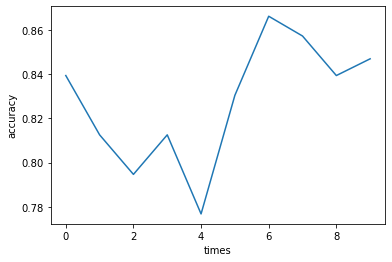

In [48]:
kfold = KFold(n_splits=10, random_state=10)

cvscores2 = []

for train, test in kfold.split(wine_train, wine_class):

    # Fit the model
    history2 = model2.fit(wine_train[train], wine_class[train], epochs=800)
    # evaluate the model
    scores2 = model2.evaluate(wine_train[test], wine_class[test])

    cvscores2.append(scores2[1])

plt.plot(cvscores2)
plt.xlabel('times')
plt.ylabel('accuracy')

## Make a prediction

Now that the model is trained, we can use it to predict the class of the wine in the testing dataset.

In [49]:
pca = PCA(n_components=3)
X_test_pca = pca.fit_transform(StandardScaler().fit_transform(testing_data))

Result_predict2 = model2.predict(X_test_pca)
Result_predict2

array([[8.93175751e-02, 8.36965144e-01, 7.37172589e-02],
       [1.34403468e-03, 7.04062045e-01, 2.94593871e-01],
       [2.22605933e-02, 9.73372757e-01, 4.36658878e-03],
       [1.22207664e-01, 8.43324542e-01, 3.44678387e-02],
       [9.92667019e-01, 7.33196549e-03, 1.04409071e-06],
       [2.80760978e-05, 1.52268428e-02, 9.84745085e-01],
       [8.38915992e-04, 9.98886526e-01, 2.74561113e-04],
       [2.48238016e-02, 9.53180313e-01, 2.19958313e-02],
       [4.13555354e-02, 7.21466959e-01, 2.37177536e-01],
       [7.52130989e-03, 9.75283921e-01, 1.71948727e-02],
       [1.33955628e-02, 4.65740949e-01, 5.20863473e-01],
       [4.39361691e-01, 4.67707604e-01, 9.29306820e-02],
       [5.58123477e-02, 9.27217484e-01, 1.69701297e-02],
       [4.11233377e-05, 4.80662078e-01, 5.19296765e-01],
       [4.52429168e-02, 9.54428434e-01, 3.28711263e-04],
       [2.01730151e-03, 9.97091770e-01, 8.90880183e-04],
       [1.59007125e-03, 9.42981839e-01, 5.54280356e-02],
       [5.95281899e-01, 3.82750

In [50]:
Result_predict2 = model2.predict_classes(X_test_pca)
Result_predict2

array([1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0,

In [52]:
Result_predict2 = pd.DataFrame(Result_predict2)
Result_predict2.to_csv('Task1-Classification-Result.csv',header=False)